In [356]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from datetime import datetime
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import KFold
from mlxtend.regressor import StackingRegressor
import seaborn as sns

In [2]:
train = pd.read_csv('Cristano_Ronaldo_Final_v1/train.csv',index_col=0)

In [3]:
train

,power_of_shot,game_season,is_goal,area_of_shot,shot_basics,combined_shot,distance_of_shot,location,knockout_match,remaining_total,latitude,longitude,shot_id_number
1,1.0,4.0,0.0,2.0,4.0,40.0,35.000000,157.000000,0.0,622.0,45.539131,-122.651648,2.0
2,1.0,4.0,1.0,1.0,4.0,18.0,36.000000,168.600119,0.0,465.0,45.539131,-122.651648,3.0
3,1.0,4.0,0.0,4.0,4.0,23.0,42.000000,222.865430,0.0,412.0,45.539131,-122.651648,4.0
4,2.0,4.0,1.0,0.0,0.0,1.0,20.000000,0.000000,0.0,19.0,45.539131,-122.651648,5.0
5,3.0,13.0,0.0,2.0,4.0,9.0,34.000000,145.416643,0.0,572.0,45.539131,-122.651648,6.0
6,3.0,4.0,1.0,0.0,0.0,34.0,20.000000,0.000000,0.0,532.0,45.539131,-122.651648,7.0
8,3.0,4.0,1.0,2.0,1.0,30.0,32.000000,123.905658,0.0,372.0,45.539131,-122.651648,9.0
9,3.0,4.0,0.0,0.0,1.0,39.0,32.000000,123.905658,0.0,216.0,45.539131,-122.651648,10.0
10,3.0,4.0,0.0,1.0,5.0,54.0,45.000000,255.890602,0.0,116.0,45.539131,-122.651648,11.0
11,1.0,4.0,1.0,4.0,4.0,23.0,37.000000,175.413796,0.0,660.0,42.982923,-71.446094,12.0


In [355]:
corr = train.corr()

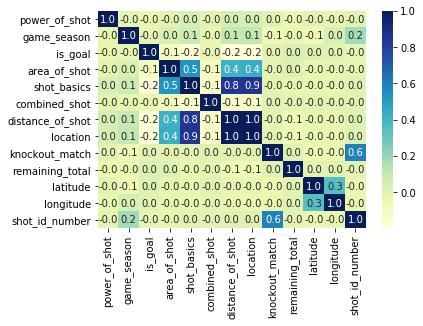

In [357]:
sns.heatmap(corr,annot=True,fmt=".1f",cmap="YlGnBu")

In [4]:
train.columns

Index(['power_of_shot', 'game_season', 'is_goal', 'area_of_shot',
       'shot_basics', 'combined_shot', 'distance_of_shot', 'location',
       'knockout_match', 'remaining_total', 'latitude', 'longitude',
       'shot_id_number'],
      dtype='object')

In [5]:
test = pd.read_csv('Cristano_Ronaldo_Final_v1/test.csv',index_col=0)

In [6]:
test.head()

,power_of_shot,game_season,is_goal,area_of_shot,shot_basics,combined_shot,distance_of_shot,location,knockout_match,remaining_total,latitude,longitude,shot_id_number
0,1.0,4.0,NaN,5.0,4.0,24.0,38.0,181.859836,0.0,627.0,45.539131,-122.651648,1.0
7,3.0,4.0,NaN,0.0,0.0,23.0,22.0,28.017851,0.0,485.0,45.539131,-122.651648,8.0
16,1.0,4.0,NaN,0.0,0.0,34.0,20.0,0.000000,0.0,1.0,42.982923,-71.446094,17.0
19,3.0,13.0,NaN,0.0,4.0,34.0,20.0,0.000000,0.0,646.0,42.982923,-71.446094,20.0
21,3.0,13.0,NaN,4.0,4.0,17.0,38.0,184.621234,0.0,544.0,42.982923,-71.446094,22.0


In [311]:
X = train.drop(['shot_id_number','is_goal'], axis=1)
feature_set = X.columns
X = X.values
y = train['is_goal'].values

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
def acc(pred):
    count=0
    round_pred = np.round(pred)
    for i in range(len(round_pred)):
        if round_pred[i]==y_test[i]:
            count=count+1
            
    return (count/len(round_pred))*100

## 1st attempt

In [60]:
xgb_params = {'eta': 0.02, 'max_depth': 6, 'subsample':0.8, 'colsample_bytree': 0.9,
          'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True}

In [105]:
xg = xgb.XGBRegressor(n_estimators=150)

In [107]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [108]:
pred = xg.predict(X_test)

In [109]:
pred.shape

(8062,)

In [110]:
pred

array([0.57374114, 0.27400023, 0.39175174, ..., 0.39362365, 0.3798799 ,
       0.41415823], dtype=float32)

In [111]:
train_acc = xg.score(X_train,y_train)
print('train accuracy:',train_acc)

test_acc = xg.score(X_test,y_test)
print('test accuracy:',test_acc)

train accuracy: 0.12537844331442327
test accuracy: 0.08206921228027986


In [112]:
round_pred = np.round(pred)

In [113]:
round_pred

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [114]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

In [115]:
count=0
for i in range(len(round_pred)):
    if round_pred[i]==y_test[i]:
        count=count+1

In [116]:
(count/len(round_pred))*100

62.75117836765071

In [117]:
X_pred = test.drop(['shot_id_number','is_goal'], axis=1)
X_pred = X_pred.values
y_pred = test['is_goal'].values

In [118]:
pred = xg.predict(X_pred)

In [119]:
pred

array([0.41885418, 0.45497164, 0.4691785 , ..., 0.6458874 , 0.4079128 ,
       0.4535833 ], dtype=float32)

In [120]:
sub = pd.DataFrame({
    'shot_id_number':test['shot_id_number'],
    'is_goal':pred
})

In [123]:
sub.head()

,shot_id_number,is_goal
0,1.0,0.418854
7,8.0,0.454972
16,17.0,0.469178
19,20.0,0.597009
21,22.0,0.408078


In [122]:
sub.to_csv('submission1.csv',index=False)

## 1.1 attempt

In [159]:
params={
    'max_depth': [4,5,6,7], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.5,0.6,0.7,0.8], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000,2500,5000], #[1000,2000,3000]
    'reg_alpha': [0.03] #[0.01, 0.02, 0.03, 0.04]
}

In [162]:
xg = xgb.XGBRegressor(eval_metric= 'mae')
rs = GridSearchCV(xg,
                  params,
                  cv=5,
                  n_jobs=-1,
                  verbose=2)

In [34]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,n_jobs=-1)

In [35]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1.7817, missing=None, n_estimators=2500, n_jobs=-1,
       nthread=-1, objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [36]:
train_acc = model_xgb.score(X_train,y_train)
print('train accuracy:',train_acc)

test_acc = model_xgb.score(X_test,y_test)
print('test accuracy:',test_acc)

train accuracy: 0.6882076681234717
test accuracy: -0.09351791518439612


In [37]:
pred = model_xgb.predict(X_test)

In [38]:
round_pred = np.round(pred)

In [39]:
count=0
for i in range(len(round_pred)):
    if round_pred[i]==y_test[i]:
        count=count+1

In [40]:
(count/len(round_pred))*100

58.02530389481518

## 2nd attempt

In [129]:
nrounds = 4000

params = {'metric': 'mae', 'learning_rate': 0.02, 'max_depth': 6, 'objective': 'regression',"n_estimators": 1000,
          'feature_fraction': 0.9, 'bagging_fraction': 1, 'lambda_l1': 2, 'lambda_l2': 4, 'num_leaves': 600,
          'min_gain_to_split': .1}

xgb_params = {'eta': 0.02, 'max_depth': 6, 'subsample':0.8, 'colsample_bytree': 0.9,
          'objective': 'reg:linear', 'eval_metric': 'mae', 'silent': True}

sub = test[['shot_id_number']]
sub['is_goal'] = 0
valid = 0
count = 0
kfold = 5

skf = KFold(n_splits=kfold)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    count = count + 1
    print(' lgb kfold: {}  of  {}'.format(count, 5))
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    lgb_model = lgb.train(params, lgb.Dataset(X_train, label=Y_train), nrounds,
                          lgb.Dataset(X_test, label=Y_test), verbose_eval=50, early_stopping_rounds=50)

    sub['is_goal'] += lgb_model.predict(test[feature_set].values,
                                                num_iteration=lgb_model.best_iteration)

    d_train = xgb.DMatrix(X_train, Y_train)
    d_valid = xgb.DMatrix(X_test, Y_test)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    xgb_model = xgb.train(xgb_params, d_train, nrounds, watchlist, early_stopping_rounds=50,
                          maximize=False, verbose_eval=50)

    sub['is_goal'] += xgb_model.predict(xgb.DMatrix(test[feature_set].values),
                                                                   ntree_limit=xgb_model.best_ntree_limit)

    model = CatBoostRegressor(learning_rate=0.02, depth=6, iterations=5000,
                              eval_metric="MAE", verbose=True,bootstrap_type="Bernoulli")c

    fit_model = model.fit(X_train, Y_train, eval_set=(X_test, Y_test), use_best_model=True)

    sub['is_goal'] += fit_model.predict(test[feature_set].values)

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


 lgb kfold: 1  of  5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's l1: 0.466257
[100]	valid_0's l1: 0.455181
[150]	valid_0's l1: 0.449929
[200]	valid_0's l1: 0.447645
[250]	valid_0's l1: 0.446121
[300]	valid_0's l1: 0.444951
[350]	valid_0's l1: 0.444847
Early stopping, best iteration is:
[305]	valid_0's l1: 0.444847
[0]	train-mae:0.499314	valid-mae:0.499448
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 50 rounds.


/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[50]	train-mae:0.467625	valid-mae:0.468179
[100]	train-mae:0.452421	valid-mae:0.455378
[150]	train-mae:0.443479	valid-mae:0.45034
[200]	train-mae:0.436946	valid-mae:0.44763
[250]	train-mae:0.431728	valid-mae:0.446001
[300]	train-mae:0.426837	valid-mae:0.444914
[350]	train-mae:0.422778	valid-mae:0.44429
[400]	train-mae:0.418216	valid-mae:0.443446
[450]	train-mae:0.414159	valid-mae:0.44292
[500]	train-mae:0.41019	valid-mae:0.442224
[550]	train-mae:0.406487	valid-mae:0.44189
[600]	train-mae:0.402855	valid-mae:0.441476
[650]	train-mae:0.399335	valid-mae:0.441114
[700]	train-mae:0.395855	valid-mae:0.440737
[750]	train-mae:0.392439	valid-mae:0.440625
[800]	train-mae:0.388969	valid-mae:0.440198
[850]	train-mae:0.385724	valid-mae:0.439968
[900]	train-mae:0.382515	valid-mae:0.439724
[950]	train-mae:0.379588	valid-mae:0.439422
[1000]	train-mae:0.376373	valid-mae:0.439344
[1050]	train-mae:0.373292	valid-mae:0.439241
[1100]	train-mae:0.370379	valid-mae:0.439188
Stopping. Best iteration:
[1086]	tra

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0:	learn: 0.4443054	test: 0.4524091	best: 0.4524091 (0)	total: 55.9ms	remaining: 4m 39s
1:	learn: 0.4450386	test: 0.4530093	best: 0.4524091 (0)	total: 62.5ms	remaining: 2m 36s
2:	learn: 0.4455746	test: 0.4533537	best: 0.4524091 (0)	total: 69.2ms	remaining: 1m 55s
3:	learn: 0.4461896	test: 0.4539079	best: 0.4524091 (0)	total: 77.6ms	remaining: 1m 36s
4:	learn: 0.4466956	test: 0.4542857	best: 0.4524091 (0)	total: 97ms	remaining: 1m 36s
5:	learn: 0.4472316	test: 0.4546602	best: 0.4524091 (0)	total: 104ms	remaining: 1m 26s
6:	learn: 0.4477952	test: 0.4549688	best: 0.4524091 (0)	total: 111ms	remaining: 1m 19s
7:	learn: 0.4481550	test: 0.4551460	best: 0.4524091 (0)	total: 120ms	remaining: 1m 14s
8:	learn: 0.4486200	test: 0.4554637	best: 0.4524091 (0)	total: 126ms	remaining: 1m 9s
9:	learn: 0.4490249	test: 0.4556944	best: 0.4524091 (0)	total: 133ms	remaining: 1m 6s
10:	learn: 0.4494758	test: 0.4561003	best: 0.4524091 (0)	total: 139ms	remaining: 1m 3s
11:	learn: 0.4498171	test: 0.4562646	best:

106:	learn: 0.4641037	test: 0.4636605	best: 0.4524091 (0)	total: 1.03s	remaining: 47.2s
107:	learn: 0.4641291	test: 0.4636971	best: 0.4524091 (0)	total: 1.05s	remaining: 47.4s
108:	learn: 0.4641478	test: 0.4636796	best: 0.4524091 (0)	total: 1.07s	remaining: 47.9s
109:	learn: 0.4642101	test: 0.4637304	best: 0.4524091 (0)	total: 1.07s	remaining: 47.8s
110:	learn: 0.4642028	test: 0.4636995	best: 0.4524091 (0)	total: 1.08s	remaining: 47.7s
111:	learn: 0.4642101	test: 0.4636951	best: 0.4524091 (0)	total: 1.09s	remaining: 47.8s
112:	learn: 0.4642436	test: 0.4637210	best: 0.4524091 (0)	total: 1.11s	remaining: 48s
113:	learn: 0.4642427	test: 0.4636648	best: 0.4524091 (0)	total: 1.12s	remaining: 48s
114:	learn: 0.4642300	test: 0.4636182	best: 0.4524091 (0)	total: 1.13s	remaining: 48.2s
115:	learn: 0.4642147	test: 0.4635607	best: 0.4524091 (0)	total: 1.14s	remaining: 48.1s
116:	learn: 0.4642493	test: 0.4635960	best: 0.4524091 (0)	total: 1.15s	remaining: 48s
117:	learn: 0.4642181	test: 0.4635007	

213:	learn: 0.4613164	test: 0.4597043	best: 0.4524091 (0)	total: 2.2s	remaining: 49.2s
214:	learn: 0.4612233	test: 0.4595762	best: 0.4524091 (0)	total: 2.21s	remaining: 49.3s
215:	learn: 0.4611962	test: 0.4595742	best: 0.4524091 (0)	total: 2.23s	remaining: 49.5s
216:	learn: 0.4611645	test: 0.4595296	best: 0.4524091 (0)	total: 2.24s	remaining: 49.4s
217:	learn: 0.4611053	test: 0.4594641	best: 0.4524091 (0)	total: 2.25s	remaining: 49.4s
218:	learn: 0.4610573	test: 0.4594118	best: 0.4524091 (0)	total: 2.26s	remaining: 49.4s
219:	learn: 0.4610316	test: 0.4593779	best: 0.4524091 (0)	total: 2.27s	remaining: 49.3s
220:	learn: 0.4609610	test: 0.4592881	best: 0.4524091 (0)	total: 2.28s	remaining: 49.3s
221:	learn: 0.4609317	test: 0.4592477	best: 0.4524091 (0)	total: 2.29s	remaining: 49.2s
222:	learn: 0.4608732	test: 0.4591918	best: 0.4524091 (0)	total: 2.29s	remaining: 49.2s
223:	learn: 0.4608677	test: 0.4591854	best: 0.4524091 (0)	total: 2.3s	remaining: 49.1s
224:	learn: 0.4608155	test: 0.4591

314:	learn: 0.4581011	test: 0.4567781	best: 0.4524091 (0)	total: 3.63s	remaining: 53.9s
315:	learn: 0.4580922	test: 0.4567801	best: 0.4524091 (0)	total: 3.63s	remaining: 53.8s
316:	learn: 0.4580461	test: 0.4567205	best: 0.4524091 (0)	total: 3.64s	remaining: 53.8s
317:	learn: 0.4580292	test: 0.4566995	best: 0.4524091 (0)	total: 3.66s	remaining: 53.9s
318:	learn: 0.4579883	test: 0.4566038	best: 0.4524091 (0)	total: 3.67s	remaining: 53.9s
319:	learn: 0.4579704	test: 0.4565805	best: 0.4524091 (0)	total: 3.68s	remaining: 53.8s
320:	learn: 0.4579494	test: 0.4565699	best: 0.4524091 (0)	total: 3.69s	remaining: 53.7s
321:	learn: 0.4578732	test: 0.4564824	best: 0.4524091 (0)	total: 3.69s	remaining: 53.7s
322:	learn: 0.4578543	test: 0.4564730	best: 0.4524091 (0)	total: 3.7s	remaining: 53.6s
323:	learn: 0.4578298	test: 0.4564463	best: 0.4524091 (0)	total: 3.72s	remaining: 53.6s
324:	learn: 0.4577814	test: 0.4564101	best: 0.4524091 (0)	total: 3.72s	remaining: 53.6s
325:	learn: 0.4577656	test: 0.456

413:	learn: 0.4555994	test: 0.4548212	best: 0.4524091 (0)	total: 6.15s	remaining: 1m 8s
414:	learn: 0.4555826	test: 0.4548241	best: 0.4524091 (0)	total: 6.16s	remaining: 1m 8s
415:	learn: 0.4555773	test: 0.4548228	best: 0.4524091 (0)	total: 6.18s	remaining: 1m 8s
416:	learn: 0.4555469	test: 0.4547960	best: 0.4524091 (0)	total: 6.21s	remaining: 1m 8s
417:	learn: 0.4555247	test: 0.4548115	best: 0.4524091 (0)	total: 6.27s	remaining: 1m 8s
418:	learn: 0.4554841	test: 0.4547742	best: 0.4524091 (0)	total: 6.32s	remaining: 1m 9s
419:	learn: 0.4554719	test: 0.4547722	best: 0.4524091 (0)	total: 6.35s	remaining: 1m 9s
420:	learn: 0.4554159	test: 0.4547061	best: 0.4524091 (0)	total: 6.37s	remaining: 1m 9s
421:	learn: 0.4553750	test: 0.4546525	best: 0.4524091 (0)	total: 6.42s	remaining: 1m 9s
422:	learn: 0.4553510	test: 0.4546391	best: 0.4524091 (0)	total: 6.47s	remaining: 1m 10s
423:	learn: 0.4553389	test: 0.4546323	best: 0.4524091 (0)	total: 6.51s	remaining: 1m 10s
424:	learn: 0.4552811	test: 0.

510:	learn: 0.4531757	test: 0.4528841	best: 0.4524091 (0)	total: 7.7s	remaining: 1m 7s
511:	learn: 0.4531547	test: 0.4528555	best: 0.4524091 (0)	total: 7.72s	remaining: 1m 7s
512:	learn: 0.4531291	test: 0.4528278	best: 0.4524091 (0)	total: 7.73s	remaining: 1m 7s
513:	learn: 0.4530921	test: 0.4527787	best: 0.4524091 (0)	total: 7.75s	remaining: 1m 7s
514:	learn: 0.4530856	test: 0.4527501	best: 0.4524091 (0)	total: 7.76s	remaining: 1m 7s
515:	learn: 0.4530801	test: 0.4527494	best: 0.4524091 (0)	total: 7.77s	remaining: 1m 7s
516:	learn: 0.4530735	test: 0.4527406	best: 0.4524091 (0)	total: 7.78s	remaining: 1m 7s
517:	learn: 0.4530525	test: 0.4527230	best: 0.4524091 (0)	total: 7.79s	remaining: 1m 7s
518:	learn: 0.4530529	test: 0.4527310	best: 0.4524091 (0)	total: 7.79s	remaining: 1m 7s
519:	learn: 0.4530409	test: 0.4527294	best: 0.4524091 (0)	total: 7.8s	remaining: 1m 7s
520:	learn: 0.4530110	test: 0.4527150	best: 0.4524091 (0)	total: 7.81s	remaining: 1m 7s
521:	learn: 0.4529675	test: 0.4526

610:	learn: 0.4507131	test: 0.4512472	best: 0.4512472 (610)	total: 8.88s	remaining: 1m 3s
611:	learn: 0.4506964	test: 0.4512342	best: 0.4512342 (611)	total: 8.89s	remaining: 1m 3s
612:	learn: 0.4506957	test: 0.4512403	best: 0.4512342 (611)	total: 8.92s	remaining: 1m 3s
613:	learn: 0.4506878	test: 0.4512382	best: 0.4512342 (611)	total: 8.92s	remaining: 1m 3s
614:	learn: 0.4506718	test: 0.4512462	best: 0.4512342 (611)	total: 8.93s	remaining: 1m 3s
615:	learn: 0.4506496	test: 0.4512376	best: 0.4512342 (611)	total: 8.94s	remaining: 1m 3s
616:	learn: 0.4506461	test: 0.4512354	best: 0.4512342 (611)	total: 8.95s	remaining: 1m 3s
617:	learn: 0.4506328	test: 0.4512316	best: 0.4512316 (617)	total: 8.96s	remaining: 1m 3s
618:	learn: 0.4505839	test: 0.4511924	best: 0.4511924 (618)	total: 8.96s	remaining: 1m 3s
619:	learn: 0.4505783	test: 0.4511920	best: 0.4511920 (619)	total: 8.97s	remaining: 1m 3s
620:	learn: 0.4505662	test: 0.4511893	best: 0.4511893 (620)	total: 8.98s	remaining: 1m 3s
621:	learn

705:	learn: 0.4487480	test: 0.4501115	best: 0.4501115 (705)	total: 9.83s	remaining: 59.8s
706:	learn: 0.4487286	test: 0.4501006	best: 0.4501006 (706)	total: 9.84s	remaining: 59.7s
707:	learn: 0.4487182	test: 0.4500988	best: 0.4500988 (707)	total: 9.86s	remaining: 59.8s
708:	learn: 0.4487038	test: 0.4500931	best: 0.4500931 (708)	total: 9.87s	remaining: 59.7s
709:	learn: 0.4486869	test: 0.4500972	best: 0.4500931 (708)	total: 9.87s	remaining: 59.7s
710:	learn: 0.4486716	test: 0.4500901	best: 0.4500901 (710)	total: 9.88s	remaining: 59.6s
711:	learn: 0.4486603	test: 0.4500857	best: 0.4500857 (711)	total: 9.89s	remaining: 59.6s
712:	learn: 0.4486321	test: 0.4500770	best: 0.4500770 (712)	total: 9.9s	remaining: 59.5s
713:	learn: 0.4486059	test: 0.4500676	best: 0.4500676 (713)	total: 9.91s	remaining: 59.5s
714:	learn: 0.4485814	test: 0.4500237	best: 0.4500237 (714)	total: 9.92s	remaining: 59.4s
715:	learn: 0.4485319	test: 0.4499600	best: 0.4499600 (715)	total: 9.92s	remaining: 59.4s
716:	learn:

800:	learn: 0.4469601	test: 0.4491558	best: 0.4491558 (800)	total: 12.6s	remaining: 1m 6s
801:	learn: 0.4469527	test: 0.4491512	best: 0.4491512 (801)	total: 12.6s	remaining: 1m 6s
802:	learn: 0.4469273	test: 0.4491169	best: 0.4491169 (802)	total: 12.7s	remaining: 1m 6s
803:	learn: 0.4469006	test: 0.4490916	best: 0.4490916 (803)	total: 12.7s	remaining: 1m 6s
804:	learn: 0.4468696	test: 0.4490554	best: 0.4490554 (804)	total: 12.8s	remaining: 1m 6s
805:	learn: 0.4468574	test: 0.4490455	best: 0.4490455 (805)	total: 12.8s	remaining: 1m 6s
806:	learn: 0.4468425	test: 0.4490275	best: 0.4490275 (806)	total: 12.8s	remaining: 1m 6s
807:	learn: 0.4468281	test: 0.4490188	best: 0.4490188 (807)	total: 12.9s	remaining: 1m 6s
808:	learn: 0.4467934	test: 0.4489879	best: 0.4489879 (808)	total: 12.9s	remaining: 1m 6s
809:	learn: 0.4467778	test: 0.4489774	best: 0.4489774 (809)	total: 12.9s	remaining: 1m 6s
810:	learn: 0.4467698	test: 0.4489721	best: 0.4489721 (810)	total: 12.9s	remaining: 1m 6s
811:	learn

906:	learn: 0.4455089	test: 0.4484401	best: 0.4484401 (906)	total: 14.4s	remaining: 1m 4s
907:	learn: 0.4454910	test: 0.4484453	best: 0.4484401 (906)	total: 14.4s	remaining: 1m 4s
908:	learn: 0.4454770	test: 0.4484426	best: 0.4484401 (906)	total: 14.4s	remaining: 1m 5s
909:	learn: 0.4454680	test: 0.4484377	best: 0.4484377 (909)	total: 14.5s	remaining: 1m 5s
910:	learn: 0.4454535	test: 0.4484420	best: 0.4484377 (909)	total: 14.5s	remaining: 1m 5s
911:	learn: 0.4454357	test: 0.4484365	best: 0.4484365 (911)	total: 14.5s	remaining: 1m 5s
912:	learn: 0.4454308	test: 0.4484347	best: 0.4484347 (912)	total: 14.5s	remaining: 1m 4s
913:	learn: 0.4454175	test: 0.4484384	best: 0.4484347 (912)	total: 14.5s	remaining: 1m 5s
914:	learn: 0.4453832	test: 0.4483967	best: 0.4483967 (914)	total: 14.6s	remaining: 1m 5s
915:	learn: 0.4453680	test: 0.4483876	best: 0.4483876 (915)	total: 14.6s	remaining: 1m 4s
916:	learn: 0.4453398	test: 0.4483752	best: 0.4483752 (916)	total: 14.6s	remaining: 1m 4s
917:	learn

1012:	learn: 0.4441236	test: 0.4478873	best: 0.4478862 (1010)	total: 16s	remaining: 1m 3s
1013:	learn: 0.4441130	test: 0.4478908	best: 0.4478862 (1010)	total: 16s	remaining: 1m 3s
1014:	learn: 0.4441145	test: 0.4479056	best: 0.4478862 (1010)	total: 16s	remaining: 1m 3s
1015:	learn: 0.4441003	test: 0.4478938	best: 0.4478862 (1010)	total: 16.1s	remaining: 1m 2s
1016:	learn: 0.4440939	test: 0.4478907	best: 0.4478862 (1010)	total: 16.1s	remaining: 1m 2s
1017:	learn: 0.4440678	test: 0.4478533	best: 0.4478533 (1017)	total: 16.1s	remaining: 1m 2s
1018:	learn: 0.4440551	test: 0.4478370	best: 0.4478370 (1018)	total: 16.1s	remaining: 1m 2s
1019:	learn: 0.4440378	test: 0.4478221	best: 0.4478221 (1019)	total: 16.1s	remaining: 1m 2s
1020:	learn: 0.4440335	test: 0.4478203	best: 0.4478203 (1020)	total: 16.1s	remaining: 1m 2s
1021:	learn: 0.4440210	test: 0.4478125	best: 0.4478125 (1021)	total: 16.1s	remaining: 1m 2s
1022:	learn: 0.4440107	test: 0.4478110	best: 0.4478110 (1022)	total: 16.1s	remaining: 

1105:	learn: 0.4429257	test: 0.4474567	best: 0.4474567 (1105)	total: 17s	remaining: 59.7s
1106:	learn: 0.4429080	test: 0.4474502	best: 0.4474502 (1106)	total: 17s	remaining: 59.7s
1107:	learn: 0.4428975	test: 0.4474449	best: 0.4474449 (1107)	total: 17s	remaining: 59.7s
1108:	learn: 0.4428658	test: 0.4474175	best: 0.4474175 (1108)	total: 17s	remaining: 59.6s
1109:	learn: 0.4428563	test: 0.4474168	best: 0.4474168 (1109)	total: 17s	remaining: 59.6s
1110:	learn: 0.4428302	test: 0.4474276	best: 0.4474168 (1109)	total: 17s	remaining: 59.5s
1111:	learn: 0.4428164	test: 0.4474272	best: 0.4474168 (1109)	total: 17s	remaining: 59.5s
1112:	learn: 0.4428095	test: 0.4474263	best: 0.4474168 (1109)	total: 17s	remaining: 59.5s
1113:	learn: 0.4428067	test: 0.4474237	best: 0.4474168 (1109)	total: 17s	remaining: 59.4s
1114:	learn: 0.4427850	test: 0.4474188	best: 0.4474168 (1109)	total: 17s	remaining: 59.4s
1115:	learn: 0.4427827	test: 0.4474270	best: 0.4474168 (1109)	total: 17s	remaining: 59.3s
1116:	lear

1206:	learn: 0.4418097	test: 0.4470878	best: 0.4470835 (1203)	total: 18.3s	remaining: 57.6s
1207:	learn: 0.4417997	test: 0.4470898	best: 0.4470835 (1203)	total: 18.3s	remaining: 57.6s
1208:	learn: 0.4417857	test: 0.4471046	best: 0.4470835 (1203)	total: 18.4s	remaining: 57.6s
1209:	learn: 0.4417692	test: 0.4470902	best: 0.4470835 (1203)	total: 18.4s	remaining: 57.6s
1210:	learn: 0.4417612	test: 0.4470868	best: 0.4470835 (1203)	total: 18.4s	remaining: 57.6s
1211:	learn: 0.4417547	test: 0.4470856	best: 0.4470835 (1203)	total: 18.4s	remaining: 57.6s
1212:	learn: 0.4417456	test: 0.4470793	best: 0.4470793 (1212)	total: 18.4s	remaining: 57.5s
1213:	learn: 0.4417440	test: 0.4470811	best: 0.4470793 (1212)	total: 18.4s	remaining: 57.5s
1214:	learn: 0.4417291	test: 0.4470730	best: 0.4470730 (1214)	total: 18.5s	remaining: 57.5s
1215:	learn: 0.4417274	test: 0.4470735	best: 0.4470730 (1214)	total: 18.5s	remaining: 57.5s
1216:	learn: 0.4417130	test: 0.4470693	best: 0.4470693 (1216)	total: 18.5s	remai

1300:	learn: 0.4408247	test: 0.4467702	best: 0.4467702 (1300)	total: 19.9s	remaining: 56.5s
1301:	learn: 0.4408175	test: 0.4467648	best: 0.4467648 (1301)	total: 19.9s	remaining: 56.5s
1302:	learn: 0.4408104	test: 0.4467697	best: 0.4467648 (1301)	total: 19.9s	remaining: 56.5s
1303:	learn: 0.4408038	test: 0.4467743	best: 0.4467648 (1301)	total: 19.9s	remaining: 56.4s
1304:	learn: 0.4407974	test: 0.4467761	best: 0.4467648 (1301)	total: 19.9s	remaining: 56.4s
1305:	learn: 0.4407834	test: 0.4467792	best: 0.4467648 (1301)	total: 19.9s	remaining: 56.4s
1306:	learn: 0.4407688	test: 0.4467630	best: 0.4467630 (1306)	total: 19.9s	remaining: 56.4s
1307:	learn: 0.4407474	test: 0.4467646	best: 0.4467630 (1306)	total: 20s	remaining: 56.3s
1308:	learn: 0.4407346	test: 0.4467579	best: 0.4467579 (1308)	total: 20s	remaining: 56.3s
1309:	learn: 0.4407215	test: 0.4467498	best: 0.4467498 (1309)	total: 20s	remaining: 56.3s
1310:	learn: 0.4407132	test: 0.4467568	best: 0.4467498 (1309)	total: 20s	remaining: 56

1403:	learn: 0.4397805	test: 0.4465161	best: 0.4465161 (1403)	total: 21.2s	remaining: 54.4s
1404:	learn: 0.4397614	test: 0.4464879	best: 0.4464879 (1404)	total: 21.2s	remaining: 54.4s
1405:	learn: 0.4397523	test: 0.4464857	best: 0.4464857 (1405)	total: 21.3s	remaining: 54.4s
1406:	learn: 0.4397328	test: 0.4464837	best: 0.4464837 (1406)	total: 21.3s	remaining: 54.4s
1407:	learn: 0.4397252	test: 0.4464852	best: 0.4464837 (1406)	total: 21.3s	remaining: 54.3s
1408:	learn: 0.4397128	test: 0.4464769	best: 0.4464769 (1408)	total: 21.3s	remaining: 54.3s
1409:	learn: 0.4396905	test: 0.4464748	best: 0.4464748 (1409)	total: 21.3s	remaining: 54.3s
1410:	learn: 0.4396872	test: 0.4464765	best: 0.4464748 (1409)	total: 21.3s	remaining: 54.3s
1411:	learn: 0.4396772	test: 0.4464756	best: 0.4464748 (1409)	total: 21.3s	remaining: 54.2s
1412:	learn: 0.4396632	test: 0.4464721	best: 0.4464721 (1412)	total: 21.4s	remaining: 54.2s
1413:	learn: 0.4396558	test: 0.4464721	best: 0.4464721 (1413)	total: 21.4s	remai

1497:	learn: 0.4387818	test: 0.4462246	best: 0.4462034 (1489)	total: 23.2s	remaining: 54.3s
1498:	learn: 0.4387722	test: 0.4462163	best: 0.4462034 (1489)	total: 23.3s	remaining: 54.4s
1499:	learn: 0.4387737	test: 0.4462175	best: 0.4462034 (1489)	total: 23.3s	remaining: 54.4s
1500:	learn: 0.4387634	test: 0.4462132	best: 0.4462034 (1489)	total: 23.4s	remaining: 54.5s
1501:	learn: 0.4387571	test: 0.4462067	best: 0.4462034 (1489)	total: 23.4s	remaining: 54.5s
1502:	learn: 0.4387356	test: 0.4462080	best: 0.4462034 (1489)	total: 23.4s	remaining: 54.5s
1503:	learn: 0.4387225	test: 0.4461984	best: 0.4461984 (1503)	total: 23.4s	remaining: 54.5s
1504:	learn: 0.4387239	test: 0.4462054	best: 0.4461984 (1503)	total: 23.5s	remaining: 54.5s
1505:	learn: 0.4387225	test: 0.4462047	best: 0.4461984 (1503)	total: 23.5s	remaining: 54.6s
1506:	learn: 0.4387180	test: 0.4462122	best: 0.4461984 (1503)	total: 23.6s	remaining: 54.6s
1507:	learn: 0.4387116	test: 0.4462110	best: 0.4461984 (1503)	total: 23.6s	remai

1597:	learn: 0.4377752	test: 0.4458207	best: 0.4458207 (1597)	total: 27.1s	remaining: 57.6s
1598:	learn: 0.4377692	test: 0.4458227	best: 0.4458207 (1597)	total: 27.1s	remaining: 57.6s
1599:	learn: 0.4377629	test: 0.4458222	best: 0.4458207 (1597)	total: 27.1s	remaining: 57.6s
1600:	learn: 0.4377385	test: 0.4458160	best: 0.4458160 (1600)	total: 27.1s	remaining: 57.6s
1601:	learn: 0.4377296	test: 0.4458107	best: 0.4458107 (1601)	total: 27.1s	remaining: 57.6s
1602:	learn: 0.4377232	test: 0.4458118	best: 0.4458107 (1601)	total: 27.1s	remaining: 57.5s
1603:	learn: 0.4377198	test: 0.4458054	best: 0.4458054 (1603)	total: 27.2s	remaining: 57.5s
1604:	learn: 0.4377149	test: 0.4458029	best: 0.4458029 (1604)	total: 27.2s	remaining: 57.5s
1605:	learn: 0.4377036	test: 0.4458088	best: 0.4458029 (1604)	total: 27.2s	remaining: 57.5s
1606:	learn: 0.4376908	test: 0.4458030	best: 0.4458029 (1604)	total: 27.2s	remaining: 57.5s
1607:	learn: 0.4376831	test: 0.4457972	best: 0.4457972 (1607)	total: 27.2s	remai

1692:	learn: 0.4369255	test: 0.4455720	best: 0.4455720 (1692)	total: 29s	remaining: 56.7s
1693:	learn: 0.4369166	test: 0.4455724	best: 0.4455720 (1692)	total: 29.1s	remaining: 56.7s
1694:	learn: 0.4369101	test: 0.4455735	best: 0.4455720 (1692)	total: 29.1s	remaining: 56.7s
1695:	learn: 0.4369010	test: 0.4455713	best: 0.4455713 (1695)	total: 29.1s	remaining: 56.7s
1696:	learn: 0.4368936	test: 0.4455633	best: 0.4455633 (1696)	total: 29.1s	remaining: 56.7s
1697:	learn: 0.4368908	test: 0.4455591	best: 0.4455591 (1697)	total: 29.1s	remaining: 56.6s
1698:	learn: 0.4368806	test: 0.4455533	best: 0.4455533 (1698)	total: 29.1s	remaining: 56.6s
1699:	learn: 0.4368728	test: 0.4455520	best: 0.4455520 (1699)	total: 29.1s	remaining: 56.6s
1700:	learn: 0.4368644	test: 0.4455476	best: 0.4455476 (1700)	total: 29.2s	remaining: 56.6s
1701:	learn: 0.4368592	test: 0.4455440	best: 0.4455440 (1701)	total: 29.2s	remaining: 56.5s
1702:	learn: 0.4368497	test: 0.4455471	best: 0.4455440 (1701)	total: 29.2s	remaini

1785:	learn: 0.4360727	test: 0.4452178	best: 0.4452172 (1783)	total: 31.3s	remaining: 56.3s
1786:	learn: 0.4360700	test: 0.4452169	best: 0.4452169 (1786)	total: 31.3s	remaining: 56.4s
1787:	learn: 0.4360589	test: 0.4452206	best: 0.4452169 (1786)	total: 31.4s	remaining: 56.4s
1788:	learn: 0.4360487	test: 0.4452204	best: 0.4452169 (1786)	total: 31.4s	remaining: 56.4s
1789:	learn: 0.4360416	test: 0.4452164	best: 0.4452164 (1789)	total: 31.5s	remaining: 56.4s
1790:	learn: 0.4360386	test: 0.4452129	best: 0.4452129 (1790)	total: 31.5s	remaining: 56.5s
1791:	learn: 0.4360454	test: 0.4452241	best: 0.4452129 (1790)	total: 31.6s	remaining: 56.5s
1792:	learn: 0.4360372	test: 0.4452247	best: 0.4452129 (1790)	total: 31.6s	remaining: 56.5s
1793:	learn: 0.4360270	test: 0.4452231	best: 0.4452129 (1790)	total: 31.6s	remaining: 56.5s
1794:	learn: 0.4360170	test: 0.4452126	best: 0.4452126 (1794)	total: 31.7s	remaining: 56.5s
1795:	learn: 0.4360124	test: 0.4452141	best: 0.4452126 (1794)	total: 31.7s	remai

1876:	learn: 0.4352557	test: 0.4450177	best: 0.4450150 (1873)	total: 33.9s	remaining: 56.4s
1877:	learn: 0.4352339	test: 0.4450093	best: 0.4450093 (1877)	total: 33.9s	remaining: 56.4s
1878:	learn: 0.4352290	test: 0.4450112	best: 0.4450093 (1877)	total: 34s	remaining: 56.4s
1879:	learn: 0.4352316	test: 0.4450119	best: 0.4450093 (1877)	total: 34s	remaining: 56.4s
1880:	learn: 0.4352183	test: 0.4450065	best: 0.4450065 (1880)	total: 34s	remaining: 56.4s
1881:	learn: 0.4352123	test: 0.4450041	best: 0.4450041 (1881)	total: 34s	remaining: 56.3s
1882:	learn: 0.4352110	test: 0.4450014	best: 0.4450014 (1882)	total: 34s	remaining: 56.3s
1883:	learn: 0.4352081	test: 0.4450024	best: 0.4450014 (1882)	total: 34s	remaining: 56.3s
1884:	learn: 0.4352052	test: 0.4450003	best: 0.4450003 (1884)	total: 34s	remaining: 56.2s
1885:	learn: 0.4351955	test: 0.4450021	best: 0.4450003 (1884)	total: 34s	remaining: 56.2s
1886:	learn: 0.4351853	test: 0.4450018	best: 0.4450003 (1884)	total: 34s	remaining: 56.2s
1887:	

1980:	learn: 0.4343992	test: 0.4446711	best: 0.4446663 (1974)	total: 35s	remaining: 53.4s
1981:	learn: 0.4343841	test: 0.4446613	best: 0.4446613 (1981)	total: 35s	remaining: 53.4s
1982:	learn: 0.4343683	test: 0.4446550	best: 0.4446550 (1982)	total: 35.1s	remaining: 53.3s
1983:	learn: 0.4343652	test: 0.4446516	best: 0.4446516 (1983)	total: 35.1s	remaining: 53.3s
1984:	learn: 0.4343528	test: 0.4446544	best: 0.4446516 (1983)	total: 35.1s	remaining: 53.3s
1985:	learn: 0.4343381	test: 0.4446489	best: 0.4446489 (1985)	total: 35.1s	remaining: 53.3s
1986:	learn: 0.4343279	test: 0.4446453	best: 0.4446453 (1986)	total: 35.1s	remaining: 53.2s
1987:	learn: 0.4343198	test: 0.4446430	best: 0.4446430 (1987)	total: 35.1s	remaining: 53.2s
1988:	learn: 0.4343010	test: 0.4446258	best: 0.4446258 (1988)	total: 35.2s	remaining: 53.2s
1989:	learn: 0.4342960	test: 0.4446211	best: 0.4446211 (1989)	total: 35.2s	remaining: 53.2s
1990:	learn: 0.4342891	test: 0.4446149	best: 0.4446149 (1990)	total: 35.2s	remaining

2080:	learn: 0.4336506	test: 0.4444137	best: 0.4444137 (2080)	total: 36.1s	remaining: 50.7s
2081:	learn: 0.4336456	test: 0.4444164	best: 0.4444137 (2080)	total: 36.1s	remaining: 50.6s
2082:	learn: 0.4336276	test: 0.4443957	best: 0.4443957 (2082)	total: 36.2s	remaining: 50.6s
2083:	learn: 0.4336262	test: 0.4443956	best: 0.4443956 (2083)	total: 36.2s	remaining: 50.6s
2084:	learn: 0.4336155	test: 0.4443919	best: 0.4443919 (2084)	total: 36.2s	remaining: 50.6s
2085:	learn: 0.4336080	test: 0.4443929	best: 0.4443919 (2084)	total: 36.2s	remaining: 50.6s
2086:	learn: 0.4336014	test: 0.4443917	best: 0.4443917 (2086)	total: 36.2s	remaining: 50.5s
2087:	learn: 0.4335976	test: 0.4443869	best: 0.4443869 (2087)	total: 36.2s	remaining: 50.5s
2088:	learn: 0.4335963	test: 0.4443901	best: 0.4443869 (2087)	total: 36.2s	remaining: 50.5s
2089:	learn: 0.4335888	test: 0.4443841	best: 0.4443841 (2089)	total: 36.2s	remaining: 50.4s
2090:	learn: 0.4335724	test: 0.4443866	best: 0.4443841 (2089)	total: 36.2s	remai

2183:	learn: 0.4327757	test: 0.4441438	best: 0.4441436 (2182)	total: 37.2s	remaining: 48s
2184:	learn: 0.4327702	test: 0.4441409	best: 0.4441409 (2184)	total: 37.2s	remaining: 48s
2185:	learn: 0.4327600	test: 0.4441387	best: 0.4441387 (2185)	total: 37.2s	remaining: 47.9s
2186:	learn: 0.4327455	test: 0.4441398	best: 0.4441387 (2185)	total: 37.3s	remaining: 47.9s
2187:	learn: 0.4327333	test: 0.4441434	best: 0.4441387 (2185)	total: 37.3s	remaining: 47.9s
2188:	learn: 0.4327237	test: 0.4441390	best: 0.4441387 (2185)	total: 37.3s	remaining: 47.9s
2189:	learn: 0.4327219	test: 0.4441377	best: 0.4441377 (2189)	total: 37.3s	remaining: 47.8s
2190:	learn: 0.4327130	test: 0.4441429	best: 0.4441377 (2189)	total: 37.3s	remaining: 47.8s
2191:	learn: 0.4326981	test: 0.4441325	best: 0.4441325 (2191)	total: 37.3s	remaining: 47.8s
2192:	learn: 0.4326879	test: 0.4441363	best: 0.4441325 (2191)	total: 37.3s	remaining: 47.8s
2193:	learn: 0.4326791	test: 0.4441288	best: 0.4441288 (2193)	total: 37.3s	remaining

2288:	learn: 0.4320345	test: 0.4440007	best: 0.4439946 (2285)	total: 38.3s	remaining: 45.4s
2289:	learn: 0.4320313	test: 0.4439988	best: 0.4439946 (2285)	total: 38.3s	remaining: 45.4s
2290:	learn: 0.4320278	test: 0.4439974	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.4s
2291:	learn: 0.4320238	test: 0.4439993	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.3s
2292:	learn: 0.4320186	test: 0.4440019	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.3s
2293:	learn: 0.4319978	test: 0.4440007	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.3s
2294:	learn: 0.4319896	test: 0.4439956	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.3s
2295:	learn: 0.4319834	test: 0.4439991	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.2s
2296:	learn: 0.4319759	test: 0.4439955	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.2s
2297:	learn: 0.4319781	test: 0.4439992	best: 0.4439946 (2285)	total: 38.4s	remaining: 45.2s
2298:	learn: 0.4319704	test: 0.4439925	best: 0.4439925 (2298)	total: 38.4s	remai

2389:	learn: 0.4313304	test: 0.4438105	best: 0.4438049 (2388)	total: 39.4s	remaining: 43.1s
2390:	learn: 0.4313272	test: 0.4438062	best: 0.4438049 (2388)	total: 39.4s	remaining: 43s
2391:	learn: 0.4313214	test: 0.4438041	best: 0.4438041 (2391)	total: 39.5s	remaining: 43s
2392:	learn: 0.4313166	test: 0.4438008	best: 0.4438008 (2392)	total: 39.5s	remaining: 43s
2393:	learn: 0.4313087	test: 0.4438044	best: 0.4438008 (2392)	total: 39.5s	remaining: 43s
2394:	learn: 0.4313080	test: 0.4438074	best: 0.4438008 (2392)	total: 39.5s	remaining: 43s
2395:	learn: 0.4313050	test: 0.4438068	best: 0.4438008 (2392)	total: 39.5s	remaining: 42.9s
2396:	learn: 0.4312980	test: 0.4438109	best: 0.4438008 (2392)	total: 39.5s	remaining: 42.9s
2397:	learn: 0.4312910	test: 0.4438106	best: 0.4438008 (2392)	total: 39.5s	remaining: 42.9s
2398:	learn: 0.4312853	test: 0.4438096	best: 0.4438008 (2392)	total: 39.5s	remaining: 42.9s
2399:	learn: 0.4312792	test: 0.4438099	best: 0.4438008 (2392)	total: 39.5s	remaining: 42.8

2483:	learn: 0.4306793	test: 0.4437132	best: 0.4437068 (2481)	total: 40.5s	remaining: 41s
2484:	learn: 0.4306735	test: 0.4437159	best: 0.4437068 (2481)	total: 40.6s	remaining: 41.1s
2485:	learn: 0.4306617	test: 0.4437135	best: 0.4437068 (2481)	total: 40.6s	remaining: 41.1s
2486:	learn: 0.4306490	test: 0.4437213	best: 0.4437068 (2481)	total: 40.6s	remaining: 41s
2487:	learn: 0.4306444	test: 0.4437210	best: 0.4437068 (2481)	total: 40.6s	remaining: 41s
2488:	learn: 0.4306286	test: 0.4437087	best: 0.4437068 (2481)	total: 40.6s	remaining: 41s
2489:	learn: 0.4306275	test: 0.4437080	best: 0.4437068 (2481)	total: 40.6s	remaining: 41s
2490:	learn: 0.4306246	test: 0.4437055	best: 0.4437055 (2490)	total: 40.7s	remaining: 40.9s
2491:	learn: 0.4306159	test: 0.4437067	best: 0.4437055 (2490)	total: 40.7s	remaining: 40.9s
2492:	learn: 0.4306144	test: 0.4437058	best: 0.4437055 (2490)	total: 40.7s	remaining: 40.9s
2493:	learn: 0.4306054	test: 0.4436953	best: 0.4436953 (2493)	total: 40.7s	remaining: 40.9

2575:	learn: 0.4299914	test: 0.4435758	best: 0.4435758 (2575)	total: 41.8s	remaining: 39.3s
2576:	learn: 0.4299731	test: 0.4435699	best: 0.4435699 (2576)	total: 41.8s	remaining: 39.3s
2577:	learn: 0.4299653	test: 0.4435644	best: 0.4435644 (2577)	total: 41.8s	remaining: 39.3s
2578:	learn: 0.4299575	test: 0.4435616	best: 0.4435616 (2578)	total: 41.8s	remaining: 39.3s
2579:	learn: 0.4299532	test: 0.4435638	best: 0.4435616 (2578)	total: 41.8s	remaining: 39.2s
2580:	learn: 0.4299408	test: 0.4435612	best: 0.4435612 (2580)	total: 41.8s	remaining: 39.2s
2581:	learn: 0.4299278	test: 0.4435592	best: 0.4435592 (2581)	total: 41.8s	remaining: 39.2s
2582:	learn: 0.4299266	test: 0.4435593	best: 0.4435592 (2581)	total: 41.9s	remaining: 39.2s
2583:	learn: 0.4299199	test: 0.4435609	best: 0.4435592 (2581)	total: 41.9s	remaining: 39.2s
2584:	learn: 0.4299158	test: 0.4435621	best: 0.4435592 (2581)	total: 41.9s	remaining: 39.1s
2585:	learn: 0.4299018	test: 0.4435663	best: 0.4435592 (2581)	total: 41.9s	remai

2680:	learn: 0.4292660	test: 0.4434815	best: 0.4434815 (2680)	total: 42.8s	remaining: 37.1s
2681:	learn: 0.4292568	test: 0.4434821	best: 0.4434815 (2680)	total: 42.9s	remaining: 37s
2682:	learn: 0.4292429	test: 0.4434785	best: 0.4434785 (2682)	total: 42.9s	remaining: 37s
2683:	learn: 0.4292349	test: 0.4434824	best: 0.4434785 (2682)	total: 42.9s	remaining: 37s
2684:	learn: 0.4292289	test: 0.4434832	best: 0.4434785 (2682)	total: 42.9s	remaining: 37s
2685:	learn: 0.4292253	test: 0.4434855	best: 0.4434785 (2682)	total: 42.9s	remaining: 37s
2686:	learn: 0.4292235	test: 0.4434839	best: 0.4434785 (2682)	total: 42.9s	remaining: 37s
2687:	learn: 0.4292095	test: 0.4434754	best: 0.4434754 (2687)	total: 43s	remaining: 36.9s
2688:	learn: 0.4292031	test: 0.4434750	best: 0.4434750 (2688)	total: 43s	remaining: 36.9s
2689:	learn: 0.4291953	test: 0.4434721	best: 0.4434721 (2689)	total: 43s	remaining: 36.9s
2690:	learn: 0.4291929	test: 0.4434740	best: 0.4434721 (2689)	total: 43s	remaining: 36.9s
2691:	le

2780:	learn: 0.4286395	test: 0.4433947	best: 0.4433947 (2780)	total: 43.9s	remaining: 35s
2781:	learn: 0.4286342	test: 0.4433948	best: 0.4433947 (2780)	total: 43.9s	remaining: 35s
2782:	learn: 0.4286330	test: 0.4433945	best: 0.4433945 (2782)	total: 43.9s	remaining: 35s
2783:	learn: 0.4286250	test: 0.4433978	best: 0.4433945 (2782)	total: 43.9s	remaining: 35s
2784:	learn: 0.4286124	test: 0.4433988	best: 0.4433945 (2782)	total: 44s	remaining: 35s
2785:	learn: 0.4286102	test: 0.4433963	best: 0.4433945 (2782)	total: 44s	remaining: 34.9s
2786:	learn: 0.4286099	test: 0.4433971	best: 0.4433945 (2782)	total: 44s	remaining: 34.9s
2787:	learn: 0.4286099	test: 0.4433972	best: 0.4433945 (2782)	total: 44s	remaining: 34.9s
2788:	learn: 0.4286096	test: 0.4434007	best: 0.4433945 (2782)	total: 44s	remaining: 34.9s
2789:	learn: 0.4286011	test: 0.4434015	best: 0.4433945 (2782)	total: 44s	remaining: 34.9s
2790:	learn: 0.4285915	test: 0.4433934	best: 0.4433934 (2790)	total: 44s	remaining: 34.8s
2791:	learn:

2882:	learn: 0.4280487	test: 0.4432878	best: 0.4432643 (2844)	total: 45s	remaining: 33s
2883:	learn: 0.4280428	test: 0.4432838	best: 0.4432643 (2844)	total: 45s	remaining: 33s
2884:	learn: 0.4280344	test: 0.4432804	best: 0.4432643 (2844)	total: 45s	remaining: 33s
2885:	learn: 0.4280305	test: 0.4432838	best: 0.4432643 (2844)	total: 45s	remaining: 33s
2886:	learn: 0.4280263	test: 0.4432821	best: 0.4432643 (2844)	total: 45s	remaining: 33s
2887:	learn: 0.4280219	test: 0.4432838	best: 0.4432643 (2844)	total: 45.1s	remaining: 32.9s
2888:	learn: 0.4280163	test: 0.4432856	best: 0.4432643 (2844)	total: 45.1s	remaining: 32.9s
2889:	learn: 0.4280143	test: 0.4432839	best: 0.4432643 (2844)	total: 45.1s	remaining: 32.9s
2890:	learn: 0.4280136	test: 0.4432838	best: 0.4432643 (2844)	total: 45.1s	remaining: 32.9s
2891:	learn: 0.4280129	test: 0.4432844	best: 0.4432643 (2844)	total: 45.1s	remaining: 32.9s
2892:	learn: 0.4280081	test: 0.4432795	best: 0.4432643 (2844)	total: 45.1s	remaining: 32.8s
2893:	le

2988:	learn: 0.4274192	test: 0.4431600	best: 0.4431499 (2977)	total: 46.1s	remaining: 31s
2989:	learn: 0.4274105	test: 0.4431611	best: 0.4431499 (2977)	total: 46.1s	remaining: 31s
2990:	learn: 0.4274034	test: 0.4431581	best: 0.4431499 (2977)	total: 46.1s	remaining: 31s
2991:	learn: 0.4273929	test: 0.4431470	best: 0.4431470 (2991)	total: 46.1s	remaining: 30.9s
2992:	learn: 0.4273898	test: 0.4431507	best: 0.4431470 (2991)	total: 46.1s	remaining: 30.9s
2993:	learn: 0.4273775	test: 0.4431451	best: 0.4431451 (2993)	total: 46.1s	remaining: 30.9s
2994:	learn: 0.4273724	test: 0.4431401	best: 0.4431401 (2994)	total: 46.1s	remaining: 30.9s
2995:	learn: 0.4273690	test: 0.4431473	best: 0.4431401 (2994)	total: 46.1s	remaining: 30.9s
2996:	learn: 0.4273571	test: 0.4431412	best: 0.4431401 (2994)	total: 46.1s	remaining: 30.8s
2997:	learn: 0.4273483	test: 0.4431397	best: 0.4431397 (2997)	total: 46.2s	remaining: 30.8s
2998:	learn: 0.4273438	test: 0.4431392	best: 0.4431392 (2998)	total: 46.2s	remaining: 

3078:	learn: 0.4268834	test: 0.4431116	best: 0.4431090 (3069)	total: 47.2s	remaining: 29.4s
3079:	learn: 0.4268815	test: 0.4431118	best: 0.4431090 (3069)	total: 47.2s	remaining: 29.4s
3080:	learn: 0.4268715	test: 0.4431037	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.4s
3081:	learn: 0.4268726	test: 0.4431136	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.4s
3082:	learn: 0.4268658	test: 0.4431122	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.4s
3083:	learn: 0.4268586	test: 0.4431362	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.3s
3084:	learn: 0.4268463	test: 0.4431357	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.3s
3085:	learn: 0.4268434	test: 0.4431357	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.3s
3086:	learn: 0.4268350	test: 0.4431357	best: 0.4431037 (3080)	total: 47.2s	remaining: 29.3s
3087:	learn: 0.4268307	test: 0.4431326	best: 0.4431037 (3080)	total: 47.3s	remaining: 29.3s
3088:	learn: 0.4268296	test: 0.4431320	best: 0.4431037 (3080)	total: 47.3s	remai

3176:	learn: 0.4262616	test: 0.4430611	best: 0.4430529 (3165)	total: 48.2s	remaining: 27.7s
3177:	learn: 0.4262487	test: 0.4430591	best: 0.4430529 (3165)	total: 48.3s	remaining: 27.7s
3178:	learn: 0.4262453	test: 0.4430611	best: 0.4430529 (3165)	total: 48.3s	remaining: 27.7s
3179:	learn: 0.4262299	test: 0.4430622	best: 0.4430529 (3165)	total: 48.3s	remaining: 27.6s
3180:	learn: 0.4262178	test: 0.4430639	best: 0.4430529 (3165)	total: 48.3s	remaining: 27.6s
3181:	learn: 0.4262038	test: 0.4430499	best: 0.4430499 (3181)	total: 48.3s	remaining: 27.6s
3182:	learn: 0.4261966	test: 0.4430442	best: 0.4430442 (3182)	total: 48.3s	remaining: 27.6s
3183:	learn: 0.4261973	test: 0.4430479	best: 0.4430442 (3182)	total: 48.4s	remaining: 27.6s
3184:	learn: 0.4261936	test: 0.4430443	best: 0.4430442 (3182)	total: 48.4s	remaining: 27.6s
3185:	learn: 0.4261840	test: 0.4430430	best: 0.4430430 (3185)	total: 48.4s	remaining: 27.6s
3186:	learn: 0.4261831	test: 0.4430417	best: 0.4430417 (3186)	total: 48.4s	remai

3268:	learn: 0.4256838	test: 0.4429587	best: 0.4429587 (3268)	total: 49.3s	remaining: 26.1s
3269:	learn: 0.4256743	test: 0.4429540	best: 0.4429540 (3269)	total: 49.3s	remaining: 26.1s
3270:	learn: 0.4256686	test: 0.4429524	best: 0.4429524 (3270)	total: 49.3s	remaining: 26.1s
3271:	learn: 0.4256584	test: 0.4429451	best: 0.4429451 (3271)	total: 49.3s	remaining: 26.1s
3272:	learn: 0.4256533	test: 0.4429492	best: 0.4429451 (3271)	total: 49.4s	remaining: 26s
3273:	learn: 0.4256526	test: 0.4429490	best: 0.4429451 (3271)	total: 49.4s	remaining: 26s
3274:	learn: 0.4256441	test: 0.4429489	best: 0.4429451 (3271)	total: 49.4s	remaining: 26s
3275:	learn: 0.4256409	test: 0.4429475	best: 0.4429451 (3271)	total: 49.4s	remaining: 26s
3276:	learn: 0.4256387	test: 0.4429520	best: 0.4429451 (3271)	total: 49.4s	remaining: 26s
3277:	learn: 0.4256339	test: 0.4429518	best: 0.4429451 (3271)	total: 49.4s	remaining: 26s
3278:	learn: 0.4256234	test: 0.4429508	best: 0.4429451 (3271)	total: 49.4s	remaining: 25.9s


3362:	learn: 0.4250697	test: 0.4428343	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.5s
3363:	learn: 0.4250628	test: 0.4428362	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.5s
3364:	learn: 0.4250559	test: 0.4428335	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.5s
3365:	learn: 0.4250521	test: 0.4428380	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.5s
3366:	learn: 0.4250372	test: 0.4428383	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.5s
3367:	learn: 0.4250371	test: 0.4428397	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.4s
3368:	learn: 0.4250359	test: 0.4428384	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.4s
3369:	learn: 0.4250311	test: 0.4428412	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.4s
3370:	learn: 0.4250290	test: 0.4428416	best: 0.4428191 (3355)	total: 50.4s	remaining: 24.4s
3371:	learn: 0.4250242	test: 0.4428419	best: 0.4428191 (3355)	total: 50.5s	remaining: 24.4s
3372:	learn: 0.4250173	test: 0.4428380	best: 0.4428191 (3355)	total: 50.5s	remai

3464:	learn: 0.4244550	test: 0.4427690	best: 0.4427538 (3454)	total: 51.4s	remaining: 22.8s
3465:	learn: 0.4244520	test: 0.4427680	best: 0.4427538 (3454)	total: 51.4s	remaining: 22.8s
3466:	learn: 0.4244482	test: 0.4427640	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.8s
3467:	learn: 0.4244344	test: 0.4427687	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.7s
3468:	learn: 0.4244343	test: 0.4427697	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.7s
3469:	learn: 0.4244330	test: 0.4427678	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.7s
3470:	learn: 0.4244251	test: 0.4427666	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.7s
3471:	learn: 0.4244211	test: 0.4427617	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.7s
3472:	learn: 0.4244229	test: 0.4427636	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.7s
3473:	learn: 0.4244178	test: 0.4427559	best: 0.4427538 (3454)	total: 51.5s	remaining: 22.6s
3474:	learn: 0.4244059	test: 0.4427468	best: 0.4427468 (3474)	total: 51.5s	remai

3568:	learn: 0.4239331	test: 0.4426113	best: 0.4425995 (3563)	total: 52.5s	remaining: 21s
3569:	learn: 0.4239297	test: 0.4426126	best: 0.4425995 (3563)	total: 52.5s	remaining: 21s
3570:	learn: 0.4239266	test: 0.4426117	best: 0.4425995 (3563)	total: 52.5s	remaining: 21s
3571:	learn: 0.4239260	test: 0.4426116	best: 0.4425995 (3563)	total: 52.5s	remaining: 21s
3572:	learn: 0.4239238	test: 0.4426106	best: 0.4425995 (3563)	total: 52.5s	remaining: 21s
3573:	learn: 0.4239155	test: 0.4426097	best: 0.4425995 (3563)	total: 52.6s	remaining: 21s
3574:	learn: 0.4239135	test: 0.4426098	best: 0.4425995 (3563)	total: 52.6s	remaining: 21s
3575:	learn: 0.4239052	test: 0.4426113	best: 0.4425995 (3563)	total: 52.6s	remaining: 20.9s
3576:	learn: 0.4239026	test: 0.4426091	best: 0.4425995 (3563)	total: 52.6s	remaining: 20.9s
3577:	learn: 0.4238999	test: 0.4426107	best: 0.4425995 (3563)	total: 52.6s	remaining: 20.9s
3578:	learn: 0.4238901	test: 0.4426129	best: 0.4425995 (3563)	total: 52.6s	remaining: 20.9s
35

3673:	learn: 0.4233110	test: 0.4424693	best: 0.4424635 (3665)	total: 53.7s	remaining: 19.4s
3674:	learn: 0.4233097	test: 0.4424686	best: 0.4424635 (3665)	total: 53.7s	remaining: 19.4s
3675:	learn: 0.4232981	test: 0.4424659	best: 0.4424635 (3665)	total: 53.7s	remaining: 19.4s
3676:	learn: 0.4232932	test: 0.4424635	best: 0.4424635 (3665)	total: 53.7s	remaining: 19.3s
3677:	learn: 0.4232837	test: 0.4424579	best: 0.4424579 (3677)	total: 53.7s	remaining: 19.3s
3678:	learn: 0.4232810	test: 0.4424578	best: 0.4424578 (3678)	total: 53.8s	remaining: 19.3s
3679:	learn: 0.4232766	test: 0.4424539	best: 0.4424539 (3679)	total: 53.8s	remaining: 19.3s
3680:	learn: 0.4232619	test: 0.4424555	best: 0.4424539 (3679)	total: 53.8s	remaining: 19.3s
3681:	learn: 0.4232535	test: 0.4424537	best: 0.4424537 (3681)	total: 53.8s	remaining: 19.3s
3682:	learn: 0.4232473	test: 0.4424522	best: 0.4424522 (3682)	total: 53.8s	remaining: 19.2s
3683:	learn: 0.4232373	test: 0.4424509	best: 0.4424509 (3683)	total: 53.8s	remai

3769:	learn: 0.4227799	test: 0.4424588	best: 0.4424412 (3688)	total: 54.7s	remaining: 17.9s
3770:	learn: 0.4227701	test: 0.4424486	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3771:	learn: 0.4227665	test: 0.4424476	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3772:	learn: 0.4227658	test: 0.4424548	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3773:	learn: 0.4227599	test: 0.4424543	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3774:	learn: 0.4227589	test: 0.4424550	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3775:	learn: 0.4227532	test: 0.4424551	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3776:	learn: 0.4227525	test: 0.4424547	best: 0.4424412 (3688)	total: 54.8s	remaining: 17.8s
3777:	learn: 0.4227499	test: 0.4424539	best: 0.4424412 (3688)	total: 54.9s	remaining: 17.7s
3778:	learn: 0.4227358	test: 0.4424462	best: 0.4424412 (3688)	total: 54.9s	remaining: 17.7s
3779:	learn: 0.4227324	test: 0.4424428	best: 0.4424412 (3688)	total: 54.9s	remai

3859:	learn: 0.4223167	test: 0.4424419	best: 0.4424225 (3790)	total: 57s	remaining: 16.8s
3860:	learn: 0.4223088	test: 0.4424453	best: 0.4424225 (3790)	total: 57.1s	remaining: 16.8s
3861:	learn: 0.4223072	test: 0.4424463	best: 0.4424225 (3790)	total: 57.1s	remaining: 16.8s
3862:	learn: 0.4222994	test: 0.4424534	best: 0.4424225 (3790)	total: 57.1s	remaining: 16.8s
3863:	learn: 0.4222989	test: 0.4424554	best: 0.4424225 (3790)	total: 57.2s	remaining: 16.8s
3864:	learn: 0.4222997	test: 0.4424577	best: 0.4424225 (3790)	total: 57.2s	remaining: 16.8s
3865:	learn: 0.4222953	test: 0.4424637	best: 0.4424225 (3790)	total: 57.2s	remaining: 16.8s
3866:	learn: 0.4222907	test: 0.4424652	best: 0.4424225 (3790)	total: 57.3s	remaining: 16.8s
3867:	learn: 0.4222879	test: 0.4424646	best: 0.4424225 (3790)	total: 57.3s	remaining: 16.8s
3868:	learn: 0.4222838	test: 0.4424614	best: 0.4424225 (3790)	total: 57.3s	remaining: 16.8s
3869:	learn: 0.4222815	test: 0.4424633	best: 0.4424225 (3790)	total: 57.4s	remaini

3961:	learn: 0.4217697	test: 0.4424121	best: 0.4424047 (3914)	total: 58.6s	remaining: 15.4s
3962:	learn: 0.4217678	test: 0.4424097	best: 0.4424047 (3914)	total: 58.6s	remaining: 15.3s
3963:	learn: 0.4217624	test: 0.4424033	best: 0.4424033 (3963)	total: 58.7s	remaining: 15.3s
3964:	learn: 0.4217582	test: 0.4424062	best: 0.4424033 (3963)	total: 58.7s	remaining: 15.3s
3965:	learn: 0.4217501	test: 0.4424057	best: 0.4424033 (3963)	total: 58.7s	remaining: 15.3s
3966:	learn: 0.4217441	test: 0.4424077	best: 0.4424033 (3963)	total: 58.7s	remaining: 15.3s
3967:	learn: 0.4217384	test: 0.4424059	best: 0.4424033 (3963)	total: 58.7s	remaining: 15.3s
3968:	learn: 0.4217338	test: 0.4424033	best: 0.4424033 (3963)	total: 58.7s	remaining: 15.3s
3969:	learn: 0.4217313	test: 0.4424006	best: 0.4424006 (3969)	total: 58.7s	remaining: 15.2s
3970:	learn: 0.4217217	test: 0.4424004	best: 0.4424004 (3970)	total: 58.7s	remaining: 15.2s
3971:	learn: 0.4217202	test: 0.4424006	best: 0.4424004 (3970)	total: 58.7s	remai

4060:	learn: 0.4212282	test: 0.4423277	best: 0.4423277 (4060)	total: 59.7s	remaining: 13.8s
4061:	learn: 0.4212274	test: 0.4423296	best: 0.4423277 (4060)	total: 59.7s	remaining: 13.8s
4062:	learn: 0.4212247	test: 0.4423300	best: 0.4423277 (4060)	total: 59.7s	remaining: 13.8s
4063:	learn: 0.4212221	test: 0.4423273	best: 0.4423273 (4063)	total: 59.7s	remaining: 13.8s
4064:	learn: 0.4212169	test: 0.4423312	best: 0.4423273 (4063)	total: 59.7s	remaining: 13.7s
4065:	learn: 0.4212128	test: 0.4423281	best: 0.4423273 (4063)	total: 59.7s	remaining: 13.7s
4066:	learn: 0.4212085	test: 0.4423277	best: 0.4423273 (4063)	total: 59.7s	remaining: 13.7s
4067:	learn: 0.4211925	test: 0.4423154	best: 0.4423154 (4067)	total: 59.7s	remaining: 13.7s
4068:	learn: 0.4211855	test: 0.4423101	best: 0.4423101 (4068)	total: 59.8s	remaining: 13.7s
4069:	learn: 0.4211708	test: 0.4423040	best: 0.4423040 (4069)	total: 59.8s	remaining: 13.7s
4070:	learn: 0.4211680	test: 0.4423018	best: 0.4423018 (4070)	total: 59.8s	remai

4158:	learn: 0.4206611	test: 0.4422992	best: 0.4422857 (4137)	total: 1m	remaining: 12.3s
4159:	learn: 0.4206588	test: 0.4423004	best: 0.4422857 (4137)	total: 1m	remaining: 12.3s
4160:	learn: 0.4206564	test: 0.4423020	best: 0.4422857 (4137)	total: 1m	remaining: 12.2s
4161:	learn: 0.4206517	test: 0.4422978	best: 0.4422857 (4137)	total: 1m	remaining: 12.2s
4162:	learn: 0.4206510	test: 0.4422978	best: 0.4422857 (4137)	total: 1m	remaining: 12.2s
4163:	learn: 0.4206496	test: 0.4422981	best: 0.4422857 (4137)	total: 1m	remaining: 12.2s
4164:	learn: 0.4206454	test: 0.4422984	best: 0.4422857 (4137)	total: 1m	remaining: 12.2s
4165:	learn: 0.4206439	test: 0.4423003	best: 0.4422857 (4137)	total: 1m	remaining: 12.2s
4166:	learn: 0.4206421	test: 0.4423000	best: 0.4422857 (4137)	total: 1m	remaining: 12.1s
4167:	learn: 0.4206271	test: 0.4422967	best: 0.4422857 (4137)	total: 1m	remaining: 12.1s
4168:	learn: 0.4206255	test: 0.4422971	best: 0.4422857 (4137)	total: 1m	remaining: 12.1s
4169:	learn: 0.420622

4249:	learn: 0.4202020	test: 0.4422798	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.9s
4250:	learn: 0.4202007	test: 0.4422819	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.9s
4251:	learn: 0.4201853	test: 0.4422876	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.9s
4252:	learn: 0.4201848	test: 0.4422876	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.9s
4253:	learn: 0.4201819	test: 0.4422880	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.8s
4254:	learn: 0.4201847	test: 0.4422899	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.8s
4255:	learn: 0.4201711	test: 0.4422870	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.8s
4256:	learn: 0.4201690	test: 0.4422856	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.8s
4257:	learn: 0.4201684	test: 0.4422934	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.8s
4258:	learn: 0.4201612	test: 0.4422880	best: 0.4422717 (4201)	total: 1m 1s	remaining: 10.8s
4259:	learn: 0.4201553	test: 0.4422788	best: 0.4422717 (4201)	total: 1m 1s	remai

4346:	learn: 0.4197349	test: 0.4422276	best: 0.4422222 (4342)	total: 1m 4s	remaining: 9.71s
4347:	learn: 0.4197252	test: 0.4422028	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.7s
4348:	learn: 0.4197261	test: 0.4422047	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.68s
4349:	learn: 0.4197194	test: 0.4422105	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.67s
4350:	learn: 0.4197146	test: 0.4422082	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.65s
4351:	learn: 0.4197112	test: 0.4422058	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.64s
4352:	learn: 0.4197097	test: 0.4422054	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.62s
4353:	learn: 0.4197028	test: 0.4422080	best: 0.4422028 (4347)	total: 1m 4s	remaining: 9.61s
4354:	learn: 0.4196962	test: 0.4421976	best: 0.4421976 (4354)	total: 1m 4s	remaining: 9.59s
4355:	learn: 0.4196967	test: 0.4422000	best: 0.4421976 (4354)	total: 1m 4s	remaining: 9.57s
4356:	learn: 0.4196942	test: 0.4421989	best: 0.4421976 (4354)	total: 1m 4s	remain

4436:	learn: 0.4192817	test: 0.4421630	best: 0.4421605 (4433)	total: 1m 5s	remaining: 8.36s
4437:	learn: 0.4192804	test: 0.4421608	best: 0.4421605 (4433)	total: 1m 5s	remaining: 8.35s
4438:	learn: 0.4192781	test: 0.4421615	best: 0.4421605 (4433)	total: 1m 5s	remaining: 8.33s
4439:	learn: 0.4192727	test: 0.4421604	best: 0.4421604 (4439)	total: 1m 5s	remaining: 8.32s
4440:	learn: 0.4192699	test: 0.4421580	best: 0.4421580 (4440)	total: 1m 6s	remaining: 8.31s
4441:	learn: 0.4192578	test: 0.4421537	best: 0.4421537 (4441)	total: 1m 6s	remaining: 8.3s
4442:	learn: 0.4192538	test: 0.4421529	best: 0.4421529 (4442)	total: 1m 6s	remaining: 8.28s
4443:	learn: 0.4192506	test: 0.4421526	best: 0.4421526 (4443)	total: 1m 6s	remaining: 8.27s
4444:	learn: 0.4192454	test: 0.4421505	best: 0.4421505 (4444)	total: 1m 6s	remaining: 8.26s
4445:	learn: 0.4192436	test: 0.4421482	best: 0.4421482 (4445)	total: 1m 6s	remaining: 8.25s
4446:	learn: 0.4192400	test: 0.4421509	best: 0.4421482 (4445)	total: 1m 6s	remain

4528:	learn: 0.4188951	test: 0.4421423	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.21s
4529:	learn: 0.4188837	test: 0.4421400	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.19s
4530:	learn: 0.4188813	test: 0.4421391	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.18s
4531:	learn: 0.4188796	test: 0.4421430	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.17s
4532:	learn: 0.4188738	test: 0.4421431	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.16s
4533:	learn: 0.4188687	test: 0.4421411	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.14s
4534:	learn: 0.4188664	test: 0.4421456	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.13s
4535:	learn: 0.4188628	test: 0.4421438	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.12s
4536:	learn: 0.4188597	test: 0.4421423	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.1s
4537:	learn: 0.4188600	test: 0.4421428	best: 0.4421381 (4479)	total: 1m 9s	remaining: 7.09s
4538:	learn: 0.4188547	test: 0.4421351	best: 0.4421351 (4538)	total: 1m 9s	remain

4621:	learn: 0.4184745	test: 0.4421237	best: 0.4421121 (4614)	total: 1m 11s	remaining: 5.81s
4622:	learn: 0.4184679	test: 0.4421127	best: 0.4421121 (4614)	total: 1m 11s	remaining: 5.8s
4623:	learn: 0.4184657	test: 0.4421115	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.78s
4624:	learn: 0.4184643	test: 0.4421131	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.77s
4625:	learn: 0.4184603	test: 0.4421134	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.75s
4626:	learn: 0.4184546	test: 0.4421199	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.74s
4627:	learn: 0.4184548	test: 0.4421201	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.72s
4628:	learn: 0.4184533	test: 0.4421199	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.7s
4629:	learn: 0.4184504	test: 0.4421157	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.69s
4630:	learn: 0.4184520	test: 0.4421188	best: 0.4421115 (4623)	total: 1m 11s	remaining: 5.68s
4631:	learn: 0.4184438	test: 0.4421256	best: 0.4421115 (4623)	total: 1m 

4716:	learn: 0.4180212	test: 0.4420523	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.39s
4717:	learn: 0.4180169	test: 0.4420550	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.38s
4718:	learn: 0.4180105	test: 0.4420606	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.36s
4719:	learn: 0.4180072	test: 0.4420585	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.35s
4720:	learn: 0.4180037	test: 0.4420597	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.33s
4721:	learn: 0.4180004	test: 0.4420590	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.32s
4722:	learn: 0.4179881	test: 0.4420647	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.31s
4723:	learn: 0.4179901	test: 0.4420700	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.29s
4724:	learn: 0.4179821	test: 0.4420700	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.28s
4725:	learn: 0.4179731	test: 0.4420680	best: 0.4420499 (4676)	total: 1m 13s	remaining: 4.26s
4726:	learn: 0.4179631	test: 0.4420695	best: 0.4420499 (4676)	total: 1

4807:	learn: 0.4175903	test: 0.4419856	best: 0.4419635 (4797)	total: 1m 15s	remaining: 3s
4808:	learn: 0.4175744	test: 0.4419866	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.99s
4809:	learn: 0.4175741	test: 0.4419880	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.97s
4810:	learn: 0.4175646	test: 0.4419908	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.96s
4811:	learn: 0.4175568	test: 0.4419848	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.94s
4812:	learn: 0.4175559	test: 0.4419834	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.92s
4813:	learn: 0.4175559	test: 0.4419852	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.91s
4814:	learn: 0.4175523	test: 0.4419846	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.89s
4815:	learn: 0.4175521	test: 0.4419904	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.88s
4816:	learn: 0.4175486	test: 0.4419901	best: 0.4419635 (4797)	total: 1m 15s	remaining: 2.86s
4817:	learn: 0.4175374	test: 0.4419923	best: 0.4419635 (4797)	total: 1m 1

4900:	learn: 0.4171888	test: 0.4419696	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.54s
4901:	learn: 0.4171883	test: 0.4419695	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.52s
4902:	learn: 0.4171854	test: 0.4419693	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.51s
4903:	learn: 0.4171800	test: 0.4419719	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.49s
4904:	learn: 0.4171694	test: 0.4419623	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.48s
4905:	learn: 0.4171533	test: 0.4419552	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.46s
4906:	learn: 0.4171483	test: 0.4419587	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.45s
4907:	learn: 0.4171472	test: 0.4419586	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.43s
4908:	learn: 0.4171451	test: 0.4419602	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.41s
4909:	learn: 0.4171420	test: 0.4419600	best: 0.4419540 (4852)	total: 1m 16s	remaining: 1.4s
4910:	learn: 0.4171399	test: 0.4419538	best: 0.4419538 (4910)	total: 1m

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 lgb kfold: 2  of  5
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's l1: 0.470905
[100]	valid_0's l1: 0.462114
[150]	valid_0's l1: 0.458701
[200]	valid_0's l1: 0.456621
[250]	valid_0's l1: 0.455637
[300]	valid_0's l1: 0.454536
Early stopping, best iteration is:
[297]	valid_0's l1: 0.454536
[0]	train-mae:0.49926	valid-mae:0.499467
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 50 rounds.
[50]	train-mae:0.465002	valid-mae:0.473353
[100]	train-mae:0.448828	valid-mae:0.463192
[150]	train-mae:0.439821	valid-mae:0.45941
[200]	train-mae:0.432877	valid-mae:0.457184
[250]	train-mae:0.427634	valid-mae:0.456387
[300]	train-mae:0.422957	valid-mae:0.455586
[350]	train-mae:0.418715	valid-mae:0.454937
[400]	train-mae:0.414767	valid-mae:0.454349
[450]	train-mae:0.410806	valid-mae:0.453714
[500]	train-mae:0.407169	valid-mae:0.453639
[550]	train-mae:0.403496	valid-mae:0.453325
[600]	train-ma

85:	learn: 0.4609637	test: 0.4668881	best: 0.4508380 (0)	total: 783ms	remaining: 44.7s
86:	learn: 0.4609657	test: 0.4669298	best: 0.4508380 (0)	total: 805ms	remaining: 45.4s
87:	learn: 0.4609248	test: 0.4669035	best: 0.4508380 (0)	total: 820ms	remaining: 45.8s
88:	learn: 0.4609800	test: 0.4669520	best: 0.4508380 (0)	total: 837ms	remaining: 46.2s
89:	learn: 0.4610018	test: 0.4670131	best: 0.4508380 (0)	total: 850ms	remaining: 46.4s
90:	learn: 0.4609404	test: 0.4669368	best: 0.4508380 (0)	total: 863ms	remaining: 46.5s
91:	learn: 0.4609612	test: 0.4669688	best: 0.4508380 (0)	total: 871ms	remaining: 46.5s
92:	learn: 0.4608843	test: 0.4668958	best: 0.4508380 (0)	total: 881ms	remaining: 46.5s
93:	learn: 0.4610210	test: 0.4670354	best: 0.4508380 (0)	total: 886ms	remaining: 46.3s
94:	learn: 0.4610411	test: 0.4670645	best: 0.4508380 (0)	total: 895ms	remaining: 46.2s
95:	learn: 0.4609958	test: 0.4670352	best: 0.4508380 (0)	total: 903ms	remaining: 46.1s
96:	learn: 0.4610296	test: 0.4670707	best: 

184:	learn: 0.4589801	test: 0.4662228	best: 0.4508380 (0)	total: 1.74s	remaining: 45.3s
185:	learn: 0.4589797	test: 0.4662250	best: 0.4508380 (0)	total: 1.75s	remaining: 45.4s
186:	learn: 0.4588998	test: 0.4661724	best: 0.4508380 (0)	total: 1.77s	remaining: 45.5s
187:	learn: 0.4588936	test: 0.4661787	best: 0.4508380 (0)	total: 1.78s	remaining: 45.6s
188:	learn: 0.4587861	test: 0.4660683	best: 0.4508380 (0)	total: 1.79s	remaining: 45.6s
189:	learn: 0.4587395	test: 0.4660857	best: 0.4508380 (0)	total: 1.8s	remaining: 45.6s
190:	learn: 0.4587098	test: 0.4660751	best: 0.4508380 (0)	total: 1.81s	remaining: 45.5s
191:	learn: 0.4586915	test: 0.4660746	best: 0.4508380 (0)	total: 1.82s	remaining: 45.5s
192:	learn: 0.4586699	test: 0.4660844	best: 0.4508380 (0)	total: 1.82s	remaining: 45.4s
193:	learn: 0.4586243	test: 0.4660861	best: 0.4508380 (0)	total: 1.83s	remaining: 45.4s
194:	learn: 0.4585330	test: 0.4660319	best: 0.4508380 (0)	total: 1.84s	remaining: 45.4s
195:	learn: 0.4584996	test: 0.466

285:	learn: 0.4551811	test: 0.4643170	best: 0.4508380 (0)	total: 2.71s	remaining: 44.7s
286:	learn: 0.4551842	test: 0.4643197	best: 0.4508380 (0)	total: 2.72s	remaining: 44.7s
287:	learn: 0.4551100	test: 0.4642305	best: 0.4508380 (0)	total: 2.74s	remaining: 44.8s
288:	learn: 0.4551017	test: 0.4642229	best: 0.4508380 (0)	total: 2.75s	remaining: 44.8s
289:	learn: 0.4550808	test: 0.4642541	best: 0.4508380 (0)	total: 2.76s	remaining: 44.8s
290:	learn: 0.4550729	test: 0.4642430	best: 0.4508380 (0)	total: 2.76s	remaining: 44.7s
291:	learn: 0.4550626	test: 0.4642485	best: 0.4508380 (0)	total: 2.77s	remaining: 44.7s
292:	learn: 0.4550065	test: 0.4642249	best: 0.4508380 (0)	total: 2.78s	remaining: 44.7s
293:	learn: 0.4549768	test: 0.4641789	best: 0.4508380 (0)	total: 2.79s	remaining: 44.6s
294:	learn: 0.4549327	test: 0.4641563	best: 0.4508380 (0)	total: 2.8s	remaining: 44.6s
295:	learn: 0.4549058	test: 0.4641478	best: 0.4508380 (0)	total: 2.8s	remaining: 44.6s
296:	learn: 0.4548892	test: 0.4641

387:	learn: 0.4523690	test: 0.4629621	best: 0.4508380 (0)	total: 3.66s	remaining: 43.5s
388:	learn: 0.4523512	test: 0.4629596	best: 0.4508380 (0)	total: 3.67s	remaining: 43.6s
389:	learn: 0.4523356	test: 0.4629578	best: 0.4508380 (0)	total: 3.69s	remaining: 43.6s
390:	learn: 0.4523268	test: 0.4629532	best: 0.4508380 (0)	total: 3.71s	remaining: 43.7s
391:	learn: 0.4523066	test: 0.4629554	best: 0.4508380 (0)	total: 3.72s	remaining: 43.7s
392:	learn: 0.4522953	test: 0.4629551	best: 0.4508380 (0)	total: 3.72s	remaining: 43.7s
393:	learn: 0.4522773	test: 0.4629459	best: 0.4508380 (0)	total: 3.73s	remaining: 43.6s
394:	learn: 0.4522560	test: 0.4629414	best: 0.4508380 (0)	total: 3.74s	remaining: 43.6s
395:	learn: 0.4522358	test: 0.4629287	best: 0.4508380 (0)	total: 3.75s	remaining: 43.6s
396:	learn: 0.4522299	test: 0.4629292	best: 0.4508380 (0)	total: 3.76s	remaining: 43.6s
397:	learn: 0.4522177	test: 0.4629404	best: 0.4508380 (0)	total: 3.77s	remaining: 43.5s
398:	learn: 0.4521872	test: 0.46

488:	learn: 0.4502309	test: 0.4620892	best: 0.4508380 (0)	total: 4.62s	remaining: 42.7s
489:	learn: 0.4502234	test: 0.4620879	best: 0.4508380 (0)	total: 4.64s	remaining: 42.7s
490:	learn: 0.4502008	test: 0.4620777	best: 0.4508380 (0)	total: 4.66s	remaining: 42.8s
491:	learn: 0.4501957	test: 0.4620747	best: 0.4508380 (0)	total: 4.67s	remaining: 42.8s
492:	learn: 0.4501564	test: 0.4620545	best: 0.4508380 (0)	total: 4.68s	remaining: 42.8s
493:	learn: 0.4501340	test: 0.4620556	best: 0.4508380 (0)	total: 4.68s	remaining: 42.7s
494:	learn: 0.4501051	test: 0.4620432	best: 0.4508380 (0)	total: 4.69s	remaining: 42.7s
495:	learn: 0.4500444	test: 0.4619756	best: 0.4508380 (0)	total: 4.7s	remaining: 42.7s
496:	learn: 0.4500248	test: 0.4619558	best: 0.4508380 (0)	total: 4.71s	remaining: 42.7s
497:	learn: 0.4500283	test: 0.4619588	best: 0.4508380 (0)	total: 4.71s	remaining: 42.6s
498:	learn: 0.4499964	test: 0.4619222	best: 0.4508380 (0)	total: 4.72s	remaining: 42.6s
499:	learn: 0.4499787	test: 0.461

587:	learn: 0.4479026	test: 0.4608507	best: 0.4508380 (0)	total: 5.57s	remaining: 41.8s
588:	learn: 0.4478651	test: 0.4608018	best: 0.4508380 (0)	total: 5.59s	remaining: 41.9s
589:	learn: 0.4478539	test: 0.4608029	best: 0.4508380 (0)	total: 5.6s	remaining: 41.9s
590:	learn: 0.4478454	test: 0.4608012	best: 0.4508380 (0)	total: 5.62s	remaining: 41.9s
591:	learn: 0.4478290	test: 0.4607994	best: 0.4508380 (0)	total: 5.63s	remaining: 41.9s
592:	learn: 0.4478094	test: 0.4607953	best: 0.4508380 (0)	total: 5.64s	remaining: 41.9s
593:	learn: 0.4477433	test: 0.4607269	best: 0.4508380 (0)	total: 5.66s	remaining: 42s
594:	learn: 0.4477252	test: 0.4607435	best: 0.4508380 (0)	total: 5.67s	remaining: 41.9s
595:	learn: 0.4476951	test: 0.4607217	best: 0.4508380 (0)	total: 5.67s	remaining: 41.9s
596:	learn: 0.4476750	test: 0.4607192	best: 0.4508380 (0)	total: 5.68s	remaining: 41.9s
597:	learn: 0.4476587	test: 0.4607187	best: 0.4508380 (0)	total: 5.69s	remaining: 41.9s
598:	learn: 0.4476170	test: 0.46068

689:	learn: 0.4454972	test: 0.4596417	best: 0.4508380 (0)	total: 6.95s	remaining: 43.4s
690:	learn: 0.4454789	test: 0.4596442	best: 0.4508380 (0)	total: 6.97s	remaining: 43.5s
691:	learn: 0.4454573	test: 0.4596333	best: 0.4508380 (0)	total: 6.99s	remaining: 43.5s
692:	learn: 0.4454504	test: 0.4596362	best: 0.4508380 (0)	total: 7s	remaining: 43.5s
693:	learn: 0.4454274	test: 0.4596241	best: 0.4508380 (0)	total: 7.01s	remaining: 43.5s
694:	learn: 0.4454216	test: 0.4596245	best: 0.4508380 (0)	total: 7.02s	remaining: 43.5s
695:	learn: 0.4454084	test: 0.4596219	best: 0.4508380 (0)	total: 7.03s	remaining: 43.4s
696:	learn: 0.4453969	test: 0.4596335	best: 0.4508380 (0)	total: 7.03s	remaining: 43.4s
697:	learn: 0.4453838	test: 0.4596344	best: 0.4508380 (0)	total: 7.04s	remaining: 43.4s
698:	learn: 0.4453830	test: 0.4596313	best: 0.4508380 (0)	total: 7.05s	remaining: 43.4s
699:	learn: 0.4453749	test: 0.4596260	best: 0.4508380 (0)	total: 7.06s	remaining: 43.4s
700:	learn: 0.4453548	test: 0.45961

786:	learn: 0.4438760	test: 0.4591000	best: 0.4508380 (0)	total: 8.09s	remaining: 43.3s
787:	learn: 0.4438354	test: 0.4590644	best: 0.4508380 (0)	total: 8.11s	remaining: 43.4s
788:	learn: 0.4438224	test: 0.4590588	best: 0.4508380 (0)	total: 8.14s	remaining: 43.4s
789:	learn: 0.4438113	test: 0.4590644	best: 0.4508380 (0)	total: 8.15s	remaining: 43.4s
790:	learn: 0.4437986	test: 0.4590391	best: 0.4508380 (0)	total: 8.16s	remaining: 43.4s
791:	learn: 0.4437707	test: 0.4590438	best: 0.4508380 (0)	total: 8.17s	remaining: 43.4s
792:	learn: 0.4437605	test: 0.4590423	best: 0.4508380 (0)	total: 8.18s	remaining: 43.4s
793:	learn: 0.4437294	test: 0.4590348	best: 0.4508380 (0)	total: 8.19s	remaining: 43.4s
794:	learn: 0.4437273	test: 0.4590362	best: 0.4508380 (0)	total: 8.2s	remaining: 43.4s
795:	learn: 0.4437166	test: 0.4590303	best: 0.4508380 (0)	total: 8.21s	remaining: 43.4s
796:	learn: 0.4437081	test: 0.4590273	best: 0.4508380 (0)	total: 8.22s	remaining: 43.3s
797:	learn: 0.4437024	test: 0.459

880:	learn: 0.4424545	test: 0.4586207	best: 0.4508380 (0)	total: 9.46s	remaining: 44.2s
881:	learn: 0.4424286	test: 0.4586283	best: 0.4508380 (0)	total: 9.48s	remaining: 44.3s
882:	learn: 0.4424202	test: 0.4586255	best: 0.4508380 (0)	total: 9.5s	remaining: 44.3s
883:	learn: 0.4424099	test: 0.4586173	best: 0.4508380 (0)	total: 9.51s	remaining: 44.3s
884:	learn: 0.4423951	test: 0.4586119	best: 0.4508380 (0)	total: 9.52s	remaining: 44.3s
885:	learn: 0.4423799	test: 0.4586126	best: 0.4508380 (0)	total: 9.53s	remaining: 44.3s
886:	learn: 0.4423778	test: 0.4586118	best: 0.4508380 (0)	total: 9.54s	remaining: 44.2s
887:	learn: 0.4423374	test: 0.4586022	best: 0.4508380 (0)	total: 9.55s	remaining: 44.2s
888:	learn: 0.4423251	test: 0.4586056	best: 0.4508380 (0)	total: 9.56s	remaining: 44.2s
889:	learn: 0.4423176	test: 0.4586094	best: 0.4508380 (0)	total: 9.57s	remaining: 44.2s
890:	learn: 0.4423049	test: 0.4586054	best: 0.4508380 (0)	total: 9.59s	remaining: 44.2s
891:	learn: 0.4423024	test: 0.458

976:	learn: 0.4410123	test: 0.4581932	best: 0.4508380 (0)	total: 11.1s	remaining: 45.6s
977:	learn: 0.4410081	test: 0.4581914	best: 0.4508380 (0)	total: 11.1s	remaining: 45.7s
978:	learn: 0.4409917	test: 0.4582002	best: 0.4508380 (0)	total: 11.1s	remaining: 45.7s
979:	learn: 0.4409845	test: 0.4581891	best: 0.4508380 (0)	total: 11.1s	remaining: 45.7s
980:	learn: 0.4409810	test: 0.4581889	best: 0.4508380 (0)	total: 11.1s	remaining: 45.6s
981:	learn: 0.4409648	test: 0.4581821	best: 0.4508380 (0)	total: 11.1s	remaining: 45.6s
982:	learn: 0.4409587	test: 0.4581814	best: 0.4508380 (0)	total: 11.2s	remaining: 45.6s
983:	learn: 0.4409462	test: 0.4581828	best: 0.4508380 (0)	total: 11.2s	remaining: 45.6s
984:	learn: 0.4409425	test: 0.4581874	best: 0.4508380 (0)	total: 11.2s	remaining: 45.6s
985:	learn: 0.4409238	test: 0.4581792	best: 0.4508380 (0)	total: 11.2s	remaining: 45.5s
986:	learn: 0.4409045	test: 0.4581743	best: 0.4508380 (0)	total: 11.2s	remaining: 45.5s
987:	learn: 0.4408910	test: 0.45

1070:	learn: 0.4397091	test: 0.4577177	best: 0.4508380 (0)	total: 13.9s	remaining: 50.9s
1071:	learn: 0.4396878	test: 0.4576880	best: 0.4508380 (0)	total: 13.9s	remaining: 51s
1072:	learn: 0.4396772	test: 0.4576850	best: 0.4508380 (0)	total: 14s	remaining: 51.1s
1073:	learn: 0.4396663	test: 0.4576860	best: 0.4508380 (0)	total: 14s	remaining: 51.1s
1074:	learn: 0.4396551	test: 0.4576877	best: 0.4508380 (0)	total: 14s	remaining: 51.2s
1075:	learn: 0.4396366	test: 0.4576923	best: 0.4508380 (0)	total: 14.1s	remaining: 51.4s
1076:	learn: 0.4396146	test: 0.4576757	best: 0.4508380 (0)	total: 14.1s	remaining: 51.4s
1077:	learn: 0.4396078	test: 0.4576681	best: 0.4508380 (0)	total: 14.1s	remaining: 51.4s
1078:	learn: 0.4396036	test: 0.4576686	best: 0.4508380 (0)	total: 14.2s	remaining: 51.4s
1079:	learn: 0.4395814	test: 0.4576708	best: 0.4508380 (0)	total: 14.2s	remaining: 51.4s
1080:	learn: 0.4395741	test: 0.4576776	best: 0.4508380 (0)	total: 14.2s	remaining: 51.4s
1081:	learn: 0.4395718	test: 

1167:	learn: 0.4385045	test: 0.4575405	best: 0.4508380 (0)	total: 15.2s	remaining: 50s
1168:	learn: 0.4384934	test: 0.4575330	best: 0.4508380 (0)	total: 15.3s	remaining: 50s
1169:	learn: 0.4384724	test: 0.4575064	best: 0.4508380 (0)	total: 15.3s	remaining: 50s
1170:	learn: 0.4384524	test: 0.4574999	best: 0.4508380 (0)	total: 15.3s	remaining: 50s
1171:	learn: 0.4384439	test: 0.4574953	best: 0.4508380 (0)	total: 15.3s	remaining: 50s
1172:	learn: 0.4384345	test: 0.4574950	best: 0.4508380 (0)	total: 15.3s	remaining: 49.9s
1173:	learn: 0.4384248	test: 0.4574920	best: 0.4508380 (0)	total: 15.3s	remaining: 49.9s
1174:	learn: 0.4384066	test: 0.4574915	best: 0.4508380 (0)	total: 15.3s	remaining: 49.9s
1175:	learn: 0.4383917	test: 0.4575055	best: 0.4508380 (0)	total: 15.3s	remaining: 49.9s
1176:	learn: 0.4383843	test: 0.4575065	best: 0.4508380 (0)	total: 15.3s	remaining: 49.8s
1177:	learn: 0.4383836	test: 0.4575078	best: 0.4508380 (0)	total: 15.3s	remaining: 49.8s
1178:	learn: 0.4383805	test: 0.

1267:	learn: 0.4373855	test: 0.4573022	best: 0.4508380 (0)	total: 16.4s	remaining: 48.2s
1268:	learn: 0.4373755	test: 0.4572970	best: 0.4508380 (0)	total: 16.4s	remaining: 48.2s
1269:	learn: 0.4373723	test: 0.4572947	best: 0.4508380 (0)	total: 16.4s	remaining: 48.2s
1270:	learn: 0.4373699	test: 0.4572956	best: 0.4508380 (0)	total: 16.4s	remaining: 48.2s
1271:	learn: 0.4373583	test: 0.4572956	best: 0.4508380 (0)	total: 16.4s	remaining: 48.2s
1272:	learn: 0.4373497	test: 0.4572918	best: 0.4508380 (0)	total: 16.5s	remaining: 48.2s
1273:	learn: 0.4373402	test: 0.4572904	best: 0.4508380 (0)	total: 16.5s	remaining: 48.2s
1274:	learn: 0.4373365	test: 0.4572805	best: 0.4508380 (0)	total: 16.5s	remaining: 48.1s
1275:	learn: 0.4373238	test: 0.4572599	best: 0.4508380 (0)	total: 16.5s	remaining: 48.1s
1276:	learn: 0.4373153	test: 0.4572598	best: 0.4508380 (0)	total: 16.5s	remaining: 48.1s
1277:	learn: 0.4373122	test: 0.4572633	best: 0.4508380 (0)	total: 16.5s	remaining: 48.1s
1278:	learn: 0.437302

1361:	learn: 0.4363500	test: 0.4569808	best: 0.4508380 (0)	total: 17.5s	remaining: 46.8s
1362:	learn: 0.4363405	test: 0.4569805	best: 0.4508380 (0)	total: 17.5s	remaining: 46.8s
1363:	learn: 0.4363160	test: 0.4569765	best: 0.4508380 (0)	total: 17.5s	remaining: 46.8s
1364:	learn: 0.4363178	test: 0.4569825	best: 0.4508380 (0)	total: 17.6s	remaining: 46.8s
1365:	learn: 0.4363112	test: 0.4569818	best: 0.4508380 (0)	total: 17.6s	remaining: 46.7s
1366:	learn: 0.4362945	test: 0.4569751	best: 0.4508380 (0)	total: 17.6s	remaining: 46.7s
1367:	learn: 0.4362842	test: 0.4569686	best: 0.4508380 (0)	total: 17.6s	remaining: 46.7s
1368:	learn: 0.4362710	test: 0.4569572	best: 0.4508380 (0)	total: 17.6s	remaining: 46.7s
1369:	learn: 0.4362668	test: 0.4569540	best: 0.4508380 (0)	total: 17.6s	remaining: 46.6s
1370:	learn: 0.4362559	test: 0.4569457	best: 0.4508380 (0)	total: 17.6s	remaining: 46.6s
1371:	learn: 0.4362495	test: 0.4569381	best: 0.4508380 (0)	total: 17.6s	remaining: 46.6s
1372:	learn: 0.436251

1459:	learn: 0.4353968	test: 0.4567915	best: 0.4508380 (0)	total: 19.9s	remaining: 48.3s
1460:	learn: 0.4353931	test: 0.4567927	best: 0.4508380 (0)	total: 20s	remaining: 48.4s
1461:	learn: 0.4353781	test: 0.4567765	best: 0.4508380 (0)	total: 20s	remaining: 48.4s
1462:	learn: 0.4353656	test: 0.4567783	best: 0.4508380 (0)	total: 20s	remaining: 48.4s
1463:	learn: 0.4353605	test: 0.4567732	best: 0.4508380 (0)	total: 20s	remaining: 48.4s
1464:	learn: 0.4353496	test: 0.4567697	best: 0.4508380 (0)	total: 20.1s	remaining: 48.4s
1465:	learn: 0.4353276	test: 0.4567608	best: 0.4508380 (0)	total: 20.1s	remaining: 48.4s
1466:	learn: 0.4353162	test: 0.4567645	best: 0.4508380 (0)	total: 20.1s	remaining: 48.4s
1467:	learn: 0.4353058	test: 0.4567621	best: 0.4508380 (0)	total: 20.1s	remaining: 48.3s
1468:	learn: 0.4353055	test: 0.4567617	best: 0.4508380 (0)	total: 20.1s	remaining: 48.3s
1469:	learn: 0.4353018	test: 0.4567622	best: 0.4508380 (0)	total: 20.1s	remaining: 48.3s
1470:	learn: 0.4352943	test: 

1558:	learn: 0.4343495	test: 0.4567020	best: 0.4508380 (0)	total: 21.3s	remaining: 46.9s
1559:	learn: 0.4343458	test: 0.4567003	best: 0.4508380 (0)	total: 21.3s	remaining: 46.9s
1560:	learn: 0.4343312	test: 0.4566951	best: 0.4508380 (0)	total: 21.3s	remaining: 46.9s
1561:	learn: 0.4343167	test: 0.4566828	best: 0.4508380 (0)	total: 21.3s	remaining: 46.9s
1562:	learn: 0.4343154	test: 0.4566937	best: 0.4508380 (0)	total: 21.3s	remaining: 46.9s
1563:	learn: 0.4343024	test: 0.4566932	best: 0.4508380 (0)	total: 21.3s	remaining: 46.9s
1564:	learn: 0.4342892	test: 0.4566971	best: 0.4508380 (0)	total: 21.4s	remaining: 46.9s
1565:	learn: 0.4342759	test: 0.4566905	best: 0.4508380 (0)	total: 21.4s	remaining: 46.9s
1566:	learn: 0.4342594	test: 0.4566875	best: 0.4508380 (0)	total: 21.4s	remaining: 46.8s
1567:	learn: 0.4342501	test: 0.4566910	best: 0.4508380 (0)	total: 21.4s	remaining: 46.9s
1568:	learn: 0.4342382	test: 0.4567107	best: 0.4508380 (0)	total: 21.4s	remaining: 46.9s
1569:	learn: 0.434230

1656:	learn: 0.4333639	test: 0.4566187	best: 0.4508380 (0)	total: 22.4s	remaining: 45.2s
1657:	learn: 0.4333558	test: 0.4566202	best: 0.4508380 (0)	total: 22.4s	remaining: 45.2s
1658:	learn: 0.4333511	test: 0.4566190	best: 0.4508380 (0)	total: 22.4s	remaining: 45.1s
1659:	learn: 0.4333468	test: 0.4566154	best: 0.4508380 (0)	total: 22.4s	remaining: 45.1s
1660:	learn: 0.4333379	test: 0.4566133	best: 0.4508380 (0)	total: 22.4s	remaining: 45.1s
1661:	learn: 0.4333275	test: 0.4566091	best: 0.4508380 (0)	total: 22.5s	remaining: 45.1s
1662:	learn: 0.4333181	test: 0.4566053	best: 0.4508380 (0)	total: 22.5s	remaining: 45.1s
1663:	learn: 0.4333001	test: 0.4566050	best: 0.4508380 (0)	total: 22.5s	remaining: 45.1s
1664:	learn: 0.4332859	test: 0.4565997	best: 0.4508380 (0)	total: 22.5s	remaining: 45s
1665:	learn: 0.4332791	test: 0.4565928	best: 0.4508380 (0)	total: 22.5s	remaining: 45s
1666:	learn: 0.4332710	test: 0.4565940	best: 0.4508380 (0)	total: 22.5s	remaining: 45s
1667:	learn: 0.4332675	test

1762:	learn: 0.4324318	test: 0.4564919	best: 0.4508380 (0)	total: 23.5s	remaining: 43.2s
1763:	learn: 0.4324244	test: 0.4564864	best: 0.4508380 (0)	total: 23.5s	remaining: 43.1s
1764:	learn: 0.4324234	test: 0.4564867	best: 0.4508380 (0)	total: 23.5s	remaining: 43.1s
1765:	learn: 0.4324174	test: 0.4564903	best: 0.4508380 (0)	total: 23.5s	remaining: 43.1s
1766:	learn: 0.4324098	test: 0.4564897	best: 0.4508380 (0)	total: 23.6s	remaining: 43.1s
1767:	learn: 0.4324054	test: 0.4564864	best: 0.4508380 (0)	total: 23.6s	remaining: 43.1s
1768:	learn: 0.4324019	test: 0.4564837	best: 0.4508380 (0)	total: 23.6s	remaining: 43.1s
1769:	learn: 0.4323920	test: 0.4564806	best: 0.4508380 (0)	total: 23.6s	remaining: 43s
1770:	learn: 0.4323845	test: 0.4564822	best: 0.4508380 (0)	total: 23.6s	remaining: 43s
1771:	learn: 0.4323762	test: 0.4564847	best: 0.4508380 (0)	total: 23.6s	remaining: 43s
1772:	learn: 0.4323690	test: 0.4564803	best: 0.4508380 (0)	total: 23.6s	remaining: 43s
1773:	learn: 0.4323551	test: 

1858:	learn: 0.4316152	test: 0.4563628	best: 0.4508380 (0)	total: 25.5s	remaining: 43.1s
1859:	learn: 0.4316120	test: 0.4563616	best: 0.4508380 (0)	total: 25.6s	remaining: 43.1s
1860:	learn: 0.4315955	test: 0.4563630	best: 0.4508380 (0)	total: 25.6s	remaining: 43.1s
1861:	learn: 0.4315859	test: 0.4563586	best: 0.4508380 (0)	total: 25.6s	remaining: 43.1s
1862:	learn: 0.4315652	test: 0.4563501	best: 0.4508380 (0)	total: 25.6s	remaining: 43.1s
1863:	learn: 0.4315645	test: 0.4563504	best: 0.4508380 (0)	total: 25.6s	remaining: 43.1s
1864:	learn: 0.4315614	test: 0.4563496	best: 0.4508380 (0)	total: 25.6s	remaining: 43.1s
1865:	learn: 0.4315563	test: 0.4563489	best: 0.4508380 (0)	total: 25.6s	remaining: 43s
1866:	learn: 0.4315481	test: 0.4563445	best: 0.4508380 (0)	total: 25.6s	remaining: 43s
1867:	learn: 0.4315375	test: 0.4563445	best: 0.4508380 (0)	total: 25.6s	remaining: 43s
1868:	learn: 0.4315201	test: 0.4563524	best: 0.4508380 (0)	total: 25.7s	remaining: 43s
1869:	learn: 0.4315087	test: 

1956:	learn: 0.4308145	test: 0.4562842	best: 0.4508380 (0)	total: 26.6s	remaining: 41.4s
1957:	learn: 0.4308037	test: 0.4562857	best: 0.4508380 (0)	total: 26.7s	remaining: 41.4s
1958:	learn: 0.4307991	test: 0.4562804	best: 0.4508380 (0)	total: 26.7s	remaining: 41.4s
1959:	learn: 0.4307899	test: 0.4562723	best: 0.4508380 (0)	total: 26.7s	remaining: 41.4s
1960:	learn: 0.4307866	test: 0.4562718	best: 0.4508380 (0)	total: 26.7s	remaining: 41.4s
1961:	learn: 0.4307747	test: 0.4562842	best: 0.4508380 (0)	total: 26.7s	remaining: 41.4s
1962:	learn: 0.4307614	test: 0.4562754	best: 0.4508380 (0)	total: 26.7s	remaining: 41.4s
1963:	learn: 0.4307593	test: 0.4562764	best: 0.4508380 (0)	total: 26.7s	remaining: 41.3s
1964:	learn: 0.4307626	test: 0.4562824	best: 0.4508380 (0)	total: 26.8s	remaining: 41.3s
1965:	learn: 0.4307534	test: 0.4562808	best: 0.4508380 (0)	total: 26.8s	remaining: 41.3s
1966:	learn: 0.4307504	test: 0.4562776	best: 0.4508380 (0)	total: 26.8s	remaining: 41.3s
1967:	learn: 0.430742

2067:	learn: 0.4298423	test: 0.4561620	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2068:	learn: 0.4298379	test: 0.4561672	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2069:	learn: 0.4298263	test: 0.4561683	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2070:	learn: 0.4298195	test: 0.4561656	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2071:	learn: 0.4298020	test: 0.4561598	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2072:	learn: 0.4297940	test: 0.4561585	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2073:	learn: 0.4297897	test: 0.4561571	best: 0.4508380 (0)	total: 27.8s	remaining: 39.3s
2074:	learn: 0.4297822	test: 0.4561548	best: 0.4508380 (0)	total: 27.8s	remaining: 39.2s
2075:	learn: 0.4297725	test: 0.4561547	best: 0.4508380 (0)	total: 27.8s	remaining: 39.2s
2076:	learn: 0.4297604	test: 0.4561430	best: 0.4508380 (0)	total: 27.9s	remaining: 39.2s
2077:	learn: 0.4297552	test: 0.4561393	best: 0.4508380 (0)	total: 27.9s	remaining: 39.2s
2078:	learn: 0.429743

2164:	learn: 0.4290556	test: 0.4560431	best: 0.4508380 (0)	total: 28.9s	remaining: 37.8s
2165:	learn: 0.4290493	test: 0.4560383	best: 0.4508380 (0)	total: 28.9s	remaining: 37.8s
2166:	learn: 0.4290329	test: 0.4560357	best: 0.4508380 (0)	total: 28.9s	remaining: 37.8s
2167:	learn: 0.4290212	test: 0.4560347	best: 0.4508380 (0)	total: 28.9s	remaining: 37.8s
2168:	learn: 0.4290174	test: 0.4560370	best: 0.4508380 (0)	total: 28.9s	remaining: 37.8s
2169:	learn: 0.4290110	test: 0.4560365	best: 0.4508380 (0)	total: 29s	remaining: 37.8s
2170:	learn: 0.4290048	test: 0.4560395	best: 0.4508380 (0)	total: 29s	remaining: 37.7s
2171:	learn: 0.4290004	test: 0.4560342	best: 0.4508380 (0)	total: 29s	remaining: 37.7s
2172:	learn: 0.4289977	test: 0.4560347	best: 0.4508380 (0)	total: 29s	remaining: 37.7s
2173:	learn: 0.4289878	test: 0.4560292	best: 0.4508380 (0)	total: 29s	remaining: 37.7s
2174:	learn: 0.4289774	test: 0.4560190	best: 0.4508380 (0)	total: 29s	remaining: 37.7s
2175:	learn: 0.4289739	test: 0.45

2266:	learn: 0.4282818	test: 0.4558909	best: 0.4508380 (0)	total: 30s	remaining: 36.1s
2267:	learn: 0.4282768	test: 0.4558924	best: 0.4508380 (0)	total: 30s	remaining: 36.1s
2268:	learn: 0.4282691	test: 0.4558892	best: 0.4508380 (0)	total: 30s	remaining: 36.1s
2269:	learn: 0.4282576	test: 0.4558757	best: 0.4508380 (0)	total: 30s	remaining: 36.1s
2270:	learn: 0.4282551	test: 0.4558762	best: 0.4508380 (0)	total: 30s	remaining: 36.1s
2271:	learn: 0.4282532	test: 0.4558726	best: 0.4508380 (0)	total: 30s	remaining: 36.1s
2272:	learn: 0.4282474	test: 0.4558685	best: 0.4508380 (0)	total: 30.1s	remaining: 36.1s
2273:	learn: 0.4282386	test: 0.4558628	best: 0.4508380 (0)	total: 30.1s	remaining: 36s
2274:	learn: 0.4282366	test: 0.4558633	best: 0.4508380 (0)	total: 30.1s	remaining: 36s
2275:	learn: 0.4282323	test: 0.4558606	best: 0.4508380 (0)	total: 30.1s	remaining: 36s
2276:	learn: 0.4282300	test: 0.4558595	best: 0.4508380 (0)	total: 30.1s	remaining: 36s
2277:	learn: 0.4282283	test: 0.4558589	be

2374:	learn: 0.4275246	test: 0.4558139	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2375:	learn: 0.4275205	test: 0.4558111	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2376:	learn: 0.4275061	test: 0.4558085	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2377:	learn: 0.4275037	test: 0.4558102	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2378:	learn: 0.4274958	test: 0.4558077	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2379:	learn: 0.4274835	test: 0.4558047	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2380:	learn: 0.4274761	test: 0.4558053	best: 0.4508380 (0)	total: 31.1s	remaining: 34.3s
2381:	learn: 0.4274589	test: 0.4558132	best: 0.4508380 (0)	total: 31.1s	remaining: 34.2s
2382:	learn: 0.4274505	test: 0.4558099	best: 0.4508380 (0)	total: 31.2s	remaining: 34.2s
2383:	learn: 0.4274504	test: 0.4558130	best: 0.4508380 (0)	total: 31.2s	remaining: 34.2s
2384:	learn: 0.4274388	test: 0.4558167	best: 0.4508380 (0)	total: 31.2s	remaining: 34.2s
2385:	learn: 0.427424

2468:	learn: 0.4268426	test: 0.4557004	best: 0.4508380 (0)	total: 32.2s	remaining: 33s
2469:	learn: 0.4268342	test: 0.4556975	best: 0.4508380 (0)	total: 32.2s	remaining: 33s
2470:	learn: 0.4268296	test: 0.4556992	best: 0.4508380 (0)	total: 32.2s	remaining: 33s
2471:	learn: 0.4268213	test: 0.4557031	best: 0.4508380 (0)	total: 32.2s	remaining: 33s
2472:	learn: 0.4268078	test: 0.4557011	best: 0.4508380 (0)	total: 32.2s	remaining: 32.9s
2473:	learn: 0.4268062	test: 0.4557010	best: 0.4508380 (0)	total: 32.3s	remaining: 32.9s
2474:	learn: 0.4268036	test: 0.4557018	best: 0.4508380 (0)	total: 32.3s	remaining: 32.9s
2475:	learn: 0.4267944	test: 0.4556955	best: 0.4508380 (0)	total: 32.3s	remaining: 32.9s
2476:	learn: 0.4267789	test: 0.4556844	best: 0.4508380 (0)	total: 32.3s	remaining: 32.9s
2477:	learn: 0.4267743	test: 0.4556809	best: 0.4508380 (0)	total: 32.3s	remaining: 32.9s
2478:	learn: 0.4267737	test: 0.4556802	best: 0.4508380 (0)	total: 32.3s	remaining: 32.9s
2479:	learn: 0.4267664	test: 

2576:	learn: 0.4261192	test: 0.4555797	best: 0.4508380 (0)	total: 33.5s	remaining: 31.5s
2577:	learn: 0.4261094	test: 0.4555792	best: 0.4508380 (0)	total: 33.5s	remaining: 31.5s
2578:	learn: 0.4261063	test: 0.4555770	best: 0.4508380 (0)	total: 33.5s	remaining: 31.5s
2579:	learn: 0.4261060	test: 0.4555765	best: 0.4508380 (0)	total: 33.5s	remaining: 31.4s
2580:	learn: 0.4260969	test: 0.4555820	best: 0.4508380 (0)	total: 33.5s	remaining: 31.4s
2581:	learn: 0.4260852	test: 0.4555766	best: 0.4508380 (0)	total: 33.5s	remaining: 31.4s
2582:	learn: 0.4260657	test: 0.4555709	best: 0.4508380 (0)	total: 33.5s	remaining: 31.4s
2583:	learn: 0.4260566	test: 0.4555725	best: 0.4508380 (0)	total: 33.6s	remaining: 31.4s
2584:	learn: 0.4260442	test: 0.4555759	best: 0.4508380 (0)	total: 33.6s	remaining: 31.4s
2585:	learn: 0.4260322	test: 0.4555698	best: 0.4508380 (0)	total: 33.6s	remaining: 31.4s
2586:	learn: 0.4260258	test: 0.4555671	best: 0.4508380 (0)	total: 33.6s	remaining: 31.4s
2587:	learn: 0.426011

2673:	learn: 0.4253983	test: 0.4553343	best: 0.4508380 (0)	total: 34.6s	remaining: 30.1s
2674:	learn: 0.4253965	test: 0.4553343	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2675:	learn: 0.4253950	test: 0.4553347	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2676:	learn: 0.4253861	test: 0.4553286	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2677:	learn: 0.4253823	test: 0.4553252	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2678:	learn: 0.4253811	test: 0.4553274	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2679:	learn: 0.4253766	test: 0.4553284	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2680:	learn: 0.4253670	test: 0.4553301	best: 0.4508380 (0)	total: 34.6s	remaining: 30s
2681:	learn: 0.4253646	test: 0.4553275	best: 0.4508380 (0)	total: 34.7s	remaining: 30s
2682:	learn: 0.4253556	test: 0.4553291	best: 0.4508380 (0)	total: 34.7s	remaining: 29.9s
2683:	learn: 0.4253520	test: 0.4553273	best: 0.4508380 (0)	total: 34.7s	remaining: 29.9s
2684:	learn: 0.4253416	test: 0.455323

2775:	learn: 0.4246848	test: 0.4552216	best: 0.4508380 (0)	total: 35.9s	remaining: 28.7s
2776:	learn: 0.4246797	test: 0.4552200	best: 0.4508380 (0)	total: 35.9s	remaining: 28.7s
2777:	learn: 0.4246745	test: 0.4552171	best: 0.4508380 (0)	total: 35.9s	remaining: 28.7s
2778:	learn: 0.4246632	test: 0.4552194	best: 0.4508380 (0)	total: 35.9s	remaining: 28.7s
2779:	learn: 0.4246450	test: 0.4552174	best: 0.4508380 (0)	total: 36s	remaining: 28.7s
2780:	learn: 0.4246358	test: 0.4552226	best: 0.4508380 (0)	total: 36s	remaining: 28.7s
2781:	learn: 0.4246302	test: 0.4552175	best: 0.4508380 (0)	total: 36s	remaining: 28.7s
2782:	learn: 0.4246174	test: 0.4552175	best: 0.4508380 (0)	total: 36.1s	remaining: 28.7s
2783:	learn: 0.4246125	test: 0.4552075	best: 0.4508380 (0)	total: 36.1s	remaining: 28.7s
2784:	learn: 0.4246053	test: 0.4552074	best: 0.4508380 (0)	total: 36.1s	remaining: 28.7s
2785:	learn: 0.4246026	test: 0.4552102	best: 0.4508380 (0)	total: 36.1s	remaining: 28.7s
2786:	learn: 0.4245946	test

2868:	learn: 0.4241527	test: 0.4550816	best: 0.4508380 (0)	total: 37.1s	remaining: 27.6s
2869:	learn: 0.4241484	test: 0.4550816	best: 0.4508380 (0)	total: 37.1s	remaining: 27.6s
2870:	learn: 0.4241387	test: 0.4550765	best: 0.4508380 (0)	total: 37.1s	remaining: 27.5s
2871:	learn: 0.4241348	test: 0.4550796	best: 0.4508380 (0)	total: 37.2s	remaining: 27.5s
2872:	learn: 0.4241325	test: 0.4550759	best: 0.4508380 (0)	total: 37.2s	remaining: 27.5s
2873:	learn: 0.4241304	test: 0.4550756	best: 0.4508380 (0)	total: 37.2s	remaining: 27.5s
2874:	learn: 0.4241225	test: 0.4550704	best: 0.4508380 (0)	total: 37.2s	remaining: 27.5s
2875:	learn: 0.4241110	test: 0.4550730	best: 0.4508380 (0)	total: 37.2s	remaining: 27.5s
2876:	learn: 0.4241035	test: 0.4550791	best: 0.4508380 (0)	total: 37.2s	remaining: 27.5s
2877:	learn: 0.4240860	test: 0.4550559	best: 0.4508380 (0)	total: 37.2s	remaining: 27.4s
2878:	learn: 0.4240745	test: 0.4550515	best: 0.4508380 (0)	total: 37.2s	remaining: 27.4s
2879:	learn: 0.424068

2971:	learn: 0.4234684	test: 0.4547942	best: 0.4508380 (0)	total: 38.2s	remaining: 26.1s
2972:	learn: 0.4234627	test: 0.4548024	best: 0.4508380 (0)	total: 38.2s	remaining: 26.1s
2973:	learn: 0.4234599	test: 0.4548006	best: 0.4508380 (0)	total: 38.2s	remaining: 26s
2974:	learn: 0.4234575	test: 0.4548029	best: 0.4508380 (0)	total: 38.2s	remaining: 26s
2975:	learn: 0.4234506	test: 0.4547980	best: 0.4508380 (0)	total: 38.2s	remaining: 26s
2976:	learn: 0.4234456	test: 0.4547970	best: 0.4508380 (0)	total: 38.3s	remaining: 26s
2977:	learn: 0.4234417	test: 0.4547963	best: 0.4508380 (0)	total: 38.3s	remaining: 26s
2978:	learn: 0.4234391	test: 0.4547955	best: 0.4508380 (0)	total: 38.3s	remaining: 26s
2979:	learn: 0.4234403	test: 0.4547960	best: 0.4508380 (0)	total: 38.3s	remaining: 26s
2980:	learn: 0.4234216	test: 0.4547989	best: 0.4508380 (0)	total: 38.3s	remaining: 26s
2981:	learn: 0.4234190	test: 0.4547981	best: 0.4508380 (0)	total: 38.3s	remaining: 25.9s
2982:	learn: 0.4234125	test: 0.454801

3070:	learn: 0.4229397	test: 0.4547741	best: 0.4508380 (0)	total: 39.3s	remaining: 24.7s
3071:	learn: 0.4229270	test: 0.4547731	best: 0.4508380 (0)	total: 39.3s	remaining: 24.7s
3072:	learn: 0.4229148	test: 0.4547678	best: 0.4508380 (0)	total: 39.3s	remaining: 24.6s
3073:	learn: 0.4229117	test: 0.4547653	best: 0.4508380 (0)	total: 39.3s	remaining: 24.6s
3074:	learn: 0.4229021	test: 0.4547638	best: 0.4508380 (0)	total: 39.3s	remaining: 24.6s
3075:	learn: 0.4228927	test: 0.4547652	best: 0.4508380 (0)	total: 39.4s	remaining: 24.6s
3076:	learn: 0.4228865	test: 0.4547606	best: 0.4508380 (0)	total: 39.4s	remaining: 24.6s
3077:	learn: 0.4228851	test: 0.4547588	best: 0.4508380 (0)	total: 39.4s	remaining: 24.6s
3078:	learn: 0.4228783	test: 0.4547585	best: 0.4508380 (0)	total: 39.4s	remaining: 24.6s
3079:	learn: 0.4228682	test: 0.4547603	best: 0.4508380 (0)	total: 39.4s	remaining: 24.6s
3080:	learn: 0.4228660	test: 0.4547572	best: 0.4508380 (0)	total: 39.4s	remaining: 24.6s
3081:	learn: 0.422862

3164:	learn: 0.4223543	test: 0.4547312	best: 0.4508380 (0)	total: 41.6s	remaining: 24.1s
3165:	learn: 0.4223438	test: 0.4547332	best: 0.4508380 (0)	total: 41.7s	remaining: 24.1s
3166:	learn: 0.4223436	test: 0.4547333	best: 0.4508380 (0)	total: 41.7s	remaining: 24.1s
3167:	learn: 0.4223419	test: 0.4547324	best: 0.4508380 (0)	total: 41.7s	remaining: 24.1s
3168:	learn: 0.4223416	test: 0.4547350	best: 0.4508380 (0)	total: 41.7s	remaining: 24.1s
3169:	learn: 0.4223328	test: 0.4547317	best: 0.4508380 (0)	total: 41.8s	remaining: 24.1s
3170:	learn: 0.4223222	test: 0.4547285	best: 0.4508380 (0)	total: 41.8s	remaining: 24.1s
3171:	learn: 0.4223136	test: 0.4547249	best: 0.4508380 (0)	total: 41.9s	remaining: 24.1s
3172:	learn: 0.4223075	test: 0.4547254	best: 0.4508380 (0)	total: 42s	remaining: 24.2s
3173:	learn: 0.4223018	test: 0.4547319	best: 0.4508380 (0)	total: 42.1s	remaining: 24.2s
3174:	learn: 0.4223010	test: 0.4547309	best: 0.4508380 (0)	total: 42.2s	remaining: 24.2s
3175:	learn: 0.4223010	

3262:	learn: 0.4218156	test: 0.4547061	best: 0.4508380 (0)	total: 45.3s	remaining: 24.1s
3263:	learn: 0.4218061	test: 0.4547030	best: 0.4508380 (0)	total: 45.4s	remaining: 24.1s
3264:	learn: 0.4218026	test: 0.4547025	best: 0.4508380 (0)	total: 45.4s	remaining: 24.1s
3265:	learn: 0.4217945	test: 0.4547051	best: 0.4508380 (0)	total: 45.4s	remaining: 24.1s
3266:	learn: 0.4217911	test: 0.4547018	best: 0.4508380 (0)	total: 45.5s	remaining: 24.1s
3267:	learn: 0.4217880	test: 0.4547051	best: 0.4508380 (0)	total: 45.5s	remaining: 24.1s
3268:	learn: 0.4217803	test: 0.4547000	best: 0.4508380 (0)	total: 45.5s	remaining: 24.1s
3269:	learn: 0.4217782	test: 0.4546995	best: 0.4508380 (0)	total: 45.6s	remaining: 24.1s
3270:	learn: 0.4217767	test: 0.4546998	best: 0.4508380 (0)	total: 45.6s	remaining: 24.1s
3271:	learn: 0.4217642	test: 0.4547085	best: 0.4508380 (0)	total: 45.7s	remaining: 24.1s
3272:	learn: 0.4217598	test: 0.4547087	best: 0.4508380 (0)	total: 45.7s	remaining: 24.1s
3273:	learn: 0.421752

3359:	learn: 0.4212475	test: 0.4545886	best: 0.4508380 (0)	total: 47.1s	remaining: 23s
3360:	learn: 0.4212464	test: 0.4545891	best: 0.4508380 (0)	total: 47.1s	remaining: 23s
3361:	learn: 0.4212442	test: 0.4545941	best: 0.4508380 (0)	total: 47.1s	remaining: 22.9s
3362:	learn: 0.4212388	test: 0.4545928	best: 0.4508380 (0)	total: 47.1s	remaining: 22.9s
3363:	learn: 0.4212311	test: 0.4545881	best: 0.4508380 (0)	total: 47.1s	remaining: 22.9s
3364:	learn: 0.4212279	test: 0.4545933	best: 0.4508380 (0)	total: 47.2s	remaining: 22.9s
3365:	learn: 0.4212199	test: 0.4545994	best: 0.4508380 (0)	total: 47.2s	remaining: 22.9s
3366:	learn: 0.4212106	test: 0.4545938	best: 0.4508380 (0)	total: 47.2s	remaining: 22.9s
3367:	learn: 0.4211984	test: 0.4545976	best: 0.4508380 (0)	total: 47.2s	remaining: 22.9s
3368:	learn: 0.4211874	test: 0.4545913	best: 0.4508380 (0)	total: 47.2s	remaining: 22.9s
3369:	learn: 0.4211766	test: 0.4545860	best: 0.4508380 (0)	total: 47.2s	remaining: 22.8s
3370:	learn: 0.4211731	te

3462:	learn: 0.4206679	test: 0.4545462	best: 0.4508380 (0)	total: 48.3s	remaining: 21.4s
3463:	learn: 0.4206615	test: 0.4545435	best: 0.4508380 (0)	total: 48.3s	remaining: 21.4s
3464:	learn: 0.4206548	test: 0.4545349	best: 0.4508380 (0)	total: 48.4s	remaining: 21.4s
3465:	learn: 0.4206525	test: 0.4545352	best: 0.4508380 (0)	total: 48.4s	remaining: 21.4s
3466:	learn: 0.4206382	test: 0.4545181	best: 0.4508380 (0)	total: 48.4s	remaining: 21.4s
3467:	learn: 0.4206299	test: 0.4545159	best: 0.4508380 (0)	total: 48.4s	remaining: 21.4s
3468:	learn: 0.4206258	test: 0.4545133	best: 0.4508380 (0)	total: 48.4s	remaining: 21.4s
3469:	learn: 0.4206234	test: 0.4545123	best: 0.4508380 (0)	total: 48.4s	remaining: 21.3s
3470:	learn: 0.4206236	test: 0.4545102	best: 0.4508380 (0)	total: 48.4s	remaining: 21.3s
3471:	learn: 0.4206160	test: 0.4545094	best: 0.4508380 (0)	total: 48.4s	remaining: 21.3s
3472:	learn: 0.4206112	test: 0.4545100	best: 0.4508380 (0)	total: 48.4s	remaining: 21.3s
3473:	learn: 0.420600

3558:	learn: 0.4201730	test: 0.4544133	best: 0.4508380 (0)	total: 49.4s	remaining: 20s
3559:	learn: 0.4201690	test: 0.4544143	best: 0.4508380 (0)	total: 49.4s	remaining: 20s
3560:	learn: 0.4201622	test: 0.4544224	best: 0.4508380 (0)	total: 49.4s	remaining: 20s
3561:	learn: 0.4201598	test: 0.4544209	best: 0.4508380 (0)	total: 49.4s	remaining: 19.9s
3562:	learn: 0.4201585	test: 0.4544206	best: 0.4508380 (0)	total: 49.4s	remaining: 19.9s
3563:	learn: 0.4201547	test: 0.4544248	best: 0.4508380 (0)	total: 49.4s	remaining: 19.9s
3564:	learn: 0.4201513	test: 0.4544264	best: 0.4508380 (0)	total: 49.5s	remaining: 19.9s
3565:	learn: 0.4201522	test: 0.4544272	best: 0.4508380 (0)	total: 49.5s	remaining: 19.9s
3566:	learn: 0.4201446	test: 0.4544286	best: 0.4508380 (0)	total: 49.5s	remaining: 19.9s
3567:	learn: 0.4201442	test: 0.4544298	best: 0.4508380 (0)	total: 49.5s	remaining: 19.9s
3568:	learn: 0.4201432	test: 0.4544309	best: 0.4508380 (0)	total: 49.5s	remaining: 19.8s
3569:	learn: 0.4201380	test

3652:	learn: 0.4196921	test: 0.4544072	best: 0.4508380 (0)	total: 51.9s	remaining: 19.1s
3653:	learn: 0.4196887	test: 0.4544054	best: 0.4508380 (0)	total: 51.9s	remaining: 19.1s
3654:	learn: 0.4196773	test: 0.4544002	best: 0.4508380 (0)	total: 52s	remaining: 19.1s
3655:	learn: 0.4196722	test: 0.4543976	best: 0.4508380 (0)	total: 52s	remaining: 19.1s
3656:	learn: 0.4196602	test: 0.4543917	best: 0.4508380 (0)	total: 52s	remaining: 19.1s
3657:	learn: 0.4196517	test: 0.4543889	best: 0.4508380 (0)	total: 52.1s	remaining: 19.1s
3658:	learn: 0.4196464	test: 0.4543891	best: 0.4508380 (0)	total: 52.1s	remaining: 19.1s
3659:	learn: 0.4196428	test: 0.4543905	best: 0.4508380 (0)	total: 52.2s	remaining: 19.1s
3660:	learn: 0.4196382	test: 0.4543901	best: 0.4508380 (0)	total: 52.2s	remaining: 19.1s
3661:	learn: 0.4196362	test: 0.4543919	best: 0.4508380 (0)	total: 52.2s	remaining: 19.1s
3662:	learn: 0.4196336	test: 0.4543897	best: 0.4508380 (0)	total: 52.3s	remaining: 19.1s
3663:	learn: 0.4196270	test

3746:	learn: 0.4192042	test: 0.4543467	best: 0.4508380 (0)	total: 54.4s	remaining: 18.2s
3747:	learn: 0.4192027	test: 0.4543477	best: 0.4508380 (0)	total: 54.4s	remaining: 18.2s
3748:	learn: 0.4192011	test: 0.4543454	best: 0.4508380 (0)	total: 54.4s	remaining: 18.2s
3749:	learn: 0.4191911	test: 0.4543368	best: 0.4508380 (0)	total: 54.4s	remaining: 18.1s
3750:	learn: 0.4191860	test: 0.4543376	best: 0.4508380 (0)	total: 54.4s	remaining: 18.1s
3751:	learn: 0.4191841	test: 0.4543405	best: 0.4508380 (0)	total: 54.4s	remaining: 18.1s
3752:	learn: 0.4191795	test: 0.4543379	best: 0.4508380 (0)	total: 54.5s	remaining: 18.1s
3753:	learn: 0.4191761	test: 0.4543401	best: 0.4508380 (0)	total: 54.5s	remaining: 18.1s
3754:	learn: 0.4191713	test: 0.4543365	best: 0.4508380 (0)	total: 54.5s	remaining: 18.1s
3755:	learn: 0.4191649	test: 0.4543364	best: 0.4508380 (0)	total: 54.5s	remaining: 18s
3756:	learn: 0.4191645	test: 0.4543323	best: 0.4508380 (0)	total: 54.5s	remaining: 18s
3757:	learn: 0.4191585	te

3841:	learn: 0.4186767	test: 0.4542447	best: 0.4508380 (0)	total: 55.6s	remaining: 16.8s
3842:	learn: 0.4186696	test: 0.4542431	best: 0.4508380 (0)	total: 55.6s	remaining: 16.7s
3843:	learn: 0.4186624	test: 0.4542417	best: 0.4508380 (0)	total: 55.7s	remaining: 16.7s
3844:	learn: 0.4186546	test: 0.4542374	best: 0.4508380 (0)	total: 55.7s	remaining: 16.7s
3845:	learn: 0.4186460	test: 0.4542339	best: 0.4508380 (0)	total: 55.7s	remaining: 16.7s
3846:	learn: 0.4186388	test: 0.4542286	best: 0.4508380 (0)	total: 55.7s	remaining: 16.7s
3847:	learn: 0.4186277	test: 0.4542336	best: 0.4508380 (0)	total: 55.7s	remaining: 16.7s
3848:	learn: 0.4186187	test: 0.4542375	best: 0.4508380 (0)	total: 55.7s	remaining: 16.7s
3849:	learn: 0.4186088	test: 0.4542279	best: 0.4508380 (0)	total: 55.7s	remaining: 16.6s
3850:	learn: 0.4186010	test: 0.4542257	best: 0.4508380 (0)	total: 55.7s	remaining: 16.6s
3851:	learn: 0.4185979	test: 0.4542282	best: 0.4508380 (0)	total: 55.7s	remaining: 16.6s
3852:	learn: 0.418587

3943:	learn: 0.4181277	test: 0.4541507	best: 0.4508380 (0)	total: 57.6s	remaining: 15.4s
3944:	learn: 0.4181175	test: 0.4541498	best: 0.4508380 (0)	total: 57.6s	remaining: 15.4s
3945:	learn: 0.4181161	test: 0.4541498	best: 0.4508380 (0)	total: 57.7s	remaining: 15.4s
3946:	learn: 0.4181084	test: 0.4541523	best: 0.4508380 (0)	total: 57.7s	remaining: 15.4s
3947:	learn: 0.4181071	test: 0.4541530	best: 0.4508380 (0)	total: 57.7s	remaining: 15.4s
3948:	learn: 0.4180991	test: 0.4541518	best: 0.4508380 (0)	total: 57.7s	remaining: 15.4s
3949:	learn: 0.4180953	test: 0.4541575	best: 0.4508380 (0)	total: 57.7s	remaining: 15.3s
3950:	learn: 0.4180930	test: 0.4541546	best: 0.4508380 (0)	total: 57.7s	remaining: 15.3s
3951:	learn: 0.4180901	test: 0.4541547	best: 0.4508380 (0)	total: 57.7s	remaining: 15.3s
3952:	learn: 0.4180786	test: 0.4541593	best: 0.4508380 (0)	total: 57.7s	remaining: 15.3s
3953:	learn: 0.4180732	test: 0.4541586	best: 0.4508380 (0)	total: 57.8s	remaining: 15.3s
3954:	learn: 0.418063

4041:	learn: 0.4175821	test: 0.4540493	best: 0.4508380 (0)	total: 59.6s	remaining: 14.1s
4042:	learn: 0.4175774	test: 0.4540485	best: 0.4508380 (0)	total: 59.7s	remaining: 14.1s
4043:	learn: 0.4175693	test: 0.4540464	best: 0.4508380 (0)	total: 59.7s	remaining: 14.1s
4044:	learn: 0.4175684	test: 0.4540463	best: 0.4508380 (0)	total: 59.8s	remaining: 14.1s
4045:	learn: 0.4175616	test: 0.4540506	best: 0.4508380 (0)	total: 59.8s	remaining: 14.1s
4046:	learn: 0.4175491	test: 0.4540561	best: 0.4508380 (0)	total: 59.9s	remaining: 14.1s
4047:	learn: 0.4175317	test: 0.4540539	best: 0.4508380 (0)	total: 59.9s	remaining: 14.1s
4048:	learn: 0.4175295	test: 0.4540580	best: 0.4508380 (0)	total: 59.9s	remaining: 14.1s
4049:	learn: 0.4175200	test: 0.4540574	best: 0.4508380 (0)	total: 60s	remaining: 14.1s
4050:	learn: 0.4175150	test: 0.4540563	best: 0.4508380 (0)	total: 1m	remaining: 14.1s
4051:	learn: 0.4175145	test: 0.4540566	best: 0.4508380 (0)	total: 1m	remaining: 14.1s
4052:	learn: 0.4175098	test: 

4136:	learn: 0.4171197	test: 0.4540331	best: 0.4508380 (0)	total: 1m 2s	remaining: 13.1s
4137:	learn: 0.4171103	test: 0.4540365	best: 0.4508380 (0)	total: 1m 3s	remaining: 13.1s
4138:	learn: 0.4171052	test: 0.4540334	best: 0.4508380 (0)	total: 1m 3s	remaining: 13.1s
4139:	learn: 0.4170954	test: 0.4540338	best: 0.4508380 (0)	total: 1m 3s	remaining: 13.1s
4140:	learn: 0.4170848	test: 0.4540370	best: 0.4508380 (0)	total: 1m 3s	remaining: 13.1s
4141:	learn: 0.4170750	test: 0.4540298	best: 0.4508380 (0)	total: 1m 3s	remaining: 13.1s
4142:	learn: 0.4170719	test: 0.4540273	best: 0.4508380 (0)	total: 1m 3s	remaining: 13s
4143:	learn: 0.4170546	test: 0.4540135	best: 0.4508380 (0)	total: 1m 3s	remaining: 13s
4144:	learn: 0.4170510	test: 0.4540090	best: 0.4508380 (0)	total: 1m 3s	remaining: 13s
4145:	learn: 0.4170488	test: 0.4540078	best: 0.4508380 (0)	total: 1m 3s	remaining: 13s
4146:	learn: 0.4170457	test: 0.4540064	best: 0.4508380 (0)	total: 1m 3s	remaining: 13s
4147:	learn: 0.4170447	test: 0.

4231:	learn: 0.4166502	test: 0.4539773	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.7s
4232:	learn: 0.4166435	test: 0.4539774	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.6s
4233:	learn: 0.4166417	test: 0.4539734	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.6s
4234:	learn: 0.4166324	test: 0.4539736	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.6s
4235:	learn: 0.4166248	test: 0.4539727	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.6s
4236:	learn: 0.4166240	test: 0.4539727	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.6s
4237:	learn: 0.4166206	test: 0.4539747	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.6s
4238:	learn: 0.4166181	test: 0.4539743	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.5s
4239:	learn: 0.4166168	test: 0.4539781	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.5s
4240:	learn: 0.4166141	test: 0.4539745	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.5s
4241:	learn: 0.4166095	test: 0.4539734	best: 0.4508380 (0)	total: 1m 4s	remaining: 11.5s
4242:	learn: 0.416600

4328:	learn: 0.4161988	test: 0.4536722	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4329:	learn: 0.4161965	test: 0.4536727	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4330:	learn: 0.4161958	test: 0.4536719	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4331:	learn: 0.4161812	test: 0.4536656	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4332:	learn: 0.4161805	test: 0.4536644	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4333:	learn: 0.4161718	test: 0.4536670	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4334:	learn: 0.4161701	test: 0.4536672	best: 0.4508380 (0)	total: 1m 5s	remaining: 10.1s
4335:	learn: 0.4161672	test: 0.4536658	best: 0.4508380 (0)	total: 1m 5s	remaining: 10s
4336:	learn: 0.4161604	test: 0.4536648	best: 0.4508380 (0)	total: 1m 5s	remaining: 10s
4337:	learn: 0.4161573	test: 0.4536710	best: 0.4508380 (0)	total: 1m 5s	remaining: 10s
4338:	learn: 0.4161503	test: 0.4536688	best: 0.4508380 (0)	total: 1m 5s	remaining: 9.99s
4339:	learn: 0.4161490	test

4421:	learn: 0.4158161	test: 0.4536018	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.74s
4422:	learn: 0.4158106	test: 0.4536003	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.72s
4423:	learn: 0.4158105	test: 0.4536006	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.71s
4424:	learn: 0.4158044	test: 0.4535974	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.7s
4425:	learn: 0.4157955	test: 0.4535921	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.68s
4426:	learn: 0.4157935	test: 0.4535969	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.66s
4427:	learn: 0.4157894	test: 0.4535973	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.65s
4428:	learn: 0.4157861	test: 0.4535977	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.63s
4429:	learn: 0.4157783	test: 0.4535948	best: 0.4508380 (0)	total: 1m 6s	remaining: 8.62s
4430:	learn: 0.4157772	test: 0.4535970	best: 0.4508380 (0)	total: 1m 7s	remaining: 8.61s
4431:	learn: 0.4157780	test: 0.4535978	best: 0.4508380 (0)	total: 1m 7s	remaining: 8.59s
4432:	learn: 0.4157759

4526:	learn: 0.4153551	test: 0.4535608	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.17s
4527:	learn: 0.4153456	test: 0.4535652	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.16s
4528:	learn: 0.4153417	test: 0.4535626	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.14s
4529:	learn: 0.4153401	test: 0.4535613	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.13s
4530:	learn: 0.4153382	test: 0.4535604	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.11s
4531:	learn: 0.4153323	test: 0.4535620	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.1s
4532:	learn: 0.4153209	test: 0.4535469	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.08s
4533:	learn: 0.4153195	test: 0.4535483	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.07s
4534:	learn: 0.4153148	test: 0.4535491	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.05s
4535:	learn: 0.4153053	test: 0.4535513	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.04s
4536:	learn: 0.4153049	test: 0.4535498	best: 0.4508380 (0)	total: 1m 8s	remaining: 7.02s
4537:	learn: 0.4152973

4627:	learn: 0.4148963	test: 0.4534754	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.62s
4628:	learn: 0.4148871	test: 0.4534726	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.6s
4629:	learn: 0.4148848	test: 0.4534706	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.59s
4630:	learn: 0.4148823	test: 0.4534701	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.57s
4631:	learn: 0.4148766	test: 0.4534676	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.56s
4632:	learn: 0.4148733	test: 0.4534680	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.54s
4633:	learn: 0.4148722	test: 0.4534680	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.53s
4634:	learn: 0.4148679	test: 0.4534675	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.51s
4635:	learn: 0.4148607	test: 0.4534675	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.49s
4636:	learn: 0.4148601	test: 0.4534677	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.48s
4637:	learn: 0.4148564	test: 0.4534742	best: 0.4508380 (0)	total: 1m 9s	remaining: 5.46s
4638:	learn: 0.4148556

4726:	learn: 0.4144411	test: 0.4534474	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.11s
4727:	learn: 0.4144393	test: 0.4534508	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.09s
4728:	learn: 0.4144346	test: 0.4534542	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.08s
4729:	learn: 0.4144307	test: 0.4534530	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.06s
4730:	learn: 0.4144270	test: 0.4534517	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.05s
4731:	learn: 0.4144167	test: 0.4534417	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.03s
4732:	learn: 0.4144138	test: 0.4534402	best: 0.4508380 (0)	total: 1m 11s	remaining: 4.01s
4733:	learn: 0.4144138	test: 0.4534398	best: 0.4508380 (0)	total: 1m 11s	remaining: 4s
4734:	learn: 0.4144108	test: 0.4534406	best: 0.4508380 (0)	total: 1m 11s	remaining: 3.98s
4735:	learn: 0.4144087	test: 0.4534395	best: 0.4508380 (0)	total: 1m 11s	remaining: 3.97s
4736:	learn: 0.4144037	test: 0.4534315	best: 0.4508380 (0)	total: 1m 11s	remaining: 3.95s
4737:	learn: 

4825:	learn: 0.4139859	test: 0.4534007	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.6s
4826:	learn: 0.4139711	test: 0.4533942	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.58s
4827:	learn: 0.4139687	test: 0.4533945	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.57s
4828:	learn: 0.4139573	test: 0.4533902	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.56s
4829:	learn: 0.4139549	test: 0.4533901	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.54s
4830:	learn: 0.4139545	test: 0.4533905	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.52s
4831:	learn: 0.4139527	test: 0.4533882	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.51s
4832:	learn: 0.4139461	test: 0.4533840	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.5s
4833:	learn: 0.4139391	test: 0.4533852	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.48s
4834:	learn: 0.4139320	test: 0.4533829	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.46s
4835:	learn: 0.4139258	test: 0.4533804	best: 0.4508380 (0)	total: 1m 12s	remaining: 2.45s
4836:	learn:

4921:	learn: 0.4135692	test: 0.4533620	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.16s
4922:	learn: 0.4135652	test: 0.4533614	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.14s
4923:	learn: 0.4135634	test: 0.4533613	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.13s
4924:	learn: 0.4135594	test: 0.4533618	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.11s
4925:	learn: 0.4135547	test: 0.4533633	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.1s
4926:	learn: 0.4135494	test: 0.4533582	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.08s
4927:	learn: 0.4135391	test: 0.4533650	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.07s
4928:	learn: 0.4135382	test: 0.4533638	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.05s
4929:	learn: 0.4135371	test: 0.4533648	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.04s
4930:	learn: 0.4135296	test: 0.4533558	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.02s
4931:	learn: 0.4135247	test: 0.4533557	best: 0.4508380 (0)	total: 1m 13s	remaining: 1.01s
4932:	learn

[650]	train-mae:0.396176	valid-mae:0.456281
[700]	train-mae:0.392511	valid-mae:0.456087
[750]	train-mae:0.389294	valid-mae:0.455957
[800]	train-mae:0.385857	valid-mae:0.455876
[850]	train-mae:0.382726	valid-mae:0.455749
[900]	train-mae:0.379493	valid-mae:0.455522
Stopping. Best iteration:
[898]	train-mae:0.379629	valid-mae:0.455513

0:	learn: 0.4422958	test: 0.4604305	best: 0.4604305 (0)	total: 8.94ms	remaining: 44.7s
1:	learn: 0.4430519	test: 0.4608817	best: 0.4604305 (0)	total: 15.7ms	remaining: 39.3s
2:	learn: 0.4435869	test: 0.4612049	best: 0.4604305 (0)	total: 22.8ms	remaining: 37.9s
3:	learn: 0.4442441	test: 0.4615950	best: 0.4604305 (0)	total: 29.6ms	remaining: 37s
4:	learn: 0.4446062	test: 0.4617883	best: 0.4604305 (0)	total: 36.6ms	remaining: 36.6s
5:	learn: 0.4451470	test: 0.4620884	best: 0.4604305 (0)	total: 43.7ms	remaining: 36.4s
6:	learn: 0.4455902	test: 0.4623499	best: 0.4604305 (0)	total: 51ms	remaining: 36.4s
7:	learn: 0.4459464	test: 0.4625151	best: 0.4604305 (0)	tota

104:	learn: 0.4611411	test: 0.4698361	best: 0.4604305 (0)	total: 1.59s	remaining: 1m 14s
105:	learn: 0.4611733	test: 0.4698564	best: 0.4604305 (0)	total: 1.61s	remaining: 1m 14s
106:	learn: 0.4612353	test: 0.4698862	best: 0.4604305 (0)	total: 1.64s	remaining: 1m 14s
107:	learn: 0.4612603	test: 0.4699105	best: 0.4604305 (0)	total: 1.65s	remaining: 1m 14s
108:	learn: 0.4612563	test: 0.4698988	best: 0.4604305 (0)	total: 1.65s	remaining: 1m 14s
109:	learn: 0.4611359	test: 0.4697773	best: 0.4604305 (0)	total: 1.66s	remaining: 1m 13s
110:	learn: 0.4611727	test: 0.4697863	best: 0.4604305 (0)	total: 1.67s	remaining: 1m 13s
111:	learn: 0.4611270	test: 0.4697532	best: 0.4604305 (0)	total: 1.68s	remaining: 1m 13s
112:	learn: 0.4610704	test: 0.4697197	best: 0.4604305 (0)	total: 1.69s	remaining: 1m 13s
113:	learn: 0.4610563	test: 0.4697112	best: 0.4604305 (0)	total: 1.7s	remaining: 1m 12s
114:	learn: 0.4609680	test: 0.4696391	best: 0.4604305 (0)	total: 1.71s	remaining: 1m 12s
115:	learn: 0.4609965	

198:	learn: 0.4586137	test: 0.4678837	best: 0.4604305 (0)	total: 3s	remaining: 1m 12s
199:	learn: 0.4585902	test: 0.4678635	best: 0.4604305 (0)	total: 3.01s	remaining: 1m 12s
200:	learn: 0.4585602	test: 0.4678534	best: 0.4604305 (0)	total: 3.04s	remaining: 1m 12s
201:	learn: 0.4585389	test: 0.4678359	best: 0.4604305 (0)	total: 3.05s	remaining: 1m 12s
202:	learn: 0.4585174	test: 0.4678215	best: 0.4604305 (0)	total: 3.06s	remaining: 1m 12s
203:	learn: 0.4584430	test: 0.4677531	best: 0.4604305 (0)	total: 3.07s	remaining: 1m 12s
204:	learn: 0.4584351	test: 0.4677528	best: 0.4604305 (0)	total: 3.08s	remaining: 1m 11s
205:	learn: 0.4584130	test: 0.4677404	best: 0.4604305 (0)	total: 3.08s	remaining: 1m 11s
206:	learn: 0.4584069	test: 0.4677742	best: 0.4604305 (0)	total: 3.09s	remaining: 1m 11s
207:	learn: 0.4582881	test: 0.4676770	best: 0.4604305 (0)	total: 3.1s	remaining: 1m 11s
208:	learn: 0.4582641	test: 0.4676851	best: 0.4604305 (0)	total: 3.11s	remaining: 1m 11s
209:	learn: 0.4581379	tes

305:	learn: 0.4548214	test: 0.4656712	best: 0.4604305 (0)	total: 4.37s	remaining: 1m 6s
306:	learn: 0.4547876	test: 0.4656622	best: 0.4604305 (0)	total: 4.38s	remaining: 1m 6s
307:	learn: 0.4547736	test: 0.4656520	best: 0.4604305 (0)	total: 4.4s	remaining: 1m 7s
308:	learn: 0.4547547	test: 0.4656493	best: 0.4604305 (0)	total: 4.41s	remaining: 1m 6s
309:	learn: 0.4547292	test: 0.4656301	best: 0.4604305 (0)	total: 4.42s	remaining: 1m 6s
310:	learn: 0.4546856	test: 0.4656321	best: 0.4604305 (0)	total: 4.43s	remaining: 1m 6s
311:	learn: 0.4546594	test: 0.4656211	best: 0.4604305 (0)	total: 4.44s	remaining: 1m 6s
312:	learn: 0.4546408	test: 0.4656229	best: 0.4604305 (0)	total: 4.45s	remaining: 1m 6s
313:	learn: 0.4546263	test: 0.4656409	best: 0.4604305 (0)	total: 4.46s	remaining: 1m 6s
314:	learn: 0.4545904	test: 0.4656505	best: 0.4604305 (0)	total: 4.47s	remaining: 1m 6s
315:	learn: 0.4545141	test: 0.4655892	best: 0.4604305 (0)	total: 4.49s	remaining: 1m 6s
316:	learn: 0.4544897	test: 0.465

414:	learn: 0.4517943	test: 0.4644012	best: 0.4604305 (0)	total: 5.53s	remaining: 1m 1s
415:	learn: 0.4517719	test: 0.4643956	best: 0.4604305 (0)	total: 5.55s	remaining: 1m 1s
416:	learn: 0.4517139	test: 0.4643534	best: 0.4604305 (0)	total: 5.57s	remaining: 1m 1s
417:	learn: 0.4516837	test: 0.4643304	best: 0.4604305 (0)	total: 5.58s	remaining: 1m 1s
418:	learn: 0.4516367	test: 0.4643273	best: 0.4604305 (0)	total: 5.59s	remaining: 1m 1s
419:	learn: 0.4516272	test: 0.4643246	best: 0.4604305 (0)	total: 5.6s	remaining: 1m 1s
420:	learn: 0.4515796	test: 0.4642986	best: 0.4604305 (0)	total: 5.61s	remaining: 1m 1s
421:	learn: 0.4515745	test: 0.4642997	best: 0.4604305 (0)	total: 5.62s	remaining: 1m
422:	learn: 0.4515607	test: 0.4642927	best: 0.4604305 (0)	total: 5.63s	remaining: 1m
423:	learn: 0.4515561	test: 0.4642889	best: 0.4604305 (0)	total: 5.64s	remaining: 1m
424:	learn: 0.4515301	test: 0.4642798	best: 0.4604305 (0)	total: 5.65s	remaining: 1m
425:	learn: 0.4515152	test: 0.4642660	best: 0

514:	learn: 0.4494272	test: 0.4633793	best: 0.4604305 (0)	total: 6.93s	remaining: 1m
515:	learn: 0.4494122	test: 0.4633898	best: 0.4604305 (0)	total: 6.95s	remaining: 1m
516:	learn: 0.4493651	test: 0.4633808	best: 0.4604305 (0)	total: 6.96s	remaining: 1m
517:	learn: 0.4493451	test: 0.4633824	best: 0.4604305 (0)	total: 6.97s	remaining: 1m
518:	learn: 0.4492911	test: 0.4633520	best: 0.4604305 (0)	total: 6.99s	remaining: 1m
519:	learn: 0.4492658	test: 0.4633450	best: 0.4604305 (0)	total: 7.02s	remaining: 1m
520:	learn: 0.4492545	test: 0.4633415	best: 0.4604305 (0)	total: 7.05s	remaining: 1m
521:	learn: 0.4492251	test: 0.4633212	best: 0.4604305 (0)	total: 7.08s	remaining: 1m
522:	learn: 0.4491874	test: 0.4633066	best: 0.4604305 (0)	total: 7.11s	remaining: 1m
523:	learn: 0.4491730	test: 0.4633064	best: 0.4604305 (0)	total: 7.15s	remaining: 1m 1s
524:	learn: 0.4491405	test: 0.4632832	best: 0.4604305 (0)	total: 7.19s	remaining: 1m 1s
525:	learn: 0.4491398	test: 0.4632834	best: 0.4604305 (0)	t

614:	learn: 0.4470699	test: 0.4622146	best: 0.4604305 (0)	total: 8.29s	remaining: 59.1s
615:	learn: 0.4470426	test: 0.4621985	best: 0.4604305 (0)	total: 8.3s	remaining: 59.1s
616:	learn: 0.4470330	test: 0.4621903	best: 0.4604305 (0)	total: 8.31s	remaining: 59.1s
617:	learn: 0.4469673	test: 0.4621368	best: 0.4604305 (0)	total: 8.33s	remaining: 59.1s
618:	learn: 0.4469598	test: 0.4621476	best: 0.4604305 (0)	total: 8.34s	remaining: 59s
619:	learn: 0.4469575	test: 0.4621654	best: 0.4604305 (0)	total: 8.35s	remaining: 59s
620:	learn: 0.4469348	test: 0.4621510	best: 0.4604305 (0)	total: 8.36s	remaining: 58.9s
621:	learn: 0.4469215	test: 0.4621480	best: 0.4604305 (0)	total: 8.37s	remaining: 58.9s
622:	learn: 0.4468980	test: 0.4621275	best: 0.4604305 (0)	total: 8.37s	remaining: 58.8s
623:	learn: 0.4469005	test: 0.4621322	best: 0.4604305 (0)	total: 8.38s	remaining: 58.8s
624:	learn: 0.4468441	test: 0.4620973	best: 0.4604305 (0)	total: 8.39s	remaining: 58.7s
625:	learn: 0.4468059	test: 0.4620923

720:	learn: 0.4448494	test: 0.4612539	best: 0.4604305 (0)	total: 9.43s	remaining: 56s
721:	learn: 0.4448235	test: 0.4612345	best: 0.4604305 (0)	total: 9.45s	remaining: 56s
722:	learn: 0.4448044	test: 0.4612156	best: 0.4604305 (0)	total: 9.46s	remaining: 56s
723:	learn: 0.4447948	test: 0.4612047	best: 0.4604305 (0)	total: 9.47s	remaining: 56s
724:	learn: 0.4447619	test: 0.4611717	best: 0.4604305 (0)	total: 9.48s	remaining: 55.9s
725:	learn: 0.4447490	test: 0.4611695	best: 0.4604305 (0)	total: 9.49s	remaining: 55.9s
726:	learn: 0.4447172	test: 0.4611321	best: 0.4604305 (0)	total: 9.5s	remaining: 55.8s
727:	learn: 0.4447028	test: 0.4611371	best: 0.4604305 (0)	total: 9.51s	remaining: 55.8s
728:	learn: 0.4447027	test: 0.4611482	best: 0.4604305 (0)	total: 9.52s	remaining: 55.8s
729:	learn: 0.4446930	test: 0.4611463	best: 0.4604305 (0)	total: 9.53s	remaining: 55.8s
730:	learn: 0.4446678	test: 0.4611317	best: 0.4604305 (0)	total: 9.55s	remaining: 55.7s
731:	learn: 0.4446293	test: 0.4611039	bes

824:	learn: 0.4430540	test: 0.4605300	best: 0.4604305 (0)	total: 10.6s	remaining: 53.5s
825:	learn: 0.4430259	test: 0.4605211	best: 0.4604305 (0)	total: 10.6s	remaining: 53.5s
826:	learn: 0.4430191	test: 0.4605265	best: 0.4604305 (0)	total: 10.6s	remaining: 53.5s
827:	learn: 0.4430031	test: 0.4605248	best: 0.4604305 (0)	total: 10.6s	remaining: 53.5s
828:	learn: 0.4429832	test: 0.4605321	best: 0.4604305 (0)	total: 10.6s	remaining: 53.5s
829:	learn: 0.4429772	test: 0.4605320	best: 0.4604305 (0)	total: 10.6s	remaining: 53.5s
830:	learn: 0.4429483	test: 0.4605037	best: 0.4604305 (0)	total: 10.7s	remaining: 53.5s
831:	learn: 0.4429457	test: 0.4605106	best: 0.4604305 (0)	total: 10.7s	remaining: 53.4s
832:	learn: 0.4429298	test: 0.4605043	best: 0.4604305 (0)	total: 10.7s	remaining: 53.4s
833:	learn: 0.4429171	test: 0.4605021	best: 0.4604305 (0)	total: 10.7s	remaining: 53.4s
834:	learn: 0.4429151	test: 0.4605138	best: 0.4604305 (0)	total: 10.7s	remaining: 53.3s
835:	learn: 0.4428963	test: 0.46

930:	learn: 0.4415291	test: 0.4601316	best: 0.4601176 (928)	total: 11.7s	remaining: 51.2s
931:	learn: 0.4415091	test: 0.4601198	best: 0.4601176 (928)	total: 11.7s	remaining: 51.2s
932:	learn: 0.4415000	test: 0.4601188	best: 0.4601176 (928)	total: 11.8s	remaining: 51.2s
933:	learn: 0.4414886	test: 0.4601233	best: 0.4601176 (928)	total: 11.8s	remaining: 51.2s
934:	learn: 0.4414842	test: 0.4601232	best: 0.4601176 (928)	total: 11.8s	remaining: 51.2s
935:	learn: 0.4414732	test: 0.4601287	best: 0.4601176 (928)	total: 11.8s	remaining: 51.2s
936:	learn: 0.4414594	test: 0.4601335	best: 0.4601176 (928)	total: 11.8s	remaining: 51.2s
937:	learn: 0.4414540	test: 0.4601381	best: 0.4601176 (928)	total: 11.8s	remaining: 51.1s
938:	learn: 0.4414438	test: 0.4601346	best: 0.4601176 (928)	total: 11.8s	remaining: 51.1s
939:	learn: 0.4414251	test: 0.4601283	best: 0.4601176 (928)	total: 11.8s	remaining: 51.1s
940:	learn: 0.4414184	test: 0.4601248	best: 0.4601176 (928)	total: 11.8s	remaining: 51s
941:	learn: 

1029:	learn: 0.4402743	test: 0.4599895	best: 0.4599895 (1029)	total: 12.9s	remaining: 49.6s
1030:	learn: 0.4402594	test: 0.4599933	best: 0.4599895 (1029)	total: 12.9s	remaining: 49.5s
1031:	learn: 0.4402572	test: 0.4599921	best: 0.4599895 (1029)	total: 12.9s	remaining: 49.5s
1032:	learn: 0.4402495	test: 0.4599894	best: 0.4599894 (1032)	total: 12.9s	remaining: 49.6s
1033:	learn: 0.4402456	test: 0.4599876	best: 0.4599876 (1033)	total: 12.9s	remaining: 49.5s
1034:	learn: 0.4402357	test: 0.4599901	best: 0.4599876 (1033)	total: 12.9s	remaining: 49.5s
1035:	learn: 0.4402237	test: 0.4600027	best: 0.4599876 (1033)	total: 12.9s	remaining: 49.5s
1036:	learn: 0.4402203	test: 0.4600060	best: 0.4599876 (1033)	total: 12.9s	remaining: 49.4s
1037:	learn: 0.4402131	test: 0.4600021	best: 0.4599876 (1033)	total: 12.9s	remaining: 49.4s
1038:	learn: 0.4402008	test: 0.4600013	best: 0.4599876 (1033)	total: 13s	remaining: 49.4s
1039:	learn: 0.4401841	test: 0.4599932	best: 0.4599876 (1033)	total: 13s	remaining

1132:	learn: 0.4389804	test: 0.4596500	best: 0.4596468 (1131)	total: 14s	remaining: 47.8s
1133:	learn: 0.4389694	test: 0.4596420	best: 0.4596420 (1133)	total: 14s	remaining: 47.8s
1134:	learn: 0.4389577	test: 0.4596349	best: 0.4596349 (1134)	total: 14s	remaining: 47.8s
1135:	learn: 0.4389417	test: 0.4596323	best: 0.4596323 (1135)	total: 14s	remaining: 47.8s
1136:	learn: 0.4389408	test: 0.4596289	best: 0.4596289 (1136)	total: 14.1s	remaining: 47.7s
1137:	learn: 0.4389307	test: 0.4596330	best: 0.4596289 (1136)	total: 14.1s	remaining: 47.7s
1138:	learn: 0.4388968	test: 0.4596270	best: 0.4596270 (1138)	total: 14.1s	remaining: 47.7s
1139:	learn: 0.4388869	test: 0.4596219	best: 0.4596219 (1139)	total: 14.1s	remaining: 47.7s
1140:	learn: 0.4388543	test: 0.4596205	best: 0.4596205 (1140)	total: 14.1s	remaining: 47.7s
1141:	learn: 0.4388492	test: 0.4596236	best: 0.4596205 (1140)	total: 14.1s	remaining: 47.7s
1142:	learn: 0.4388444	test: 0.4596201	best: 0.4596201 (1142)	total: 14.1s	remaining: 47

1235:	learn: 0.4376927	test: 0.4594130	best: 0.4594099 (1231)	total: 15.2s	remaining: 46.2s
1236:	learn: 0.4376757	test: 0.4594041	best: 0.4594041 (1236)	total: 15.2s	remaining: 46.2s
1237:	learn: 0.4376728	test: 0.4594046	best: 0.4594041 (1236)	total: 15.2s	remaining: 46.1s
1238:	learn: 0.4376677	test: 0.4593973	best: 0.4593973 (1238)	total: 15.2s	remaining: 46.1s
1239:	learn: 0.4376481	test: 0.4593861	best: 0.4593861 (1239)	total: 15.2s	remaining: 46.1s
1240:	learn: 0.4376404	test: 0.4593847	best: 0.4593847 (1240)	total: 15.2s	remaining: 46.1s
1241:	learn: 0.4376296	test: 0.4593760	best: 0.4593760 (1241)	total: 15.2s	remaining: 46.1s
1242:	learn: 0.4376263	test: 0.4593780	best: 0.4593760 (1241)	total: 15.2s	remaining: 46s
1243:	learn: 0.4376091	test: 0.4593732	best: 0.4593732 (1243)	total: 15.2s	remaining: 46s
1244:	learn: 0.4376004	test: 0.4593686	best: 0.4593686 (1244)	total: 15.2s	remaining: 46s
1245:	learn: 0.4375989	test: 0.4593721	best: 0.4593686 (1244)	total: 15.3s	remaining: 

1342:	learn: 0.4364912	test: 0.4591975	best: 0.4591975 (1342)	total: 16.3s	remaining: 44.3s
1343:	learn: 0.4364764	test: 0.4591930	best: 0.4591930 (1343)	total: 16.3s	remaining: 44.4s
1344:	learn: 0.4364672	test: 0.4591912	best: 0.4591912 (1344)	total: 16.3s	remaining: 44.3s
1345:	learn: 0.4364560	test: 0.4591900	best: 0.4591900 (1345)	total: 16.3s	remaining: 44.3s
1346:	learn: 0.4364458	test: 0.4591869	best: 0.4591869 (1346)	total: 16.3s	remaining: 44.3s
1347:	learn: 0.4364315	test: 0.4591741	best: 0.4591741 (1347)	total: 16.3s	remaining: 44.3s
1348:	learn: 0.4364219	test: 0.4591748	best: 0.4591741 (1347)	total: 16.4s	remaining: 44.3s
1349:	learn: 0.4364161	test: 0.4591763	best: 0.4591741 (1347)	total: 16.4s	remaining: 44.2s
1350:	learn: 0.4364068	test: 0.4591722	best: 0.4591722 (1350)	total: 16.4s	remaining: 44.2s
1351:	learn: 0.4363839	test: 0.4591591	best: 0.4591591 (1351)	total: 16.4s	remaining: 44.2s
1352:	learn: 0.4363811	test: 0.4591609	best: 0.4591591 (1351)	total: 16.4s	remai

1444:	learn: 0.4355310	test: 0.4590838	best: 0.4590329 (1426)	total: 17.4s	remaining: 42.8s
1445:	learn: 0.4355129	test: 0.4590889	best: 0.4590329 (1426)	total: 17.4s	remaining: 42.8s
1446:	learn: 0.4355033	test: 0.4590886	best: 0.4590329 (1426)	total: 17.4s	remaining: 42.8s
1447:	learn: 0.4354951	test: 0.4590857	best: 0.4590329 (1426)	total: 17.4s	remaining: 42.8s
1448:	learn: 0.4354819	test: 0.4590887	best: 0.4590329 (1426)	total: 17.5s	remaining: 42.8s
1449:	learn: 0.4354765	test: 0.4590843	best: 0.4590329 (1426)	total: 17.5s	remaining: 42.8s
1450:	learn: 0.4354566	test: 0.4590823	best: 0.4590329 (1426)	total: 17.5s	remaining: 42.7s
1451:	learn: 0.4354430	test: 0.4590896	best: 0.4590329 (1426)	total: 17.5s	remaining: 42.7s
1452:	learn: 0.4354339	test: 0.4590883	best: 0.4590329 (1426)	total: 17.5s	remaining: 42.7s
1453:	learn: 0.4354177	test: 0.4590954	best: 0.4590329 (1426)	total: 17.5s	remaining: 42.7s
1454:	learn: 0.4354003	test: 0.4591044	best: 0.4590329 (1426)	total: 17.5s	remai

1547:	learn: 0.4344892	test: 0.4589361	best: 0.4589332 (1546)	total: 18.5s	remaining: 41.3s
1548:	learn: 0.4344828	test: 0.4589389	best: 0.4589332 (1546)	total: 18.5s	remaining: 41.3s
1549:	learn: 0.4344718	test: 0.4589360	best: 0.4589332 (1546)	total: 18.6s	remaining: 41.3s
1550:	learn: 0.4344564	test: 0.4589376	best: 0.4589332 (1546)	total: 18.6s	remaining: 41.3s
1551:	learn: 0.4344431	test: 0.4589352	best: 0.4589332 (1546)	total: 18.6s	remaining: 41.3s
1552:	learn: 0.4344360	test: 0.4589344	best: 0.4589332 (1546)	total: 18.6s	remaining: 41.2s
1553:	learn: 0.4344296	test: 0.4589334	best: 0.4589332 (1546)	total: 18.6s	remaining: 41.2s
1554:	learn: 0.4344230	test: 0.4589327	best: 0.4589327 (1554)	total: 18.6s	remaining: 41.2s
1555:	learn: 0.4344221	test: 0.4589355	best: 0.4589327 (1554)	total: 18.6s	remaining: 41.2s
1556:	learn: 0.4344078	test: 0.4589278	best: 0.4589278 (1556)	total: 18.6s	remaining: 41.2s
1557:	learn: 0.4343947	test: 0.4589260	best: 0.4589260 (1557)	total: 18.6s	remai

1649:	learn: 0.4335534	test: 0.4588317	best: 0.4588262 (1646)	total: 19.7s	remaining: 39.9s
1650:	learn: 0.4335347	test: 0.4588237	best: 0.4588237 (1650)	total: 19.7s	remaining: 39.9s
1651:	learn: 0.4335286	test: 0.4588231	best: 0.4588231 (1651)	total: 19.7s	remaining: 39.9s
1652:	learn: 0.4335214	test: 0.4588286	best: 0.4588231 (1651)	total: 19.7s	remaining: 39.9s
1653:	learn: 0.4335172	test: 0.4588291	best: 0.4588231 (1651)	total: 19.7s	remaining: 39.9s
1654:	learn: 0.4335117	test: 0.4588327	best: 0.4588231 (1651)	total: 19.7s	remaining: 39.9s
1655:	learn: 0.4334974	test: 0.4588176	best: 0.4588176 (1655)	total: 19.7s	remaining: 39.8s
1656:	learn: 0.4334987	test: 0.4588190	best: 0.4588176 (1655)	total: 19.7s	remaining: 39.8s
1657:	learn: 0.4334739	test: 0.4588105	best: 0.4588105 (1657)	total: 19.8s	remaining: 39.8s
1658:	learn: 0.4334636	test: 0.4588102	best: 0.4588102 (1658)	total: 19.8s	remaining: 39.8s
1659:	learn: 0.4334502	test: 0.4588080	best: 0.4588080 (1659)	total: 19.8s	remai

1754:	learn: 0.4325392	test: 0.4585742	best: 0.4585659 (1752)	total: 20.8s	remaining: 38.4s
1755:	learn: 0.4325387	test: 0.4585735	best: 0.4585659 (1752)	total: 20.8s	remaining: 38.4s
1756:	learn: 0.4325259	test: 0.4585607	best: 0.4585607 (1756)	total: 20.8s	remaining: 38.4s
1757:	learn: 0.4325083	test: 0.4585564	best: 0.4585564 (1757)	total: 20.8s	remaining: 38.4s
1758:	learn: 0.4325002	test: 0.4585511	best: 0.4585511 (1758)	total: 20.8s	remaining: 38.4s
1759:	learn: 0.4324940	test: 0.4585414	best: 0.4585414 (1759)	total: 20.8s	remaining: 38.4s
1760:	learn: 0.4324871	test: 0.4585464	best: 0.4585414 (1759)	total: 20.9s	remaining: 38.4s
1761:	learn: 0.4324827	test: 0.4585420	best: 0.4585414 (1759)	total: 20.9s	remaining: 38.4s
1762:	learn: 0.4324775	test: 0.4585390	best: 0.4585390 (1762)	total: 20.9s	remaining: 38.4s
1763:	learn: 0.4324767	test: 0.4585407	best: 0.4585390 (1762)	total: 20.9s	remaining: 38.3s
1764:	learn: 0.4324737	test: 0.4585391	best: 0.4585390 (1762)	total: 20.9s	remai

1857:	learn: 0.4317417	test: 0.4584079	best: 0.4584039 (1855)	total: 21.9s	remaining: 37s
1858:	learn: 0.4317346	test: 0.4584001	best: 0.4584001 (1858)	total: 21.9s	remaining: 37s
1859:	learn: 0.4317301	test: 0.4584039	best: 0.4584001 (1858)	total: 21.9s	remaining: 37s
1860:	learn: 0.4317187	test: 0.4584050	best: 0.4584001 (1858)	total: 21.9s	remaining: 37s
1861:	learn: 0.4317096	test: 0.4583980	best: 0.4583980 (1861)	total: 21.9s	remaining: 37s
1862:	learn: 0.4317045	test: 0.4583929	best: 0.4583929 (1862)	total: 22s	remaining: 37s
1863:	learn: 0.4316993	test: 0.4583949	best: 0.4583929 (1862)	total: 22s	remaining: 37s
1864:	learn: 0.4316784	test: 0.4583910	best: 0.4583910 (1864)	total: 22s	remaining: 36.9s
1865:	learn: 0.4316669	test: 0.4583974	best: 0.4583910 (1864)	total: 22s	remaining: 36.9s
1866:	learn: 0.4316632	test: 0.4583972	best: 0.4583910 (1864)	total: 22s	remaining: 36.9s
1867:	learn: 0.4316560	test: 0.4583938	best: 0.4583910 (1864)	total: 22s	remaining: 36.9s
1868:	learn: 0

1958:	learn: 0.4309378	test: 0.4582947	best: 0.4582926 (1957)	total: 23.4s	remaining: 36.3s
1959:	learn: 0.4309224	test: 0.4582972	best: 0.4582926 (1957)	total: 23.4s	remaining: 36.3s
1960:	learn: 0.4309141	test: 0.4583013	best: 0.4582926 (1957)	total: 23.4s	remaining: 36.3s
1961:	learn: 0.4309054	test: 0.4582980	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.3s
1962:	learn: 0.4308966	test: 0.4583030	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.3s
1963:	learn: 0.4308807	test: 0.4583092	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.3s
1964:	learn: 0.4308752	test: 0.4583138	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.3s
1965:	learn: 0.4308797	test: 0.4583196	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.3s
1966:	learn: 0.4308729	test: 0.4583179	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.3s
1967:	learn: 0.4308650	test: 0.4583134	best: 0.4582926 (1957)	total: 23.5s	remaining: 36.2s
1968:	learn: 0.4308615	test: 0.4583044	best: 0.4582926 (1957)	total: 23.5s	remai

2048:	learn: 0.4301934	test: 0.4580694	best: 0.4580694 (2048)	total: 24.6s	remaining: 35.4s
2049:	learn: 0.4301812	test: 0.4580651	best: 0.4580651 (2049)	total: 24.6s	remaining: 35.4s
2050:	learn: 0.4301707	test: 0.4580617	best: 0.4580617 (2050)	total: 24.6s	remaining: 35.4s
2051:	learn: 0.4301480	test: 0.4580589	best: 0.4580589 (2051)	total: 24.6s	remaining: 35.4s
2052:	learn: 0.4301474	test: 0.4580597	best: 0.4580589 (2051)	total: 24.6s	remaining: 35.3s
2053:	learn: 0.4301448	test: 0.4580588	best: 0.4580588 (2053)	total: 24.6s	remaining: 35.3s
2054:	learn: 0.4301430	test: 0.4580625	best: 0.4580588 (2053)	total: 24.6s	remaining: 35.3s
2055:	learn: 0.4301296	test: 0.4580691	best: 0.4580588 (2053)	total: 24.6s	remaining: 35.3s
2056:	learn: 0.4301291	test: 0.4580700	best: 0.4580588 (2053)	total: 24.7s	remaining: 35.3s
2057:	learn: 0.4301214	test: 0.4580698	best: 0.4580588 (2053)	total: 24.7s	remaining: 35.3s
2058:	learn: 0.4301072	test: 0.4580724	best: 0.4580588 (2053)	total: 24.7s	remai

2150:	learn: 0.4293866	test: 0.4580098	best: 0.4580049 (2126)	total: 25.9s	remaining: 34.3s
2151:	learn: 0.4293772	test: 0.4580069	best: 0.4580049 (2126)	total: 25.9s	remaining: 34.3s
2152:	learn: 0.4293568	test: 0.4580094	best: 0.4580049 (2126)	total: 25.9s	remaining: 34.3s
2153:	learn: 0.4293564	test: 0.4580095	best: 0.4580049 (2126)	total: 25.9s	remaining: 34.3s
2154:	learn: 0.4293424	test: 0.4580157	best: 0.4580049 (2126)	total: 25.9s	remaining: 34.2s
2155:	learn: 0.4293239	test: 0.4580139	best: 0.4580049 (2126)	total: 25.9s	remaining: 34.2s
2156:	learn: 0.4293166	test: 0.4580131	best: 0.4580049 (2126)	total: 26s	remaining: 34.2s
2157:	learn: 0.4293050	test: 0.4580178	best: 0.4580049 (2126)	total: 26s	remaining: 34.2s
2158:	learn: 0.4292936	test: 0.4580176	best: 0.4580049 (2126)	total: 26s	remaining: 34.2s
2159:	learn: 0.4292887	test: 0.4580174	best: 0.4580049 (2126)	total: 26s	remaining: 34.2s
2160:	learn: 0.4292787	test: 0.4580168	best: 0.4580049 (2126)	total: 26s	remaining: 34.1

2252:	learn: 0.4285665	test: 0.4578663	best: 0.4578551 (2249)	total: 27s	remaining: 32.9s
2253:	learn: 0.4285574	test: 0.4578704	best: 0.4578551 (2249)	total: 27s	remaining: 32.9s
2254:	learn: 0.4285484	test: 0.4578692	best: 0.4578551 (2249)	total: 27s	remaining: 32.9s
2255:	learn: 0.4285415	test: 0.4578665	best: 0.4578551 (2249)	total: 27s	remaining: 32.9s
2256:	learn: 0.4285398	test: 0.4578672	best: 0.4578551 (2249)	total: 27.1s	remaining: 32.9s
2257:	learn: 0.4285314	test: 0.4578672	best: 0.4578551 (2249)	total: 27.1s	remaining: 32.9s
2258:	learn: 0.4285241	test: 0.4578633	best: 0.4578551 (2249)	total: 27.1s	remaining: 32.8s
2259:	learn: 0.4285138	test: 0.4578610	best: 0.4578551 (2249)	total: 27.1s	remaining: 32.8s
2260:	learn: 0.4285050	test: 0.4578590	best: 0.4578551 (2249)	total: 27.1s	remaining: 32.8s
2261:	learn: 0.4284943	test: 0.4578531	best: 0.4578531 (2261)	total: 27.1s	remaining: 32.8s
2262:	learn: 0.4284866	test: 0.4578497	best: 0.4578497 (2262)	total: 27.1s	remaining: 32

2358:	learn: 0.4277873	test: 0.4577135	best: 0.4577081 (2349)	total: 28.3s	remaining: 31.7s
2359:	learn: 0.4277873	test: 0.4577154	best: 0.4577081 (2349)	total: 28.3s	remaining: 31.7s
2360:	learn: 0.4277732	test: 0.4577204	best: 0.4577081 (2349)	total: 28.4s	remaining: 31.7s
2361:	learn: 0.4277642	test: 0.4577115	best: 0.4577081 (2349)	total: 28.4s	remaining: 31.7s
2362:	learn: 0.4277600	test: 0.4577091	best: 0.4577081 (2349)	total: 28.4s	remaining: 31.7s
2363:	learn: 0.4277567	test: 0.4577043	best: 0.4577043 (2363)	total: 28.4s	remaining: 31.6s
2364:	learn: 0.4277502	test: 0.4577016	best: 0.4577016 (2364)	total: 28.4s	remaining: 31.6s
2365:	learn: 0.4277466	test: 0.4577129	best: 0.4577016 (2364)	total: 28.4s	remaining: 31.7s
2366:	learn: 0.4277397	test: 0.4577081	best: 0.4577016 (2364)	total: 28.5s	remaining: 31.7s
2367:	learn: 0.4277364	test: 0.4577098	best: 0.4577016 (2364)	total: 28.5s	remaining: 31.7s
2368:	learn: 0.4277277	test: 0.4577177	best: 0.4577016 (2364)	total: 28.5s	remai

2458:	learn: 0.4270853	test: 0.4576177	best: 0.4576161 (2456)	total: 29.6s	remaining: 30.6s
2459:	learn: 0.4270803	test: 0.4576170	best: 0.4576161 (2456)	total: 29.6s	remaining: 30.6s
2460:	learn: 0.4270737	test: 0.4576122	best: 0.4576122 (2460)	total: 29.6s	remaining: 30.6s
2461:	learn: 0.4270645	test: 0.4576113	best: 0.4576113 (2461)	total: 29.6s	remaining: 30.6s
2462:	learn: 0.4270554	test: 0.4576140	best: 0.4576113 (2461)	total: 29.6s	remaining: 30.5s
2463:	learn: 0.4270500	test: 0.4576160	best: 0.4576113 (2461)	total: 29.7s	remaining: 30.5s
2464:	learn: 0.4270342	test: 0.4576041	best: 0.4576041 (2464)	total: 29.7s	remaining: 30.5s
2465:	learn: 0.4270308	test: 0.4576057	best: 0.4576041 (2464)	total: 29.7s	remaining: 30.5s
2466:	learn: 0.4270262	test: 0.4576055	best: 0.4576041 (2464)	total: 29.7s	remaining: 30.5s
2467:	learn: 0.4270258	test: 0.4576053	best: 0.4576041 (2464)	total: 29.7s	remaining: 30.5s
2468:	learn: 0.4270091	test: 0.4575887	best: 0.4575887 (2468)	total: 29.7s	remai

2561:	learn: 0.4263858	test: 0.4574620	best: 0.4574620 (2561)	total: 30.7s	remaining: 29.2s
2562:	learn: 0.4263760	test: 0.4574579	best: 0.4574579 (2562)	total: 30.7s	remaining: 29.2s
2563:	learn: 0.4263698	test: 0.4574591	best: 0.4574579 (2562)	total: 30.7s	remaining: 29.2s
2564:	learn: 0.4263635	test: 0.4574574	best: 0.4574574 (2564)	total: 30.7s	remaining: 29.1s
2565:	learn: 0.4263568	test: 0.4574590	best: 0.4574574 (2564)	total: 30.7s	remaining: 29.1s
2566:	learn: 0.4263466	test: 0.4574521	best: 0.4574521 (2566)	total: 30.7s	remaining: 29.1s
2567:	learn: 0.4263441	test: 0.4574490	best: 0.4574490 (2567)	total: 30.7s	remaining: 29.1s
2568:	learn: 0.4263284	test: 0.4574500	best: 0.4574490 (2567)	total: 30.7s	remaining: 29.1s
2569:	learn: 0.4263200	test: 0.4574455	best: 0.4574455 (2569)	total: 30.7s	remaining: 29.1s
2570:	learn: 0.4263144	test: 0.4574410	best: 0.4574410 (2570)	total: 30.8s	remaining: 29.1s
2571:	learn: 0.4263103	test: 0.4574422	best: 0.4574410 (2570)	total: 30.8s	remai

2663:	learn: 0.4256909	test: 0.4573431	best: 0.4573427 (2662)	total: 31.7s	remaining: 27.8s
2664:	learn: 0.4256784	test: 0.4573450	best: 0.4573427 (2662)	total: 31.7s	remaining: 27.8s
2665:	learn: 0.4256712	test: 0.4573469	best: 0.4573427 (2662)	total: 31.7s	remaining: 27.8s
2666:	learn: 0.4256629	test: 0.4573464	best: 0.4573427 (2662)	total: 31.8s	remaining: 27.8s
2667:	learn: 0.4256610	test: 0.4573453	best: 0.4573427 (2662)	total: 31.8s	remaining: 27.8s
2668:	learn: 0.4256504	test: 0.4573469	best: 0.4573427 (2662)	total: 31.8s	remaining: 27.7s
2669:	learn: 0.4256446	test: 0.4573433	best: 0.4573427 (2662)	total: 31.8s	remaining: 27.7s
2670:	learn: 0.4256341	test: 0.4573404	best: 0.4573404 (2670)	total: 31.8s	remaining: 27.7s
2671:	learn: 0.4256252	test: 0.4573384	best: 0.4573384 (2671)	total: 31.8s	remaining: 27.7s
2672:	learn: 0.4256183	test: 0.4573374	best: 0.4573374 (2672)	total: 31.8s	remaining: 27.7s
2673:	learn: 0.4256113	test: 0.4573337	best: 0.4573337 (2673)	total: 31.8s	remai

2765:	learn: 0.4249687	test: 0.4572501	best: 0.4572342 (2745)	total: 32.8s	remaining: 26.5s
2766:	learn: 0.4249632	test: 0.4572484	best: 0.4572342 (2745)	total: 32.8s	remaining: 26.5s
2767:	learn: 0.4249558	test: 0.4572423	best: 0.4572342 (2745)	total: 32.8s	remaining: 26.5s
2768:	learn: 0.4249511	test: 0.4572429	best: 0.4572342 (2745)	total: 32.8s	remaining: 26.5s
2769:	learn: 0.4249480	test: 0.4572441	best: 0.4572342 (2745)	total: 32.8s	remaining: 26.4s
2770:	learn: 0.4249383	test: 0.4572334	best: 0.4572334 (2770)	total: 32.8s	remaining: 26.4s
2771:	learn: 0.4249292	test: 0.4572368	best: 0.4572334 (2770)	total: 32.9s	remaining: 26.4s
2772:	learn: 0.4249219	test: 0.4572341	best: 0.4572334 (2770)	total: 32.9s	remaining: 26.4s
2773:	learn: 0.4249126	test: 0.4572236	best: 0.4572236 (2773)	total: 32.9s	remaining: 26.4s
2774:	learn: 0.4249000	test: 0.4572210	best: 0.4572210 (2774)	total: 32.9s	remaining: 26.4s
2775:	learn: 0.4248951	test: 0.4572195	best: 0.4572195 (2775)	total: 32.9s	remai

2864:	learn: 0.4243171	test: 0.4571600	best: 0.4571557 (2863)	total: 33.9s	remaining: 25.3s
2865:	learn: 0.4243142	test: 0.4571623	best: 0.4571557 (2863)	total: 33.9s	remaining: 25.2s
2866:	learn: 0.4243107	test: 0.4571604	best: 0.4571557 (2863)	total: 33.9s	remaining: 25.2s
2867:	learn: 0.4242981	test: 0.4571596	best: 0.4571557 (2863)	total: 33.9s	remaining: 25.2s
2868:	learn: 0.4242952	test: 0.4571627	best: 0.4571557 (2863)	total: 33.9s	remaining: 25.2s
2869:	learn: 0.4242884	test: 0.4571552	best: 0.4571552 (2869)	total: 33.9s	remaining: 25.2s
2870:	learn: 0.4242790	test: 0.4571549	best: 0.4571549 (2870)	total: 34s	remaining: 25.2s
2871:	learn: 0.4242619	test: 0.4571490	best: 0.4571490 (2871)	total: 34s	remaining: 25.2s
2872:	learn: 0.4242550	test: 0.4571510	best: 0.4571490 (2871)	total: 34s	remaining: 25.2s
2873:	learn: 0.4242484	test: 0.4571464	best: 0.4571464 (2873)	total: 34s	remaining: 25.1s
2874:	learn: 0.4242454	test: 0.4571486	best: 0.4571464 (2873)	total: 34s	remaining: 25.1

2968:	learn: 0.4236358	test: 0.4570752	best: 0.4570752 (2968)	total: 34.9s	remaining: 23.9s
2969:	learn: 0.4236290	test: 0.4570733	best: 0.4570733 (2969)	total: 35s	remaining: 23.9s
2970:	learn: 0.4236252	test: 0.4570765	best: 0.4570733 (2969)	total: 35s	remaining: 23.9s
2971:	learn: 0.4236222	test: 0.4570801	best: 0.4570733 (2969)	total: 35s	remaining: 23.9s
2972:	learn: 0.4236161	test: 0.4570791	best: 0.4570733 (2969)	total: 35s	remaining: 23.9s
2973:	learn: 0.4236148	test: 0.4570798	best: 0.4570733 (2969)	total: 35s	remaining: 23.8s
2974:	learn: 0.4236123	test: 0.4570758	best: 0.4570733 (2969)	total: 35s	remaining: 23.8s
2975:	learn: 0.4236010	test: 0.4570819	best: 0.4570733 (2969)	total: 35s	remaining: 23.8s
2976:	learn: 0.4235900	test: 0.4570673	best: 0.4570673 (2976)	total: 35s	remaining: 23.8s
2977:	learn: 0.4235856	test: 0.4570718	best: 0.4570673 (2976)	total: 35s	remaining: 23.8s
2978:	learn: 0.4235762	test: 0.4570693	best: 0.4570673 (2976)	total: 35.1s	remaining: 23.8s
2979:	

3068:	learn: 0.4230332	test: 0.4570725	best: 0.4570586 (2987)	total: 36s	remaining: 22.6s
3069:	learn: 0.4230157	test: 0.4570648	best: 0.4570586 (2987)	total: 36s	remaining: 22.6s
3070:	learn: 0.4229974	test: 0.4570588	best: 0.4570586 (2987)	total: 36s	remaining: 22.6s
3071:	learn: 0.4229926	test: 0.4570608	best: 0.4570586 (2987)	total: 36s	remaining: 22.6s
3072:	learn: 0.4229909	test: 0.4570618	best: 0.4570586 (2987)	total: 36s	remaining: 22.6s
3073:	learn: 0.4229893	test: 0.4570630	best: 0.4570586 (2987)	total: 36.1s	remaining: 22.6s
3074:	learn: 0.4229842	test: 0.4570603	best: 0.4570586 (2987)	total: 36.1s	remaining: 22.6s
3075:	learn: 0.4229782	test: 0.4570551	best: 0.4570551 (3075)	total: 36.1s	remaining: 22.6s
3076:	learn: 0.4229737	test: 0.4570592	best: 0.4570551 (3075)	total: 36.1s	remaining: 22.6s
3077:	learn: 0.4229683	test: 0.4570579	best: 0.4570551 (3075)	total: 36.1s	remaining: 22.5s
3078:	learn: 0.4229593	test: 0.4570518	best: 0.4570518 (3078)	total: 36.1s	remaining: 22.5

3169:	learn: 0.4223695	test: 0.4569729	best: 0.4569684 (3149)	total: 37.1s	remaining: 21.4s
3170:	learn: 0.4223623	test: 0.4569659	best: 0.4569659 (3170)	total: 37.1s	remaining: 21.4s
3171:	learn: 0.4223585	test: 0.4569634	best: 0.4569634 (3171)	total: 37.1s	remaining: 21.4s
3172:	learn: 0.4223507	test: 0.4569620	best: 0.4569620 (3172)	total: 37.1s	remaining: 21.4s
3173:	learn: 0.4223470	test: 0.4569610	best: 0.4569610 (3173)	total: 37.1s	remaining: 21.3s
3174:	learn: 0.4223440	test: 0.4569607	best: 0.4569607 (3174)	total: 37.1s	remaining: 21.3s
3175:	learn: 0.4223376	test: 0.4569629	best: 0.4569607 (3174)	total: 37.1s	remaining: 21.3s
3176:	learn: 0.4223230	test: 0.4569540	best: 0.4569540 (3176)	total: 37.1s	remaining: 21.3s
3177:	learn: 0.4223167	test: 0.4569504	best: 0.4569504 (3177)	total: 37.1s	remaining: 21.3s
3178:	learn: 0.4223108	test: 0.4569500	best: 0.4569500 (3178)	total: 37.2s	remaining: 21.3s
3179:	learn: 0.4222999	test: 0.4569540	best: 0.4569500 (3178)	total: 37.2s	remai

3267:	learn: 0.4218133	test: 0.4569438	best: 0.4569256 (3252)	total: 38.1s	remaining: 20.2s
3268:	learn: 0.4218098	test: 0.4569436	best: 0.4569256 (3252)	total: 38.1s	remaining: 20.2s
3269:	learn: 0.4218054	test: 0.4569414	best: 0.4569256 (3252)	total: 38.1s	remaining: 20.2s
3270:	learn: 0.4217976	test: 0.4569335	best: 0.4569256 (3252)	total: 38.2s	remaining: 20.2s
3271:	learn: 0.4217970	test: 0.4569325	best: 0.4569256 (3252)	total: 38.2s	remaining: 20.2s
3272:	learn: 0.4217909	test: 0.4569259	best: 0.4569256 (3252)	total: 38.2s	remaining: 20.1s
3273:	learn: 0.4217862	test: 0.4569226	best: 0.4569226 (3273)	total: 38.2s	remaining: 20.1s
3274:	learn: 0.4217810	test: 0.4569214	best: 0.4569214 (3274)	total: 38.2s	remaining: 20.1s
3275:	learn: 0.4217727	test: 0.4569219	best: 0.4569214 (3274)	total: 38.2s	remaining: 20.1s
3276:	learn: 0.4217713	test: 0.4569239	best: 0.4569214 (3274)	total: 38.2s	remaining: 20.1s
3277:	learn: 0.4217676	test: 0.4569201	best: 0.4569201 (3277)	total: 38.2s	remai

3363:	learn: 0.4212477	test: 0.4568905	best: 0.4568882 (3361)	total: 39.2s	remaining: 19s
3364:	learn: 0.4212341	test: 0.4568891	best: 0.4568882 (3361)	total: 39.2s	remaining: 19s
3365:	learn: 0.4212243	test: 0.4568861	best: 0.4568861 (3365)	total: 39.2s	remaining: 19s
3366:	learn: 0.4212236	test: 0.4568878	best: 0.4568861 (3365)	total: 39.2s	remaining: 19s
3367:	learn: 0.4212175	test: 0.4568853	best: 0.4568853 (3367)	total: 39.2s	remaining: 19s
3368:	learn: 0.4212124	test: 0.4568845	best: 0.4568845 (3368)	total: 39.2s	remaining: 19s
3369:	learn: 0.4212036	test: 0.4568808	best: 0.4568808 (3369)	total: 39.2s	remaining: 19s
3370:	learn: 0.4211937	test: 0.4568763	best: 0.4568763 (3370)	total: 39.2s	remaining: 19s
3371:	learn: 0.4211881	test: 0.4568719	best: 0.4568719 (3371)	total: 39.2s	remaining: 18.9s
3372:	learn: 0.4211873	test: 0.4568717	best: 0.4568717 (3372)	total: 39.2s	remaining: 18.9s
3373:	learn: 0.4211830	test: 0.4568720	best: 0.4568717 (3372)	total: 39.3s	remaining: 18.9s
3374

3462:	learn: 0.4206805	test: 0.4568148	best: 0.4568144 (3461)	total: 40.2s	remaining: 17.8s
3463:	learn: 0.4206795	test: 0.4568115	best: 0.4568115 (3463)	total: 40.2s	remaining: 17.8s
3464:	learn: 0.4206727	test: 0.4568066	best: 0.4568066 (3464)	total: 40.2s	remaining: 17.8s
3465:	learn: 0.4206709	test: 0.4568045	best: 0.4568045 (3465)	total: 40.2s	remaining: 17.8s
3466:	learn: 0.4206641	test: 0.4568056	best: 0.4568045 (3465)	total: 40.3s	remaining: 17.8s
3467:	learn: 0.4206454	test: 0.4568059	best: 0.4568045 (3465)	total: 40.3s	remaining: 17.8s
3468:	learn: 0.4206458	test: 0.4568077	best: 0.4568045 (3465)	total: 40.3s	remaining: 17.8s
3469:	learn: 0.4206415	test: 0.4568048	best: 0.4568045 (3465)	total: 40.3s	remaining: 17.8s
3470:	learn: 0.4206383	test: 0.4568040	best: 0.4568040 (3470)	total: 40.3s	remaining: 17.8s
3471:	learn: 0.4206319	test: 0.4568045	best: 0.4568040 (3470)	total: 40.3s	remaining: 17.7s
3472:	learn: 0.4206312	test: 0.4568047	best: 0.4568040 (3470)	total: 40.3s	remai

3564:	learn: 0.4200895	test: 0.4567967	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.6s
3565:	learn: 0.4200891	test: 0.4567965	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.6s
3566:	learn: 0.4200741	test: 0.4567963	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.6s
3567:	learn: 0.4200696	test: 0.4567939	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.6s
3568:	learn: 0.4200690	test: 0.4567958	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.6s
3569:	learn: 0.4200655	test: 0.4567930	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.6s
3570:	learn: 0.4200584	test: 0.4567942	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.5s
3571:	learn: 0.4200497	test: 0.4567943	best: 0.4567630 (3505)	total: 41.3s	remaining: 16.5s
3572:	learn: 0.4200476	test: 0.4567927	best: 0.4567630 (3505)	total: 41.4s	remaining: 16.5s
3573:	learn: 0.4200464	test: 0.4567917	best: 0.4567630 (3505)	total: 41.4s	remaining: 16.5s
3574:	learn: 0.4200399	test: 0.4567883	best: 0.4567630 (3505)	total: 41.4s	remai

3661:	learn: 0.4195503	test: 0.4567276	best: 0.4567276 (3661)	total: 42.3s	remaining: 15.5s
3662:	learn: 0.4195485	test: 0.4567273	best: 0.4567273 (3662)	total: 42.3s	remaining: 15.5s
3663:	learn: 0.4195476	test: 0.4567266	best: 0.4567266 (3663)	total: 42.4s	remaining: 15.4s
3664:	learn: 0.4195429	test: 0.4567260	best: 0.4567260 (3664)	total: 42.4s	remaining: 15.4s
3665:	learn: 0.4195401	test: 0.4567234	best: 0.4567234 (3665)	total: 42.4s	remaining: 15.4s
3666:	learn: 0.4195372	test: 0.4567187	best: 0.4567187 (3666)	total: 42.4s	remaining: 15.4s
3667:	learn: 0.4195349	test: 0.4567190	best: 0.4567187 (3666)	total: 42.4s	remaining: 15.4s
3668:	learn: 0.4195362	test: 0.4567217	best: 0.4567187 (3666)	total: 42.4s	remaining: 15.4s
3669:	learn: 0.4195354	test: 0.4567221	best: 0.4567187 (3666)	total: 42.4s	remaining: 15.4s
3670:	learn: 0.4195322	test: 0.4567199	best: 0.4567187 (3666)	total: 42.4s	remaining: 15.4s
3671:	learn: 0.4195156	test: 0.4567095	best: 0.4567095 (3671)	total: 42.4s	remai

3760:	learn: 0.4190249	test: 0.4566348	best: 0.4566348 (3760)	total: 43.3s	remaining: 14.3s
3761:	learn: 0.4190247	test: 0.4566353	best: 0.4566348 (3760)	total: 43.4s	remaining: 14.3s
3762:	learn: 0.4190192	test: 0.4566383	best: 0.4566348 (3760)	total: 43.4s	remaining: 14.3s
3763:	learn: 0.4190169	test: 0.4566368	best: 0.4566348 (3760)	total: 43.4s	remaining: 14.2s
3764:	learn: 0.4190125	test: 0.4566335	best: 0.4566335 (3764)	total: 43.4s	remaining: 14.2s
3765:	learn: 0.4190112	test: 0.4566331	best: 0.4566331 (3765)	total: 43.4s	remaining: 14.2s
3766:	learn: 0.4189991	test: 0.4566284	best: 0.4566284 (3766)	total: 43.4s	remaining: 14.2s
3767:	learn: 0.4189904	test: 0.4566237	best: 0.4566237 (3767)	total: 43.4s	remaining: 14.2s
3768:	learn: 0.4189852	test: 0.4566260	best: 0.4566237 (3767)	total: 43.5s	remaining: 14.2s
3769:	learn: 0.4189805	test: 0.4566263	best: 0.4566237 (3767)	total: 43.5s	remaining: 14.2s
3770:	learn: 0.4189789	test: 0.4566269	best: 0.4566237 (3767)	total: 43.5s	remai

3856:	learn: 0.4185452	test: 0.4565756	best: 0.4565756 (3856)	total: 44.4s	remaining: 13.1s
3857:	learn: 0.4185374	test: 0.4565729	best: 0.4565729 (3857)	total: 44.4s	remaining: 13.1s
3858:	learn: 0.4185290	test: 0.4565735	best: 0.4565729 (3857)	total: 44.4s	remaining: 13.1s
3859:	learn: 0.4185164	test: 0.4565737	best: 0.4565729 (3857)	total: 44.4s	remaining: 13.1s
3860:	learn: 0.4184987	test: 0.4565681	best: 0.4565681 (3860)	total: 44.4s	remaining: 13.1s
3861:	learn: 0.4184990	test: 0.4565694	best: 0.4565681 (3860)	total: 44.4s	remaining: 13.1s
3862:	learn: 0.4184891	test: 0.4565641	best: 0.4565641 (3862)	total: 44.4s	remaining: 13.1s
3863:	learn: 0.4184877	test: 0.4565651	best: 0.4565641 (3862)	total: 44.4s	remaining: 13.1s
3864:	learn: 0.4184872	test: 0.4565657	best: 0.4565641 (3862)	total: 44.5s	remaining: 13.1s
3865:	learn: 0.4184817	test: 0.4565691	best: 0.4565641 (3862)	total: 44.5s	remaining: 13s
3866:	learn: 0.4184744	test: 0.4565646	best: 0.4565641 (3862)	total: 44.5s	remaini

3954:	learn: 0.4179827	test: 0.4565878	best: 0.4565587 (3899)	total: 45.4s	remaining: 12s
3955:	learn: 0.4179780	test: 0.4565851	best: 0.4565587 (3899)	total: 45.4s	remaining: 12s
3956:	learn: 0.4179751	test: 0.4565886	best: 0.4565587 (3899)	total: 45.4s	remaining: 12s
3957:	learn: 0.4179635	test: 0.4565853	best: 0.4565587 (3899)	total: 45.5s	remaining: 12s
3958:	learn: 0.4179526	test: 0.4565821	best: 0.4565587 (3899)	total: 45.5s	remaining: 12s
3959:	learn: 0.4179478	test: 0.4565808	best: 0.4565587 (3899)	total: 45.5s	remaining: 11.9s
3960:	learn: 0.4179432	test: 0.4565760	best: 0.4565587 (3899)	total: 45.5s	remaining: 11.9s
3961:	learn: 0.4179292	test: 0.4565707	best: 0.4565587 (3899)	total: 45.5s	remaining: 11.9s
3962:	learn: 0.4179254	test: 0.4565672	best: 0.4565587 (3899)	total: 45.5s	remaining: 11.9s
3963:	learn: 0.4179243	test: 0.4565665	best: 0.4565587 (3899)	total: 45.5s	remaining: 11.9s
3964:	learn: 0.4179225	test: 0.4565692	best: 0.4565587 (3899)	total: 45.5s	remaining: 11.9

4052:	learn: 0.4173771	test: 0.4564949	best: 0.4564940 (4051)	total: 46.6s	remaining: 10.9s
4053:	learn: 0.4173719	test: 0.4564981	best: 0.4564940 (4051)	total: 46.7s	remaining: 10.9s
4054:	learn: 0.4173645	test: 0.4564935	best: 0.4564935 (4054)	total: 46.7s	remaining: 10.9s
4055:	learn: 0.4173638	test: 0.4564923	best: 0.4564923 (4055)	total: 46.7s	remaining: 10.9s
4056:	learn: 0.4173612	test: 0.4564951	best: 0.4564923 (4055)	total: 46.7s	remaining: 10.9s
4057:	learn: 0.4173587	test: 0.4564950	best: 0.4564923 (4055)	total: 46.7s	remaining: 10.8s
4058:	learn: 0.4173513	test: 0.4564934	best: 0.4564923 (4055)	total: 46.7s	remaining: 10.8s
4059:	learn: 0.4173426	test: 0.4564957	best: 0.4564923 (4055)	total: 46.8s	remaining: 10.8s
4060:	learn: 0.4173398	test: 0.4564955	best: 0.4564923 (4055)	total: 46.8s	remaining: 10.8s
4061:	learn: 0.4173308	test: 0.4564979	best: 0.4564923 (4055)	total: 46.8s	remaining: 10.8s
4062:	learn: 0.4173283	test: 0.4564946	best: 0.4564923 (4055)	total: 46.8s	remai

4144:	learn: 0.4168750	test: 0.4564660	best: 0.4564653 (4135)	total: 47.7s	remaining: 9.84s
4145:	learn: 0.4168739	test: 0.4564665	best: 0.4564653 (4135)	total: 47.7s	remaining: 9.83s
4146:	learn: 0.4168617	test: 0.4564695	best: 0.4564653 (4135)	total: 47.7s	remaining: 9.81s
4147:	learn: 0.4168619	test: 0.4564703	best: 0.4564653 (4135)	total: 47.7s	remaining: 9.8s
4148:	learn: 0.4168594	test: 0.4564736	best: 0.4564653 (4135)	total: 47.7s	remaining: 9.79s
4149:	learn: 0.4168575	test: 0.4564728	best: 0.4564653 (4135)	total: 47.8s	remaining: 9.78s
4150:	learn: 0.4168464	test: 0.4564777	best: 0.4564653 (4135)	total: 47.8s	remaining: 9.77s
4151:	learn: 0.4168430	test: 0.4564800	best: 0.4564653 (4135)	total: 47.8s	remaining: 9.76s
4152:	learn: 0.4168290	test: 0.4564646	best: 0.4564646 (4152)	total: 47.8s	remaining: 9.75s
4153:	learn: 0.4168237	test: 0.4564677	best: 0.4564646 (4152)	total: 47.8s	remaining: 9.74s
4154:	learn: 0.4168196	test: 0.4564684	best: 0.4564646 (4152)	total: 47.8s	remain

4234:	learn: 0.4163687	test: 0.4564809	best: 0.4564500 (4186)	total: 48.7s	remaining: 8.8s
4235:	learn: 0.4163608	test: 0.4564773	best: 0.4564500 (4186)	total: 48.7s	remaining: 8.79s
4236:	learn: 0.4163579	test: 0.4564782	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.78s
4237:	learn: 0.4163469	test: 0.4564774	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.77s
4238:	learn: 0.4163419	test: 0.4564756	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.76s
4239:	learn: 0.4163352	test: 0.4564654	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.75s
4240:	learn: 0.4163239	test: 0.4564596	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.73s
4241:	learn: 0.4163144	test: 0.4564599	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.72s
4242:	learn: 0.4163115	test: 0.4564588	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.71s
4243:	learn: 0.4163039	test: 0.4564649	best: 0.4564500 (4186)	total: 48.8s	remaining: 8.7s
4244:	learn: 0.4162981	test: 0.4564563	best: 0.4564500 (4186)	total: 48.8s	remaini

4325:	learn: 0.4158041	test: 0.4564829	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.75s
4326:	learn: 0.4158007	test: 0.4564835	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.74s
4327:	learn: 0.4157961	test: 0.4564809	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.73s
4328:	learn: 0.4157950	test: 0.4564801	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.72s
4329:	learn: 0.4157906	test: 0.4564802	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.71s
4330:	learn: 0.4157893	test: 0.4564801	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.7s
4331:	learn: 0.4157864	test: 0.4564799	best: 0.4564391 (4274)	total: 49.8s	remaining: 7.68s
4332:	learn: 0.4157677	test: 0.4564775	best: 0.4564391 (4274)	total: 49.9s	remaining: 7.67s
4333:	learn: 0.4157580	test: 0.4564722	best: 0.4564391 (4274)	total: 49.9s	remaining: 7.66s
4334:	learn: 0.4157598	test: 0.4564730	best: 0.4564391 (4274)	total: 49.9s	remaining: 7.65s
4335:	learn: 0.4157546	test: 0.4564756	best: 0.4564391 (4274)	total: 49.9s	remain

4425:	learn: 0.4153166	test: 0.4564405	best: 0.4564391 (4274)	total: 51.6s	remaining: 6.69s
4426:	learn: 0.4153170	test: 0.4564420	best: 0.4564391 (4274)	total: 51.6s	remaining: 6.67s
4427:	learn: 0.4153157	test: 0.4564419	best: 0.4564391 (4274)	total: 51.6s	remaining: 6.66s
4428:	learn: 0.4153085	test: 0.4564373	best: 0.4564373 (4428)	total: 51.6s	remaining: 6.65s
4429:	learn: 0.4153067	test: 0.4564364	best: 0.4564364 (4429)	total: 51.6s	remaining: 6.64s
4430:	learn: 0.4153008	test: 0.4564390	best: 0.4564364 (4429)	total: 51.6s	remaining: 6.63s
4431:	learn: 0.4152843	test: 0.4564474	best: 0.4564364 (4429)	total: 51.6s	remaining: 6.62s
4432:	learn: 0.4152726	test: 0.4564505	best: 0.4564364 (4429)	total: 51.6s	remaining: 6.61s
4433:	learn: 0.4152681	test: 0.4564492	best: 0.4564364 (4429)	total: 51.7s	remaining: 6.59s
4434:	learn: 0.4152674	test: 0.4564526	best: 0.4564364 (4429)	total: 51.7s	remaining: 6.58s
4435:	learn: 0.4152673	test: 0.4564533	best: 0.4564364 (4429)	total: 51.7s	remai

4531:	learn: 0.4148246	test: 0.4563566	best: 0.4563557 (4530)	total: 52.7s	remaining: 5.45s
4532:	learn: 0.4148152	test: 0.4563540	best: 0.4563540 (4532)	total: 52.8s	remaining: 5.43s
4533:	learn: 0.4148120	test: 0.4563529	best: 0.4563529 (4533)	total: 52.8s	remaining: 5.42s
4534:	learn: 0.4148076	test: 0.4563569	best: 0.4563529 (4533)	total: 52.8s	remaining: 5.41s
4535:	learn: 0.4147930	test: 0.4563564	best: 0.4563529 (4533)	total: 52.8s	remaining: 5.4s
4536:	learn: 0.4147878	test: 0.4563524	best: 0.4563524 (4536)	total: 52.8s	remaining: 5.39s
4537:	learn: 0.4147866	test: 0.4563531	best: 0.4563524 (4536)	total: 52.8s	remaining: 5.38s
4538:	learn: 0.4147838	test: 0.4563584	best: 0.4563524 (4536)	total: 52.8s	remaining: 5.36s
4539:	learn: 0.4147840	test: 0.4563596	best: 0.4563524 (4536)	total: 52.8s	remaining: 5.35s
4540:	learn: 0.4147786	test: 0.4563611	best: 0.4563524 (4536)	total: 52.8s	remaining: 5.34s
4541:	learn: 0.4147723	test: 0.4563616	best: 0.4563524 (4536)	total: 52.8s	remain

4627:	learn: 0.4143535	test: 0.4563355	best: 0.4563332 (4615)	total: 53.7s	remaining: 4.32s
4628:	learn: 0.4143376	test: 0.4563330	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.31s
4629:	learn: 0.4143246	test: 0.4563360	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.3s
4630:	learn: 0.4143212	test: 0.4563385	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.29s
4631:	learn: 0.4143195	test: 0.4563360	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.27s
4632:	learn: 0.4143188	test: 0.4563357	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.26s
4633:	learn: 0.4143113	test: 0.4563340	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.25s
4634:	learn: 0.4143096	test: 0.4563352	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.24s
4635:	learn: 0.4143079	test: 0.4563364	best: 0.4563330 (4628)	total: 53.8s	remaining: 4.22s
4636:	learn: 0.4142989	test: 0.4563295	best: 0.4563295 (4636)	total: 53.8s	remaining: 4.21s
4637:	learn: 0.4142973	test: 0.4563292	best: 0.4563292 (4637)	total: 53.8s	remain

4726:	learn: 0.4139614	test: 0.4563378	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.16s
4727:	learn: 0.4139592	test: 0.4563386	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.15s
4728:	learn: 0.4139572	test: 0.4563378	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.14s
4729:	learn: 0.4139509	test: 0.4563312	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.13s
4730:	learn: 0.4139488	test: 0.4563287	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.12s
4731:	learn: 0.4139409	test: 0.4563295	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.1s
4732:	learn: 0.4139357	test: 0.4563291	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.09s
4733:	learn: 0.4139272	test: 0.4563276	best: 0.4562953 (4685)	total: 54.8s	remaining: 3.08s
4734:	learn: 0.4139267	test: 0.4563278	best: 0.4562953 (4685)	total: 54.9s	remaining: 3.07s
4735:	learn: 0.4139262	test: 0.4563265	best: 0.4562953 (4685)	total: 54.9s	remaining: 3.06s
4736:	learn: 0.4139192	test: 0.4563317	best: 0.4562953 (4685)	total: 54.9s	remain

4821:	learn: 0.4135131	test: 0.4563508	best: 0.4562953 (4685)	total: 55.8s	remaining: 2.06s
4822:	learn: 0.4135078	test: 0.4563514	best: 0.4562953 (4685)	total: 55.8s	remaining: 2.05s
4823:	learn: 0.4135018	test: 0.4563472	best: 0.4562953 (4685)	total: 55.8s	remaining: 2.04s
4824:	learn: 0.4135018	test: 0.4563481	best: 0.4562953 (4685)	total: 55.8s	remaining: 2.02s
4825:	learn: 0.4134985	test: 0.4563497	best: 0.4562953 (4685)	total: 55.8s	remaining: 2.01s
4826:	learn: 0.4134936	test: 0.4563506	best: 0.4562953 (4685)	total: 55.8s	remaining: 2s
4827:	learn: 0.4134932	test: 0.4563505	best: 0.4562953 (4685)	total: 55.8s	remaining: 1.99s
4828:	learn: 0.4134880	test: 0.4563466	best: 0.4562953 (4685)	total: 55.9s	remaining: 1.98s
4829:	learn: 0.4134788	test: 0.4563502	best: 0.4562953 (4685)	total: 55.9s	remaining: 1.97s
4830:	learn: 0.4134740	test: 0.4563619	best: 0.4562953 (4685)	total: 55.9s	remaining: 1.95s
4831:	learn: 0.4134699	test: 0.4563584	best: 0.4562953 (4685)	total: 55.9s	remainin

4921:	learn: 0.4130228	test: 0.4562705	best: 0.4562705 (4921)	total: 56.8s	remaining: 900ms
4922:	learn: 0.4130179	test: 0.4562687	best: 0.4562687 (4922)	total: 56.8s	remaining: 889ms
4923:	learn: 0.4130124	test: 0.4562661	best: 0.4562661 (4923)	total: 56.8s	remaining: 877ms
4924:	learn: 0.4130077	test: 0.4562667	best: 0.4562661 (4923)	total: 56.9s	remaining: 866ms
4925:	learn: 0.4130012	test: 0.4562675	best: 0.4562661 (4923)	total: 56.9s	remaining: 854ms
4926:	learn: 0.4129943	test: 0.4562699	best: 0.4562661 (4923)	total: 56.9s	remaining: 843ms
4927:	learn: 0.4129917	test: 0.4562717	best: 0.4562661 (4923)	total: 56.9s	remaining: 831ms
4928:	learn: 0.4129876	test: 0.4562699	best: 0.4562661 (4923)	total: 56.9s	remaining: 820ms
4929:	learn: 0.4129830	test: 0.4562671	best: 0.4562661 (4923)	total: 56.9s	remaining: 808ms
4930:	learn: 0.4129816	test: 0.4562660	best: 0.4562660 (4930)	total: 56.9s	remaining: 796ms
4931:	learn: 0.4129726	test: 0.4562657	best: 0.4562657 (4931)	total: 56.9s	remai

[550]	train-mae:0.406355	valid-mae:0.446952
[600]	train-mae:0.402796	valid-mae:0.44658
[650]	train-mae:0.399052	valid-mae:0.446072
Stopping. Best iteration:
[642]	train-mae:0.399619	valid-mae:0.44602

0:	learn: 0.4538754	test: 0.4142330	best: 0.4142330 (0)	total: 7.05ms	remaining: 35.2s
1:	learn: 0.4544661	test: 0.4154834	best: 0.4142330 (0)	total: 14.1ms	remaining: 35.3s
2:	learn: 0.4548702	test: 0.4165552	best: 0.4142330 (0)	total: 20.7ms	remaining: 34.5s
3:	learn: 0.4553617	test: 0.4176507	best: 0.4142330 (0)	total: 29.7ms	remaining: 37.1s
4:	learn: 0.4556249	test: 0.4185983	best: 0.4142330 (0)	total: 38.3ms	remaining: 38.3s
5:	learn: 0.4560376	test: 0.4196303	best: 0.4142330 (0)	total: 46ms	remaining: 38.3s
6:	learn: 0.4564175	test: 0.4207054	best: 0.4142330 (0)	total: 54.9ms	remaining: 39.1s
7:	learn: 0.4566315	test: 0.4215522	best: 0.4142330 (0)	total: 62.5ms	remaining: 39s
8:	learn: 0.4569518	test: 0.4224721	best: 0.4142330 (0)	total: 69.3ms	remaining: 38.5s
9:	learn: 0.4573127	

104:	learn: 0.4659398	test: 0.4585108	best: 0.4142330 (0)	total: 981ms	remaining: 45.7s
105:	learn: 0.4659313	test: 0.4586189	best: 0.4142330 (0)	total: 998ms	remaining: 46.1s
106:	learn: 0.4660208	test: 0.4587998	best: 0.4142330 (0)	total: 1.01s	remaining: 46.1s
107:	learn: 0.4660290	test: 0.4588712	best: 0.4142330 (0)	total: 1.02s	remaining: 46.4s
108:	learn: 0.4660180	test: 0.4589600	best: 0.4142330 (0)	total: 1.04s	remaining: 46.8s
109:	learn: 0.4660415	test: 0.4590775	best: 0.4142330 (0)	total: 1.06s	remaining: 47s
110:	learn: 0.4658786	test: 0.4590571	best: 0.4142330 (0)	total: 1.09s	remaining: 48s
111:	learn: 0.4658692	test: 0.4591310	best: 0.4142330 (0)	total: 1.11s	remaining: 48.4s
112:	learn: 0.4659059	test: 0.4591947	best: 0.4142330 (0)	total: 1.14s	remaining: 49.3s
113:	learn: 0.4659343	test: 0.4593186	best: 0.4142330 (0)	total: 1.17s	remaining: 50.2s
114:	learn: 0.4659640	test: 0.4594299	best: 0.4142330 (0)	total: 1.21s	remaining: 51.2s
115:	learn: 0.4659693	test: 0.459545

210:	learn: 0.4620221	test: 0.4598423	best: 0.4142330 (0)	total: 2.54s	remaining: 57.6s
211:	learn: 0.4620125	test: 0.4598549	best: 0.4142330 (0)	total: 2.55s	remaining: 57.6s
212:	learn: 0.4619888	test: 0.4598511	best: 0.4142330 (0)	total: 2.57s	remaining: 57.8s
213:	learn: 0.4619437	test: 0.4598426	best: 0.4142330 (0)	total: 2.58s	remaining: 57.8s
214:	learn: 0.4619309	test: 0.4598084	best: 0.4142330 (0)	total: 2.6s	remaining: 58s
215:	learn: 0.4619296	test: 0.4598233	best: 0.4142330 (0)	total: 2.61s	remaining: 57.8s
216:	learn: 0.4618515	test: 0.4597637	best: 0.4142330 (0)	total: 2.62s	remaining: 57.7s
217:	learn: 0.4617883	test: 0.4597154	best: 0.4142330 (0)	total: 2.63s	remaining: 57.6s
218:	learn: 0.4617436	test: 0.4597007	best: 0.4142330 (0)	total: 2.64s	remaining: 57.6s
219:	learn: 0.4617405	test: 0.4597136	best: 0.4142330 (0)	total: 2.64s	remaining: 57.4s
220:	learn: 0.4617237	test: 0.4597254	best: 0.4142330 (0)	total: 2.65s	remaining: 57.3s
221:	learn: 0.4617173	test: 0.45973

318:	learn: 0.4578588	test: 0.4577145	best: 0.4142330 (0)	total: 3.71s	remaining: 54.4s
319:	learn: 0.4577818	test: 0.4576646	best: 0.4142330 (0)	total: 3.72s	remaining: 54.4s
320:	learn: 0.4577837	test: 0.4576678	best: 0.4142330 (0)	total: 3.73s	remaining: 54.4s
321:	learn: 0.4577626	test: 0.4576596	best: 0.4142330 (0)	total: 3.75s	remaining: 54.5s
322:	learn: 0.4577417	test: 0.4576577	best: 0.4142330 (0)	total: 3.77s	remaining: 54.6s
323:	learn: 0.4577330	test: 0.4576596	best: 0.4142330 (0)	total: 3.78s	remaining: 54.6s
324:	learn: 0.4577175	test: 0.4576336	best: 0.4142330 (0)	total: 3.79s	remaining: 54.6s
325:	learn: 0.4576686	test: 0.4576142	best: 0.4142330 (0)	total: 3.8s	remaining: 54.5s
326:	learn: 0.4576579	test: 0.4575841	best: 0.4142330 (0)	total: 3.82s	remaining: 54.6s
327:	learn: 0.4576275	test: 0.4575779	best: 0.4142330 (0)	total: 3.83s	remaining: 54.5s
328:	learn: 0.4576171	test: 0.4575427	best: 0.4142330 (0)	total: 3.84s	remaining: 54.5s
329:	learn: 0.4575852	test: 0.457

426:	learn: 0.4554004	test: 0.4556951	best: 0.4142330 (0)	total: 4.88s	remaining: 52.2s
427:	learn: 0.4553796	test: 0.4556868	best: 0.4142330 (0)	total: 4.89s	remaining: 52.3s
428:	learn: 0.4553595	test: 0.4556624	best: 0.4142330 (0)	total: 4.92s	remaining: 52.4s
429:	learn: 0.4553379	test: 0.4556568	best: 0.4142330 (0)	total: 4.93s	remaining: 52.4s
430:	learn: 0.4553343	test: 0.4555999	best: 0.4142330 (0)	total: 4.94s	remaining: 52.4s
431:	learn: 0.4553051	test: 0.4555996	best: 0.4142330 (0)	total: 4.95s	remaining: 52.3s
432:	learn: 0.4552651	test: 0.4555913	best: 0.4142330 (0)	total: 4.96s	remaining: 52.3s
433:	learn: 0.4552660	test: 0.4555924	best: 0.4142330 (0)	total: 4.97s	remaining: 52.3s
434:	learn: 0.4552444	test: 0.4555855	best: 0.4142330 (0)	total: 4.99s	remaining: 52.3s
435:	learn: 0.4552213	test: 0.4555843	best: 0.4142330 (0)	total: 5.01s	remaining: 52.4s
436:	learn: 0.4552223	test: 0.4555167	best: 0.4142330 (0)	total: 5.01s	remaining: 52.4s
437:	learn: 0.4552066	test: 0.45

531:	learn: 0.4527646	test: 0.4539611	best: 0.4142330 (0)	total: 6.04s	remaining: 50.7s
532:	learn: 0.4527542	test: 0.4539657	best: 0.4142330 (0)	total: 6.05s	remaining: 50.7s
533:	learn: 0.4527495	test: 0.4539645	best: 0.4142330 (0)	total: 6.07s	remaining: 50.8s
534:	learn: 0.4527260	test: 0.4539552	best: 0.4142330 (0)	total: 6.08s	remaining: 50.8s
535:	learn: 0.4526499	test: 0.4539154	best: 0.4142330 (0)	total: 6.09s	remaining: 50.7s
536:	learn: 0.4526018	test: 0.4538924	best: 0.4142330 (0)	total: 6.1s	remaining: 50.7s
537:	learn: 0.4525651	test: 0.4538828	best: 0.4142330 (0)	total: 6.11s	remaining: 50.7s
538:	learn: 0.4525576	test: 0.4538827	best: 0.4142330 (0)	total: 6.12s	remaining: 50.6s
539:	learn: 0.4525463	test: 0.4538813	best: 0.4142330 (0)	total: 6.13s	remaining: 50.6s
540:	learn: 0.4525182	test: 0.4538723	best: 0.4142330 (0)	total: 6.14s	remaining: 50.6s
541:	learn: 0.4524964	test: 0.4537859	best: 0.4142330 (0)	total: 6.14s	remaining: 50.5s
542:	learn: 0.4524197	test: 0.453

639:	learn: 0.4502172	test: 0.4520751	best: 0.4142330 (0)	total: 7.19s	remaining: 49s
640:	learn: 0.4501987	test: 0.4519980	best: 0.4142330 (0)	total: 7.2s	remaining: 49s
641:	learn: 0.4501373	test: 0.4519568	best: 0.4142330 (0)	total: 7.22s	remaining: 49s
642:	learn: 0.4500968	test: 0.4519278	best: 0.4142330 (0)	total: 7.23s	remaining: 49s
643:	learn: 0.4500951	test: 0.4519050	best: 0.4142330 (0)	total: 7.24s	remaining: 49s
644:	learn: 0.4500519	test: 0.4518752	best: 0.4142330 (0)	total: 7.25s	remaining: 48.9s
645:	learn: 0.4500259	test: 0.4518801	best: 0.4142330 (0)	total: 7.26s	remaining: 48.9s
646:	learn: 0.4500125	test: 0.4518589	best: 0.4142330 (0)	total: 7.28s	remaining: 49s
647:	learn: 0.4499964	test: 0.4518533	best: 0.4142330 (0)	total: 7.29s	remaining: 49s
648:	learn: 0.4499355	test: 0.4518175	best: 0.4142330 (0)	total: 7.3s	remaining: 49s
649:	learn: 0.4499212	test: 0.4518117	best: 0.4142330 (0)	total: 7.31s	remaining: 48.9s
650:	learn: 0.4498854	test: 0.4517784	best: 0.4142

746:	learn: 0.4479933	test: 0.4505729	best: 0.4142330 (0)	total: 8.36s	remaining: 47.6s
747:	learn: 0.4479628	test: 0.4505532	best: 0.4142330 (0)	total: 8.38s	remaining: 47.6s
748:	learn: 0.4479501	test: 0.4505598	best: 0.4142330 (0)	total: 8.4s	remaining: 47.7s
749:	learn: 0.4479474	test: 0.4505735	best: 0.4142330 (0)	total: 8.4s	remaining: 47.6s
750:	learn: 0.4479385	test: 0.4505693	best: 0.4142330 (0)	total: 8.42s	remaining: 47.6s
751:	learn: 0.4479217	test: 0.4505591	best: 0.4142330 (0)	total: 8.43s	remaining: 47.6s
752:	learn: 0.4479123	test: 0.4505511	best: 0.4142330 (0)	total: 8.43s	remaining: 47.6s
753:	learn: 0.4478910	test: 0.4505299	best: 0.4142330 (0)	total: 8.44s	remaining: 47.5s
754:	learn: 0.4478752	test: 0.4505160	best: 0.4142330 (0)	total: 8.45s	remaining: 47.5s
755:	learn: 0.4478579	test: 0.4504400	best: 0.4142330 (0)	total: 8.46s	remaining: 47.5s
756:	learn: 0.4478421	test: 0.4504350	best: 0.4142330 (0)	total: 8.47s	remaining: 47.5s
757:	learn: 0.4478249	test: 0.4504

847:	learn: 0.4462209	test: 0.4494893	best: 0.4142330 (0)	total: 9.71s	remaining: 47.6s
848:	learn: 0.4462031	test: 0.4494827	best: 0.4142330 (0)	total: 9.75s	remaining: 47.7s
849:	learn: 0.4461947	test: 0.4494819	best: 0.4142330 (0)	total: 9.79s	remaining: 47.8s
850:	learn: 0.4461804	test: 0.4494818	best: 0.4142330 (0)	total: 9.82s	remaining: 47.9s
851:	learn: 0.4461570	test: 0.4494284	best: 0.4142330 (0)	total: 9.85s	remaining: 48s
852:	learn: 0.4461458	test: 0.4494084	best: 0.4142330 (0)	total: 9.88s	remaining: 48s
853:	learn: 0.4461387	test: 0.4493662	best: 0.4142330 (0)	total: 9.92s	remaining: 48.1s
854:	learn: 0.4461156	test: 0.4493570	best: 0.4142330 (0)	total: 9.96s	remaining: 48.3s
855:	learn: 0.4460976	test: 0.4493699	best: 0.4142330 (0)	total: 10s	remaining: 48.5s
856:	learn: 0.4460865	test: 0.4492758	best: 0.4142330 (0)	total: 10.1s	remaining: 48.6s
857:	learn: 0.4460655	test: 0.4492799	best: 0.4142330 (0)	total: 10.1s	remaining: 48.7s
858:	learn: 0.4460208	test: 0.4492496	

948:	learn: 0.4448779	test: 0.4485293	best: 0.4142330 (0)	total: 12.1s	remaining: 51.7s
949:	learn: 0.4448750	test: 0.4485336	best: 0.4142330 (0)	total: 12.1s	remaining: 51.7s
950:	learn: 0.4448511	test: 0.4485181	best: 0.4142330 (0)	total: 12.1s	remaining: 51.7s
951:	learn: 0.4448441	test: 0.4485268	best: 0.4142330 (0)	total: 12.1s	remaining: 51.7s
952:	learn: 0.4448296	test: 0.4485251	best: 0.4142330 (0)	total: 12.2s	remaining: 51.7s
953:	learn: 0.4448100	test: 0.4485249	best: 0.4142330 (0)	total: 12.2s	remaining: 51.7s
954:	learn: 0.4447951	test: 0.4485233	best: 0.4142330 (0)	total: 12.2s	remaining: 51.6s
955:	learn: 0.4447873	test: 0.4485129	best: 0.4142330 (0)	total: 12.2s	remaining: 51.6s
956:	learn: 0.4447828	test: 0.4484943	best: 0.4142330 (0)	total: 12.2s	remaining: 51.7s
957:	learn: 0.4447611	test: 0.4484895	best: 0.4142330 (0)	total: 12.2s	remaining: 51.6s
958:	learn: 0.4447526	test: 0.4484779	best: 0.4142330 (0)	total: 12.3s	remaining: 51.6s
959:	learn: 0.4447350	test: 0.44

1051:	learn: 0.4434732	test: 0.4478696	best: 0.4142330 (0)	total: 13.5s	remaining: 50.5s
1052:	learn: 0.4434574	test: 0.4478666	best: 0.4142330 (0)	total: 13.5s	remaining: 50.6s
1053:	learn: 0.4434395	test: 0.4478612	best: 0.4142330 (0)	total: 13.5s	remaining: 50.6s
1054:	learn: 0.4434242	test: 0.4478539	best: 0.4142330 (0)	total: 13.5s	remaining: 50.5s
1055:	learn: 0.4434203	test: 0.4478492	best: 0.4142330 (0)	total: 13.5s	remaining: 50.5s
1056:	learn: 0.4434145	test: 0.4478437	best: 0.4142330 (0)	total: 13.5s	remaining: 50.5s
1057:	learn: 0.4434064	test: 0.4478432	best: 0.4142330 (0)	total: 13.5s	remaining: 50.5s
1058:	learn: 0.4433948	test: 0.4478311	best: 0.4142330 (0)	total: 13.6s	remaining: 50.4s
1059:	learn: 0.4433890	test: 0.4478258	best: 0.4142330 (0)	total: 13.6s	remaining: 50.4s
1060:	learn: 0.4433602	test: 0.4478160	best: 0.4142330 (0)	total: 13.6s	remaining: 50.4s
1061:	learn: 0.4433477	test: 0.4478173	best: 0.4142330 (0)	total: 13.6s	remaining: 50.3s
1062:	learn: 0.443331

1155:	learn: 0.4422251	test: 0.4472372	best: 0.4142330 (0)	total: 14.6s	remaining: 48.5s
1156:	learn: 0.4422207	test: 0.4472418	best: 0.4142330 (0)	total: 14.6s	remaining: 48.5s
1157:	learn: 0.4422062	test: 0.4472321	best: 0.4142330 (0)	total: 14.6s	remaining: 48.5s
1158:	learn: 0.4421726	test: 0.4472221	best: 0.4142330 (0)	total: 14.6s	remaining: 48.5s
1159:	learn: 0.4421740	test: 0.4472218	best: 0.4142330 (0)	total: 14.6s	remaining: 48.5s
1160:	learn: 0.4421772	test: 0.4472266	best: 0.4142330 (0)	total: 14.6s	remaining: 48.4s
1161:	learn: 0.4421733	test: 0.4472264	best: 0.4142330 (0)	total: 14.7s	remaining: 48.4s
1162:	learn: 0.4421653	test: 0.4472203	best: 0.4142330 (0)	total: 14.7s	remaining: 48.4s
1163:	learn: 0.4421648	test: 0.4472175	best: 0.4142330 (0)	total: 14.7s	remaining: 48.4s
1164:	learn: 0.4421515	test: 0.4472148	best: 0.4142330 (0)	total: 14.7s	remaining: 48.4s
1165:	learn: 0.4421497	test: 0.4472124	best: 0.4142330 (0)	total: 14.7s	remaining: 48.4s
1166:	learn: 0.442128

1259:	learn: 0.4410884	test: 0.4467940	best: 0.4142330 (0)	total: 15.9s	remaining: 47.3s
1260:	learn: 0.4410671	test: 0.4467857	best: 0.4142330 (0)	total: 15.9s	remaining: 47.3s
1261:	learn: 0.4410626	test: 0.4467869	best: 0.4142330 (0)	total: 16s	remaining: 47.3s
1262:	learn: 0.4410575	test: 0.4467857	best: 0.4142330 (0)	total: 16s	remaining: 47.3s
1263:	learn: 0.4410536	test: 0.4467865	best: 0.4142330 (0)	total: 16s	remaining: 47.3s
1264:	learn: 0.4410358	test: 0.4467866	best: 0.4142330 (0)	total: 16s	remaining: 47.2s
1265:	learn: 0.4410214	test: 0.4467832	best: 0.4142330 (0)	total: 16s	remaining: 47.2s
1266:	learn: 0.4410116	test: 0.4467875	best: 0.4142330 (0)	total: 16s	remaining: 47.2s
1267:	learn: 0.4409856	test: 0.4467890	best: 0.4142330 (0)	total: 16s	remaining: 47.2s
1268:	learn: 0.4409750	test: 0.4467866	best: 0.4142330 (0)	total: 16s	remaining: 47.1s
1269:	learn: 0.4409655	test: 0.4467917	best: 0.4142330 (0)	total: 16s	remaining: 47.1s
1270:	learn: 0.4409604	test: 0.4467927	

1369:	learn: 0.4399009	test: 0.4464676	best: 0.4142330 (0)	total: 17.1s	remaining: 45.4s
1370:	learn: 0.4398869	test: 0.4464710	best: 0.4142330 (0)	total: 17.2s	remaining: 45.4s
1371:	learn: 0.4398803	test: 0.4464671	best: 0.4142330 (0)	total: 17.2s	remaining: 45.4s
1372:	learn: 0.4398734	test: 0.4464734	best: 0.4142330 (0)	total: 17.2s	remaining: 45.4s
1373:	learn: 0.4398607	test: 0.4464568	best: 0.4142330 (0)	total: 17.2s	remaining: 45.4s
1374:	learn: 0.4398602	test: 0.4464572	best: 0.4142330 (0)	total: 17.2s	remaining: 45.4s
1375:	learn: 0.4398529	test: 0.4464526	best: 0.4142330 (0)	total: 17.2s	remaining: 45.4s
1376:	learn: 0.4398443	test: 0.4464918	best: 0.4142330 (0)	total: 17.2s	remaining: 45.3s
1377:	learn: 0.4398337	test: 0.4465102	best: 0.4142330 (0)	total: 17.2s	remaining: 45.3s
1378:	learn: 0.4398214	test: 0.4465053	best: 0.4142330 (0)	total: 17.3s	remaining: 45.3s
1379:	learn: 0.4398197	test: 0.4465032	best: 0.4142330 (0)	total: 17.3s	remaining: 45.3s
1380:	learn: 0.439809

1476:	learn: 0.4388318	test: 0.4462954	best: 0.4142330 (0)	total: 18.3s	remaining: 43.6s
1477:	learn: 0.4388183	test: 0.4462902	best: 0.4142330 (0)	total: 18.3s	remaining: 43.5s
1478:	learn: 0.4388029	test: 0.4462914	best: 0.4142330 (0)	total: 18.3s	remaining: 43.5s
1479:	learn: 0.4388013	test: 0.4462922	best: 0.4142330 (0)	total: 18.3s	remaining: 43.5s
1480:	learn: 0.4387935	test: 0.4462913	best: 0.4142330 (0)	total: 18.3s	remaining: 43.5s
1481:	learn: 0.4387848	test: 0.4462920	best: 0.4142330 (0)	total: 18.3s	remaining: 43.5s
1482:	learn: 0.4387812	test: 0.4462958	best: 0.4142330 (0)	total: 18.3s	remaining: 43.5s
1483:	learn: 0.4387756	test: 0.4462935	best: 0.4142330 (0)	total: 18.3s	remaining: 43.4s
1484:	learn: 0.4387776	test: 0.4462901	best: 0.4142330 (0)	total: 18.3s	remaining: 43.4s
1485:	learn: 0.4387644	test: 0.4462056	best: 0.4142330 (0)	total: 18.4s	remaining: 43.4s
1486:	learn: 0.4387489	test: 0.4462103	best: 0.4142330 (0)	total: 18.4s	remaining: 43.4s
1487:	learn: 0.438742

1577:	learn: 0.4378288	test: 0.4458874	best: 0.4142330 (0)	total: 19.5s	remaining: 42.4s
1578:	learn: 0.4378207	test: 0.4458916	best: 0.4142330 (0)	total: 19.6s	remaining: 42.4s
1579:	learn: 0.4378141	test: 0.4458861	best: 0.4142330 (0)	total: 19.6s	remaining: 42.4s
1580:	learn: 0.4378036	test: 0.4458739	best: 0.4142330 (0)	total: 19.6s	remaining: 42.3s
1581:	learn: 0.4377894	test: 0.4458744	best: 0.4142330 (0)	total: 19.6s	remaining: 42.3s
1582:	learn: 0.4377696	test: 0.4458688	best: 0.4142330 (0)	total: 19.6s	remaining: 42.3s
1583:	learn: 0.4377636	test: 0.4458883	best: 0.4142330 (0)	total: 19.6s	remaining: 42.3s
1584:	learn: 0.4377632	test: 0.4458885	best: 0.4142330 (0)	total: 19.6s	remaining: 42.3s
1585:	learn: 0.4377396	test: 0.4458791	best: 0.4142330 (0)	total: 19.7s	remaining: 42.3s
1586:	learn: 0.4377176	test: 0.4458847	best: 0.4142330 (0)	total: 19.7s	remaining: 42.3s
1587:	learn: 0.4377117	test: 0.4458753	best: 0.4142330 (0)	total: 19.7s	remaining: 42.3s
1588:	learn: 0.437705

1675:	learn: 0.4368340	test: 0.4456177	best: 0.4142330 (0)	total: 20.7s	remaining: 41s
1676:	learn: 0.4368326	test: 0.4456211	best: 0.4142330 (0)	total: 20.7s	remaining: 41s
1677:	learn: 0.4368254	test: 0.4456161	best: 0.4142330 (0)	total: 20.7s	remaining: 41s
1678:	learn: 0.4368147	test: 0.4456116	best: 0.4142330 (0)	total: 20.7s	remaining: 41s
1679:	learn: 0.4368039	test: 0.4456188	best: 0.4142330 (0)	total: 20.7s	remaining: 40.9s
1680:	learn: 0.4367980	test: 0.4456157	best: 0.4142330 (0)	total: 20.7s	remaining: 40.9s
1681:	learn: 0.4367897	test: 0.4456299	best: 0.4142330 (0)	total: 20.7s	remaining: 40.9s
1682:	learn: 0.4367771	test: 0.4456300	best: 0.4142330 (0)	total: 20.7s	remaining: 40.9s
1683:	learn: 0.4367722	test: 0.4456292	best: 0.4142330 (0)	total: 20.8s	remaining: 40.9s
1684:	learn: 0.4367658	test: 0.4456141	best: 0.4142330 (0)	total: 20.8s	remaining: 40.8s
1685:	learn: 0.4367586	test: 0.4456098	best: 0.4142330 (0)	total: 20.8s	remaining: 40.8s
1686:	learn: 0.4367459	test: 

1775:	learn: 0.4359130	test: 0.4453927	best: 0.4142330 (0)	total: 22.2s	remaining: 40.3s
1776:	learn: 0.4359029	test: 0.4453951	best: 0.4142330 (0)	total: 22.2s	remaining: 40.3s
1777:	learn: 0.4358944	test: 0.4453794	best: 0.4142330 (0)	total: 22.2s	remaining: 40.3s
1778:	learn: 0.4358800	test: 0.4453921	best: 0.4142330 (0)	total: 22.3s	remaining: 40.3s
1779:	learn: 0.4358780	test: 0.4453918	best: 0.4142330 (0)	total: 22.3s	remaining: 40.3s
1780:	learn: 0.4358612	test: 0.4453792	best: 0.4142330 (0)	total: 22.3s	remaining: 40.3s
1781:	learn: 0.4358550	test: 0.4453787	best: 0.4142330 (0)	total: 22.3s	remaining: 40.3s
1782:	learn: 0.4358443	test: 0.4453749	best: 0.4142330 (0)	total: 22.3s	remaining: 40.3s
1783:	learn: 0.4358396	test: 0.4453716	best: 0.4142330 (0)	total: 22.4s	remaining: 40.3s
1784:	learn: 0.4358306	test: 0.4453698	best: 0.4142330 (0)	total: 22.4s	remaining: 40.3s
1785:	learn: 0.4358290	test: 0.4453680	best: 0.4142330 (0)	total: 22.4s	remaining: 40.3s
1786:	learn: 0.435811

1869:	learn: 0.4350774	test: 0.4450096	best: 0.4142330 (0)	total: 24.1s	remaining: 40.4s
1870:	learn: 0.4350648	test: 0.4449982	best: 0.4142330 (0)	total: 24.1s	remaining: 40.4s
1871:	learn: 0.4350613	test: 0.4450068	best: 0.4142330 (0)	total: 24.2s	remaining: 40.4s
1872:	learn: 0.4350460	test: 0.4450021	best: 0.4142330 (0)	total: 24.2s	remaining: 40.3s
1873:	learn: 0.4350397	test: 0.4450021	best: 0.4142330 (0)	total: 24.2s	remaining: 40.3s
1874:	learn: 0.4350220	test: 0.4450123	best: 0.4142330 (0)	total: 24.2s	remaining: 40.3s
1875:	learn: 0.4350135	test: 0.4450058	best: 0.4142330 (0)	total: 24.2s	remaining: 40.3s
1876:	learn: 0.4349912	test: 0.4450167	best: 0.4142330 (0)	total: 24.2s	remaining: 40.3s
1877:	learn: 0.4349770	test: 0.4450175	best: 0.4142330 (0)	total: 24.3s	remaining: 40.3s
1878:	learn: 0.4349704	test: 0.4450160	best: 0.4142330 (0)	total: 24.3s	remaining: 40.3s
1879:	learn: 0.4349691	test: 0.4450150	best: 0.4142330 (0)	total: 24.3s	remaining: 40.3s
1880:	learn: 0.434964

1974:	learn: 0.4341621	test: 0.4446890	best: 0.4142330 (0)	total: 25.4s	remaining: 38.9s
1975:	learn: 0.4341538	test: 0.4446848	best: 0.4142330 (0)	total: 25.4s	remaining: 38.9s
1976:	learn: 0.4341392	test: 0.4446800	best: 0.4142330 (0)	total: 25.4s	remaining: 38.9s
1977:	learn: 0.4341325	test: 0.4446760	best: 0.4142330 (0)	total: 25.4s	remaining: 38.9s
1978:	learn: 0.4341193	test: 0.4446747	best: 0.4142330 (0)	total: 25.4s	remaining: 38.8s
1979:	learn: 0.4341175	test: 0.4446697	best: 0.4142330 (0)	total: 25.5s	remaining: 38.8s
1980:	learn: 0.4341112	test: 0.4446691	best: 0.4142330 (0)	total: 25.5s	remaining: 38.8s
1981:	learn: 0.4341151	test: 0.4446730	best: 0.4142330 (0)	total: 25.5s	remaining: 38.8s
1982:	learn: 0.4341130	test: 0.4446774	best: 0.4142330 (0)	total: 25.5s	remaining: 38.8s
1983:	learn: 0.4341013	test: 0.4446697	best: 0.4142330 (0)	total: 25.5s	remaining: 38.7s
1984:	learn: 0.4340992	test: 0.4446695	best: 0.4142330 (0)	total: 25.5s	remaining: 38.7s
1985:	learn: 0.434096

2069:	learn: 0.4334600	test: 0.4445360	best: 0.4142330 (0)	total: 26.7s	remaining: 37.8s
2070:	learn: 0.4334569	test: 0.4445380	best: 0.4142330 (0)	total: 26.8s	remaining: 37.8s
2071:	learn: 0.4334546	test: 0.4445306	best: 0.4142330 (0)	total: 26.8s	remaining: 37.8s
2072:	learn: 0.4334491	test: 0.4445285	best: 0.4142330 (0)	total: 26.8s	remaining: 37.8s
2073:	learn: 0.4334457	test: 0.4445286	best: 0.4142330 (0)	total: 26.8s	remaining: 37.8s
2074:	learn: 0.4334316	test: 0.4445292	best: 0.4142330 (0)	total: 26.8s	remaining: 37.8s
2075:	learn: 0.4334244	test: 0.4445263	best: 0.4142330 (0)	total: 26.9s	remaining: 37.8s
2076:	learn: 0.4334175	test: 0.4445317	best: 0.4142330 (0)	total: 26.9s	remaining: 37.8s
2077:	learn: 0.4334172	test: 0.4445315	best: 0.4142330 (0)	total: 26.9s	remaining: 37.8s
2078:	learn: 0.4334094	test: 0.4445370	best: 0.4142330 (0)	total: 26.9s	remaining: 37.8s
2079:	learn: 0.4333950	test: 0.4445430	best: 0.4142330 (0)	total: 27s	remaining: 37.8s
2080:	learn: 0.4333835	

2163:	learn: 0.4326929	test: 0.4443778	best: 0.4142330 (0)	total: 28.5s	remaining: 37.3s
2164:	learn: 0.4326896	test: 0.4443801	best: 0.4142330 (0)	total: 28.5s	remaining: 37.3s
2165:	learn: 0.4326863	test: 0.4443802	best: 0.4142330 (0)	total: 28.5s	remaining: 37.3s
2166:	learn: 0.4326784	test: 0.4443638	best: 0.4142330 (0)	total: 28.5s	remaining: 37.3s
2167:	learn: 0.4326645	test: 0.4443593	best: 0.4142330 (0)	total: 28.5s	remaining: 37.3s
2168:	learn: 0.4326581	test: 0.4443516	best: 0.4142330 (0)	total: 28.5s	remaining: 37.2s
2169:	learn: 0.4326561	test: 0.4443472	best: 0.4142330 (0)	total: 28.5s	remaining: 37.2s
2170:	learn: 0.4326559	test: 0.4443482	best: 0.4142330 (0)	total: 28.6s	remaining: 37.2s
2171:	learn: 0.4326412	test: 0.4442919	best: 0.4142330 (0)	total: 28.6s	remaining: 37.2s
2172:	learn: 0.4326371	test: 0.4442833	best: 0.4142330 (0)	total: 28.6s	remaining: 37.2s
2173:	learn: 0.4326310	test: 0.4442783	best: 0.4142330 (0)	total: 28.6s	remaining: 37.2s
2174:	learn: 0.432624

2269:	learn: 0.4319646	test: 0.4442591	best: 0.4142330 (0)	total: 29.5s	remaining: 35.5s
2270:	learn: 0.4319614	test: 0.4442581	best: 0.4142330 (0)	total: 29.6s	remaining: 35.5s
2271:	learn: 0.4319486	test: 0.4442363	best: 0.4142330 (0)	total: 29.6s	remaining: 35.5s
2272:	learn: 0.4319421	test: 0.4442342	best: 0.4142330 (0)	total: 29.6s	remaining: 35.5s
2273:	learn: 0.4319270	test: 0.4442392	best: 0.4142330 (0)	total: 29.6s	remaining: 35.5s
2274:	learn: 0.4319164	test: 0.4442434	best: 0.4142330 (0)	total: 29.6s	remaining: 35.5s
2275:	learn: 0.4319144	test: 0.4442397	best: 0.4142330 (0)	total: 29.6s	remaining: 35.5s
2276:	learn: 0.4319096	test: 0.4442312	best: 0.4142330 (0)	total: 29.6s	remaining: 35.4s
2277:	learn: 0.4319094	test: 0.4442310	best: 0.4142330 (0)	total: 29.6s	remaining: 35.4s
2278:	learn: 0.4319080	test: 0.4442297	best: 0.4142330 (0)	total: 29.6s	remaining: 35.4s
2279:	learn: 0.4319048	test: 0.4442280	best: 0.4142330 (0)	total: 29.7s	remaining: 35.4s
2280:	learn: 0.431893

2374:	learn: 0.4312302	test: 0.4441640	best: 0.4142330 (0)	total: 30.6s	remaining: 33.9s
2375:	learn: 0.4312284	test: 0.4441634	best: 0.4142330 (0)	total: 30.7s	remaining: 33.9s
2376:	learn: 0.4312145	test: 0.4441463	best: 0.4142330 (0)	total: 30.7s	remaining: 33.9s
2377:	learn: 0.4312078	test: 0.4441414	best: 0.4142330 (0)	total: 30.7s	remaining: 33.8s
2378:	learn: 0.4311998	test: 0.4441477	best: 0.4142330 (0)	total: 30.7s	remaining: 33.8s
2379:	learn: 0.4311958	test: 0.4441476	best: 0.4142330 (0)	total: 30.7s	remaining: 33.8s
2380:	learn: 0.4311763	test: 0.4441316	best: 0.4142330 (0)	total: 30.7s	remaining: 33.8s
2381:	learn: 0.4311692	test: 0.4441261	best: 0.4142330 (0)	total: 30.7s	remaining: 33.8s
2382:	learn: 0.4311686	test: 0.4441353	best: 0.4142330 (0)	total: 30.7s	remaining: 33.8s
2383:	learn: 0.4311654	test: 0.4441363	best: 0.4142330 (0)	total: 30.7s	remaining: 33.7s
2384:	learn: 0.4311577	test: 0.4441329	best: 0.4142330 (0)	total: 30.8s	remaining: 33.7s
2385:	learn: 0.431156

2483:	learn: 0.4304454	test: 0.4440312	best: 0.4142330 (0)	total: 31.9s	remaining: 32.3s
2484:	learn: 0.4304356	test: 0.4440253	best: 0.4142330 (0)	total: 31.9s	remaining: 32.3s
2485:	learn: 0.4304305	test: 0.4440225	best: 0.4142330 (0)	total: 32s	remaining: 32.3s
2486:	learn: 0.4304229	test: 0.4440184	best: 0.4142330 (0)	total: 32s	remaining: 32.3s
2487:	learn: 0.4304132	test: 0.4440207	best: 0.4142330 (0)	total: 32s	remaining: 32.3s
2488:	learn: 0.4304104	test: 0.4440204	best: 0.4142330 (0)	total: 32s	remaining: 32.3s
2489:	learn: 0.4304090	test: 0.4440193	best: 0.4142330 (0)	total: 32s	remaining: 32.3s
2490:	learn: 0.4304052	test: 0.4440165	best: 0.4142330 (0)	total: 32s	remaining: 32.2s
2491:	learn: 0.4303915	test: 0.4440157	best: 0.4142330 (0)	total: 32s	remaining: 32.2s
2492:	learn: 0.4303863	test: 0.4440067	best: 0.4142330 (0)	total: 32s	remaining: 32.2s
2493:	learn: 0.4303831	test: 0.4440048	best: 0.4142330 (0)	total: 32s	remaining: 32.2s
2494:	learn: 0.4303705	test: 0.4440142	

2583:	learn: 0.4297257	test: 0.4438895	best: 0.4142330 (0)	total: 33s	remaining: 30.9s
2584:	learn: 0.4297143	test: 0.4438510	best: 0.4142330 (0)	total: 33.1s	remaining: 30.9s
2585:	learn: 0.4297081	test: 0.4438549	best: 0.4142330 (0)	total: 33.1s	remaining: 30.9s
2586:	learn: 0.4296995	test: 0.4438537	best: 0.4142330 (0)	total: 33.1s	remaining: 30.9s
2587:	learn: 0.4296910	test: 0.4438618	best: 0.4142330 (0)	total: 33.1s	remaining: 30.9s
2588:	learn: 0.4296875	test: 0.4438608	best: 0.4142330 (0)	total: 33.1s	remaining: 30.8s
2589:	learn: 0.4296835	test: 0.4438646	best: 0.4142330 (0)	total: 33.1s	remaining: 30.8s
2590:	learn: 0.4296830	test: 0.4438648	best: 0.4142330 (0)	total: 33.1s	remaining: 30.8s
2591:	learn: 0.4296613	test: 0.4438663	best: 0.4142330 (0)	total: 33.2s	remaining: 30.8s
2592:	learn: 0.4296337	test: 0.4438678	best: 0.4142330 (0)	total: 33.2s	remaining: 30.8s
2593:	learn: 0.4296298	test: 0.4438598	best: 0.4142330 (0)	total: 33.2s	remaining: 30.8s
2594:	learn: 0.4296217	

2676:	learn: 0.4290696	test: 0.4437262	best: 0.4142330 (0)	total: 34.1s	remaining: 29.6s
2677:	learn: 0.4290618	test: 0.4437277	best: 0.4142330 (0)	total: 34.2s	remaining: 29.6s
2678:	learn: 0.4290518	test: 0.4437230	best: 0.4142330 (0)	total: 34.2s	remaining: 29.6s
2679:	learn: 0.4290480	test: 0.4437208	best: 0.4142330 (0)	total: 34.2s	remaining: 29.6s
2680:	learn: 0.4290380	test: 0.4437177	best: 0.4142330 (0)	total: 34.2s	remaining: 29.6s
2681:	learn: 0.4290234	test: 0.4437097	best: 0.4142330 (0)	total: 34.3s	remaining: 29.6s
2682:	learn: 0.4290199	test: 0.4437083	best: 0.4142330 (0)	total: 34.3s	remaining: 29.6s
2683:	learn: 0.4290136	test: 0.4437097	best: 0.4142330 (0)	total: 34.3s	remaining: 29.6s
2684:	learn: 0.4290056	test: 0.4437100	best: 0.4142330 (0)	total: 34.3s	remaining: 29.6s
2685:	learn: 0.4290047	test: 0.4437090	best: 0.4142330 (0)	total: 34.4s	remaining: 29.6s
2686:	learn: 0.4290026	test: 0.4437133	best: 0.4142330 (0)	total: 34.4s	remaining: 29.6s
2687:	learn: 0.429001

2774:	learn: 0.4284317	test: 0.4434582	best: 0.4142330 (0)	total: 35.9s	remaining: 28.8s
2775:	learn: 0.4284243	test: 0.4434552	best: 0.4142330 (0)	total: 35.9s	remaining: 28.8s
2776:	learn: 0.4284162	test: 0.4434400	best: 0.4142330 (0)	total: 35.9s	remaining: 28.8s
2777:	learn: 0.4284088	test: 0.4434427	best: 0.4142330 (0)	total: 36s	remaining: 28.8s
2778:	learn: 0.4283911	test: 0.4434351	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2779:	learn: 0.4283800	test: 0.4434429	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2780:	learn: 0.4283697	test: 0.4434310	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2781:	learn: 0.4283679	test: 0.4434378	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2782:	learn: 0.4283675	test: 0.4434384	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2783:	learn: 0.4283577	test: 0.4434397	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2784:	learn: 0.4283556	test: 0.4434427	best: 0.4142330 (0)	total: 36s	remaining: 28.7s
2785:	learn: 0.4283428	test: 0.443447

2877:	learn: 0.4278100	test: 0.4433007	best: 0.4142330 (0)	total: 37s	remaining: 27.3s
2878:	learn: 0.4278070	test: 0.4433029	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2879:	learn: 0.4278050	test: 0.4433032	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2880:	learn: 0.4278034	test: 0.4432980	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2881:	learn: 0.4277952	test: 0.4432883	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2882:	learn: 0.4277745	test: 0.4432858	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2883:	learn: 0.4277688	test: 0.4432849	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2884:	learn: 0.4277541	test: 0.4432928	best: 0.4142330 (0)	total: 37s	remaining: 27.2s
2885:	learn: 0.4277487	test: 0.4432871	best: 0.4142330 (0)	total: 37.1s	remaining: 27.1s
2886:	learn: 0.4277451	test: 0.4432887	best: 0.4142330 (0)	total: 37.1s	remaining: 27.1s
2887:	learn: 0.4277437	test: 0.4432906	best: 0.4142330 (0)	total: 37.1s	remaining: 27.1s
2888:	learn: 0.4277446	test: 0.443291

2972:	learn: 0.4271625	test: 0.4433218	best: 0.4142330 (0)	total: 38.6s	remaining: 26.3s
2973:	learn: 0.4271624	test: 0.4433242	best: 0.4142330 (0)	total: 38.6s	remaining: 26.3s
2974:	learn: 0.4271596	test: 0.4433235	best: 0.4142330 (0)	total: 38.6s	remaining: 26.3s
2975:	learn: 0.4271584	test: 0.4433254	best: 0.4142330 (0)	total: 38.7s	remaining: 26.3s
2976:	learn: 0.4271549	test: 0.4433233	best: 0.4142330 (0)	total: 38.7s	remaining: 26.3s
2977:	learn: 0.4271513	test: 0.4433257	best: 0.4142330 (0)	total: 38.7s	remaining: 26.3s
2978:	learn: 0.4271441	test: 0.4433276	best: 0.4142330 (0)	total: 38.7s	remaining: 26.3s
2979:	learn: 0.4271416	test: 0.4433288	best: 0.4142330 (0)	total: 38.7s	remaining: 26.2s
2980:	learn: 0.4271348	test: 0.4433334	best: 0.4142330 (0)	total: 38.7s	remaining: 26.2s
2981:	learn: 0.4271316	test: 0.4433330	best: 0.4142330 (0)	total: 38.8s	remaining: 26.2s
2982:	learn: 0.4271207	test: 0.4433345	best: 0.4142330 (0)	total: 38.8s	remaining: 26.2s
2983:	learn: 0.427113

3075:	learn: 0.4265632	test: 0.4433058	best: 0.4142330 (0)	total: 40.3s	remaining: 25.2s
3076:	learn: 0.4265610	test: 0.4433047	best: 0.4142330 (0)	total: 40.3s	remaining: 25.2s
3077:	learn: 0.4265531	test: 0.4433061	best: 0.4142330 (0)	total: 40.3s	remaining: 25.2s
3078:	learn: 0.4265527	test: 0.4433055	best: 0.4142330 (0)	total: 40.3s	remaining: 25.2s
3079:	learn: 0.4265452	test: 0.4433103	best: 0.4142330 (0)	total: 40.4s	remaining: 25.2s
3080:	learn: 0.4265399	test: 0.4433093	best: 0.4142330 (0)	total: 40.4s	remaining: 25.1s
3081:	learn: 0.4265373	test: 0.4433119	best: 0.4142330 (0)	total: 40.4s	remaining: 25.1s
3082:	learn: 0.4265338	test: 0.4433117	best: 0.4142330 (0)	total: 40.4s	remaining: 25.1s
3083:	learn: 0.4265246	test: 0.4433069	best: 0.4142330 (0)	total: 40.4s	remaining: 25.1s
3084:	learn: 0.4265235	test: 0.4433102	best: 0.4142330 (0)	total: 40.4s	remaining: 25.1s
3085:	learn: 0.4265059	test: 0.4433108	best: 0.4142330 (0)	total: 40.5s	remaining: 25.1s
3086:	learn: 0.426499

3172:	learn: 0.4259569	test: 0.4432480	best: 0.4142330 (0)	total: 42s	remaining: 24.2s
3173:	learn: 0.4259526	test: 0.4432468	best: 0.4142330 (0)	total: 42s	remaining: 24.2s
3174:	learn: 0.4259449	test: 0.4432408	best: 0.4142330 (0)	total: 42s	remaining: 24.2s
3175:	learn: 0.4259412	test: 0.4432401	best: 0.4142330 (0)	total: 42.1s	remaining: 24.2s
3176:	learn: 0.4259270	test: 0.4432416	best: 0.4142330 (0)	total: 42.1s	remaining: 24.1s
3177:	learn: 0.4259265	test: 0.4432426	best: 0.4142330 (0)	total: 42.1s	remaining: 24.1s
3178:	learn: 0.4259082	test: 0.4432329	best: 0.4142330 (0)	total: 42.1s	remaining: 24.1s
3179:	learn: 0.4259019	test: 0.4432312	best: 0.4142330 (0)	total: 42.1s	remaining: 24.1s
3180:	learn: 0.4259015	test: 0.4432308	best: 0.4142330 (0)	total: 42.1s	remaining: 24.1s
3181:	learn: 0.4258996	test: 0.4432275	best: 0.4142330 (0)	total: 42.2s	remaining: 24.1s
3182:	learn: 0.4258849	test: 0.4432192	best: 0.4142330 (0)	total: 42.2s	remaining: 24.1s
3183:	learn: 0.4258841	test

3265:	learn: 0.4254700	test: 0.4432373	best: 0.4142330 (0)	total: 43.7s	remaining: 23.2s
3266:	learn: 0.4254672	test: 0.4432370	best: 0.4142330 (0)	total: 43.7s	remaining: 23.2s
3267:	learn: 0.4254638	test: 0.4432383	best: 0.4142330 (0)	total: 43.8s	remaining: 23.2s
3268:	learn: 0.4254551	test: 0.4432299	best: 0.4142330 (0)	total: 43.8s	remaining: 23.2s
3269:	learn: 0.4254498	test: 0.4432276	best: 0.4142330 (0)	total: 43.8s	remaining: 23.2s
3270:	learn: 0.4254419	test: 0.4432203	best: 0.4142330 (0)	total: 43.8s	remaining: 23.2s
3271:	learn: 0.4254393	test: 0.4432242	best: 0.4142330 (0)	total: 43.8s	remaining: 23.1s
3272:	learn: 0.4254312	test: 0.4432247	best: 0.4142330 (0)	total: 43.8s	remaining: 23.1s
3273:	learn: 0.4254289	test: 0.4432236	best: 0.4142330 (0)	total: 43.8s	remaining: 23.1s
3274:	learn: 0.4254269	test: 0.4432209	best: 0.4142330 (0)	total: 43.9s	remaining: 23.1s
3275:	learn: 0.4254247	test: 0.4432237	best: 0.4142330 (0)	total: 43.9s	remaining: 23.1s
3276:	learn: 0.425422

3367:	learn: 0.4249584	test: 0.4431156	best: 0.4142330 (0)	total: 45.6s	remaining: 22.1s
3368:	learn: 0.4249580	test: 0.4431199	best: 0.4142330 (0)	total: 45.6s	remaining: 22.1s
3369:	learn: 0.4249503	test: 0.4431177	best: 0.4142330 (0)	total: 45.6s	remaining: 22.1s
3370:	learn: 0.4249480	test: 0.4431208	best: 0.4142330 (0)	total: 45.6s	remaining: 22s
3371:	learn: 0.4249410	test: 0.4431300	best: 0.4142330 (0)	total: 45.6s	remaining: 22s
3372:	learn: 0.4249367	test: 0.4431309	best: 0.4142330 (0)	total: 45.7s	remaining: 22s
3373:	learn: 0.4249330	test: 0.4431303	best: 0.4142330 (0)	total: 45.7s	remaining: 22s
3374:	learn: 0.4249297	test: 0.4431375	best: 0.4142330 (0)	total: 45.7s	remaining: 22s
3375:	learn: 0.4249254	test: 0.4431390	best: 0.4142330 (0)	total: 45.7s	remaining: 22s
3376:	learn: 0.4249237	test: 0.4431426	best: 0.4142330 (0)	total: 45.7s	remaining: 22s
3377:	learn: 0.4249209	test: 0.4431454	best: 0.4142330 (0)	total: 45.7s	remaining: 22s
3378:	learn: 0.4249141	test: 0.443145

3467:	learn: 0.4244409	test: 0.4430170	best: 0.4142330 (0)	total: 47.6s	remaining: 21s
3468:	learn: 0.4244331	test: 0.4430156	best: 0.4142330 (0)	total: 47.6s	remaining: 21s
3469:	learn: 0.4244252	test: 0.4430169	best: 0.4142330 (0)	total: 47.7s	remaining: 21s
3470:	learn: 0.4244099	test: 0.4430161	best: 0.4142330 (0)	total: 47.7s	remaining: 21s
3471:	learn: 0.4244019	test: 0.4430205	best: 0.4142330 (0)	total: 47.7s	remaining: 21s
3472:	learn: 0.4244001	test: 0.4430234	best: 0.4142330 (0)	total: 47.7s	remaining: 21s
3473:	learn: 0.4243972	test: 0.4430229	best: 0.4142330 (0)	total: 47.8s	remaining: 21s
3474:	learn: 0.4243878	test: 0.4430199	best: 0.4142330 (0)	total: 47.8s	remaining: 21s
3475:	learn: 0.4243831	test: 0.4430221	best: 0.4142330 (0)	total: 47.8s	remaining: 21s
3476:	learn: 0.4243790	test: 0.4430199	best: 0.4142330 (0)	total: 47.8s	remaining: 20.9s
3477:	learn: 0.4243777	test: 0.4430162	best: 0.4142330 (0)	total: 47.9s	remaining: 20.9s
3478:	learn: 0.4243589	test: 0.4430295	

3566:	learn: 0.4238443	test: 0.4427563	best: 0.4142330 (0)	total: 49.5s	remaining: 19.9s
3567:	learn: 0.4238391	test: 0.4427541	best: 0.4142330 (0)	total: 49.6s	remaining: 19.9s
3568:	learn: 0.4238373	test: 0.4427523	best: 0.4142330 (0)	total: 49.6s	remaining: 19.9s
3569:	learn: 0.4238347	test: 0.4427524	best: 0.4142330 (0)	total: 49.6s	remaining: 19.9s
3570:	learn: 0.4238274	test: 0.4427575	best: 0.4142330 (0)	total: 49.6s	remaining: 19.9s
3571:	learn: 0.4238270	test: 0.4427599	best: 0.4142330 (0)	total: 49.6s	remaining: 19.8s
3572:	learn: 0.4238235	test: 0.4427612	best: 0.4142330 (0)	total: 49.7s	remaining: 19.8s
3573:	learn: 0.4238237	test: 0.4427614	best: 0.4142330 (0)	total: 49.7s	remaining: 19.8s
3574:	learn: 0.4238171	test: 0.4427661	best: 0.4142330 (0)	total: 49.7s	remaining: 19.8s
3575:	learn: 0.4238110	test: 0.4427609	best: 0.4142330 (0)	total: 49.7s	remaining: 19.8s
3576:	learn: 0.4238115	test: 0.4427646	best: 0.4142330 (0)	total: 49.7s	remaining: 19.8s
3577:	learn: 0.423802

3665:	learn: 0.4234213	test: 0.4427232	best: 0.4142330 (0)	total: 51.2s	remaining: 18.6s
3666:	learn: 0.4234163	test: 0.4427191	best: 0.4142330 (0)	total: 51.2s	remaining: 18.6s
3667:	learn: 0.4234147	test: 0.4427170	best: 0.4142330 (0)	total: 51.2s	remaining: 18.6s
3668:	learn: 0.4234072	test: 0.4427126	best: 0.4142330 (0)	total: 51.3s	remaining: 18.6s
3669:	learn: 0.4234024	test: 0.4427127	best: 0.4142330 (0)	total: 51.3s	remaining: 18.6s
3670:	learn: 0.4233909	test: 0.4427124	best: 0.4142330 (0)	total: 51.3s	remaining: 18.6s
3671:	learn: 0.4233790	test: 0.4427151	best: 0.4142330 (0)	total: 51.3s	remaining: 18.6s
3672:	learn: 0.4233788	test: 0.4427149	best: 0.4142330 (0)	total: 51.3s	remaining: 18.5s
3673:	learn: 0.4233702	test: 0.4427115	best: 0.4142330 (0)	total: 51.4s	remaining: 18.5s
3674:	learn: 0.4233682	test: 0.4427124	best: 0.4142330 (0)	total: 51.4s	remaining: 18.5s
3675:	learn: 0.4233685	test: 0.4427129	best: 0.4142330 (0)	total: 51.4s	remaining: 18.5s
3676:	learn: 0.423366

3766:	learn: 0.4228823	test: 0.4426423	best: 0.4142330 (0)	total: 52.9s	remaining: 17.3s
3767:	learn: 0.4228762	test: 0.4426397	best: 0.4142330 (0)	total: 52.9s	remaining: 17.3s
3768:	learn: 0.4228681	test: 0.4426430	best: 0.4142330 (0)	total: 52.9s	remaining: 17.3s
3769:	learn: 0.4228679	test: 0.4426421	best: 0.4142330 (0)	total: 52.9s	remaining: 17.3s
3770:	learn: 0.4228625	test: 0.4426099	best: 0.4142330 (0)	total: 52.9s	remaining: 17.2s
3771:	learn: 0.4228626	test: 0.4426124	best: 0.4142330 (0)	total: 52.9s	remaining: 17.2s
3772:	learn: 0.4228584	test: 0.4425985	best: 0.4142330 (0)	total: 53s	remaining: 17.2s
3773:	learn: 0.4228540	test: 0.4425973	best: 0.4142330 (0)	total: 53s	remaining: 17.2s
3774:	learn: 0.4228475	test: 0.4425953	best: 0.4142330 (0)	total: 53s	remaining: 17.2s
3775:	learn: 0.4228370	test: 0.4425960	best: 0.4142330 (0)	total: 53s	remaining: 17.2s
3776:	learn: 0.4228213	test: 0.4425937	best: 0.4142330 (0)	total: 53s	remaining: 17.2s
3777:	learn: 0.4228200	test: 0.

3868:	learn: 0.4223411	test: 0.4425430	best: 0.4142330 (0)	total: 54.5s	remaining: 15.9s
3869:	learn: 0.4223400	test: 0.4425440	best: 0.4142330 (0)	total: 54.5s	remaining: 15.9s
3870:	learn: 0.4223363	test: 0.4425417	best: 0.4142330 (0)	total: 54.6s	remaining: 15.9s
3871:	learn: 0.4223302	test: 0.4425415	best: 0.4142330 (0)	total: 54.6s	remaining: 15.9s
3872:	learn: 0.4223219	test: 0.4425438	best: 0.4142330 (0)	total: 54.6s	remaining: 15.9s
3873:	learn: 0.4223196	test: 0.4425440	best: 0.4142330 (0)	total: 54.6s	remaining: 15.9s
3874:	learn: 0.4223189	test: 0.4425450	best: 0.4142330 (0)	total: 54.6s	remaining: 15.9s
3875:	learn: 0.4223109	test: 0.4425499	best: 0.4142330 (0)	total: 54.6s	remaining: 15.8s
3876:	learn: 0.4223086	test: 0.4425552	best: 0.4142330 (0)	total: 54.7s	remaining: 15.8s
3877:	learn: 0.4223068	test: 0.4425548	best: 0.4142330 (0)	total: 54.7s	remaining: 15.8s
3878:	learn: 0.4223048	test: 0.4425529	best: 0.4142330 (0)	total: 54.7s	remaining: 15.8s
3879:	learn: 0.422301

3966:	learn: 0.4218787	test: 0.4424552	best: 0.4142330 (0)	total: 56.2s	remaining: 14.6s
3967:	learn: 0.4218714	test: 0.4424563	best: 0.4142330 (0)	total: 56.2s	remaining: 14.6s
3968:	learn: 0.4218702	test: 0.4424615	best: 0.4142330 (0)	total: 56.2s	remaining: 14.6s
3969:	learn: 0.4218677	test: 0.4424616	best: 0.4142330 (0)	total: 56.3s	remaining: 14.6s
3970:	learn: 0.4218625	test: 0.4424534	best: 0.4142330 (0)	total: 56.3s	remaining: 14.6s
3971:	learn: 0.4218552	test: 0.4424499	best: 0.4142330 (0)	total: 56.3s	remaining: 14.6s
3972:	learn: 0.4218534	test: 0.4424542	best: 0.4142330 (0)	total: 56.3s	remaining: 14.6s
3973:	learn: 0.4218516	test: 0.4424566	best: 0.4142330 (0)	total: 56.3s	remaining: 14.5s
3974:	learn: 0.4218341	test: 0.4424508	best: 0.4142330 (0)	total: 56.3s	remaining: 14.5s
3975:	learn: 0.4218313	test: 0.4424414	best: 0.4142330 (0)	total: 56.3s	remaining: 14.5s
3976:	learn: 0.4218276	test: 0.4424409	best: 0.4142330 (0)	total: 56.4s	remaining: 14.5s
3977:	learn: 0.421814

4066:	learn: 0.4213710	test: 0.4425787	best: 0.4142330 (0)	total: 58s	remaining: 13.3s
4067:	learn: 0.4213657	test: 0.4425802	best: 0.4142330 (0)	total: 58.1s	remaining: 13.3s
4068:	learn: 0.4213595	test: 0.4425874	best: 0.4142330 (0)	total: 58.1s	remaining: 13.3s
4069:	learn: 0.4213503	test: 0.4425884	best: 0.4142330 (0)	total: 58.1s	remaining: 13.3s
4070:	learn: 0.4213452	test: 0.4425893	best: 0.4142330 (0)	total: 58.1s	remaining: 13.3s
4071:	learn: 0.4213354	test: 0.4425979	best: 0.4142330 (0)	total: 58.1s	remaining: 13.2s
4072:	learn: 0.4213300	test: 0.4425964	best: 0.4142330 (0)	total: 58.1s	remaining: 13.2s
4073:	learn: 0.4213227	test: 0.4425728	best: 0.4142330 (0)	total: 58.2s	remaining: 13.2s
4074:	learn: 0.4213191	test: 0.4425703	best: 0.4142330 (0)	total: 58.2s	remaining: 13.2s
4075:	learn: 0.4213145	test: 0.4425907	best: 0.4142330 (0)	total: 58.2s	remaining: 13.2s
4076:	learn: 0.4213041	test: 0.4425864	best: 0.4142330 (0)	total: 58.2s	remaining: 13.2s
4077:	learn: 0.4212886	

4162:	learn: 0.4208282	test: 0.4425395	best: 0.4142330 (0)	total: 59.9s	remaining: 12s
4163:	learn: 0.4208234	test: 0.4425420	best: 0.4142330 (0)	total: 59.9s	remaining: 12s
4164:	learn: 0.4208173	test: 0.4425359	best: 0.4142330 (0)	total: 59.9s	remaining: 12s
4165:	learn: 0.4208067	test: 0.4425377	best: 0.4142330 (0)	total: 59.9s	remaining: 12s
4166:	learn: 0.4207879	test: 0.4425520	best: 0.4142330 (0)	total: 59.9s	remaining: 12s
4167:	learn: 0.4207726	test: 0.4425509	best: 0.4142330 (0)	total: 60s	remaining: 12s
4168:	learn: 0.4207702	test: 0.4425484	best: 0.4142330 (0)	total: 60s	remaining: 12s
4169:	learn: 0.4207525	test: 0.4425477	best: 0.4142330 (0)	total: 60s	remaining: 11.9s
4170:	learn: 0.4207476	test: 0.4425493	best: 0.4142330 (0)	total: 60s	remaining: 11.9s
4171:	learn: 0.4207407	test: 0.4425487	best: 0.4142330 (0)	total: 1m	remaining: 11.9s
4172:	learn: 0.4207295	test: 0.4425451	best: 0.4142330 (0)	total: 1m	remaining: 11.9s
4173:	learn: 0.4207246	test: 0.4425494	best: 0.41

4257:	learn: 0.4202986	test: 0.4425392	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.7s
4258:	learn: 0.4202877	test: 0.4425347	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.7s
4259:	learn: 0.4202864	test: 0.4425300	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.7s
4260:	learn: 0.4202762	test: 0.4425313	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.7s
4261:	learn: 0.4202711	test: 0.4425310	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.7s
4262:	learn: 0.4202599	test: 0.4425272	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.6s
4263:	learn: 0.4202557	test: 0.4425254	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.6s
4264:	learn: 0.4202555	test: 0.4425262	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.6s
4265:	learn: 0.4202480	test: 0.4425354	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.6s
4266:	learn: 0.4202446	test: 0.4425433	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.6s
4267:	learn: 0.4202429	test: 0.4425427	best: 0.4142330 (0)	total: 1m 1s	remaining: 10.6s
4268:	learn: 0.420240

4354:	learn: 0.4198226	test: 0.4425443	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.35s
4355:	learn: 0.4198186	test: 0.4425450	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.34s
4356:	learn: 0.4198116	test: 0.4425393	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.32s
4357:	learn: 0.4198087	test: 0.4425405	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.31s
4358:	learn: 0.4198028	test: 0.4425392	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.29s
4359:	learn: 0.4197942	test: 0.4425374	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.28s
4360:	learn: 0.4197857	test: 0.4425393	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.27s
4361:	learn: 0.4197737	test: 0.4425409	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.25s
4362:	learn: 0.4197660	test: 0.4425387	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.24s
4363:	learn: 0.4197641	test: 0.4425373	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.22s
4364:	learn: 0.4197560	test: 0.4425304	best: 0.4142330 (0)	total: 1m 3s	remaining: 9.21s
4365:	learn: 0.419755

4453:	learn: 0.4193029	test: 0.4424532	best: 0.4142330 (0)	total: 1m 4s	remaining: 7.97s
4454:	learn: 0.4192930	test: 0.4424506	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.95s
4455:	learn: 0.4192843	test: 0.4424431	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.94s
4456:	learn: 0.4192834	test: 0.4424447	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.92s
4457:	learn: 0.4192706	test: 0.4424343	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.91s
4458:	learn: 0.4192672	test: 0.4424337	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.9s
4459:	learn: 0.4192604	test: 0.4424367	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.88s
4460:	learn: 0.4192568	test: 0.4424343	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.87s
4461:	learn: 0.4192541	test: 0.4424405	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.86s
4462:	learn: 0.4192502	test: 0.4424394	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.84s
4463:	learn: 0.4192440	test: 0.4424378	best: 0.4142330 (0)	total: 1m 5s	remaining: 7.83s
4464:	learn: 0.4192391

4554:	learn: 0.4187969	test: 0.4423656	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.53s
4555:	learn: 0.4187951	test: 0.4423728	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.51s
4556:	learn: 0.4187892	test: 0.4423705	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.5s
4557:	learn: 0.4187795	test: 0.4423689	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.49s
4558:	learn: 0.4187782	test: 0.4423724	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.47s
4559:	learn: 0.4187688	test: 0.4423721	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.46s
4560:	learn: 0.4187581	test: 0.4423723	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.44s
4561:	learn: 0.4187543	test: 0.4423724	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.43s
4562:	learn: 0.4187553	test: 0.4423754	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.41s
4563:	learn: 0.4187525	test: 0.4423793	best: 0.4142330 (0)	total: 1m 6s	remaining: 6.4s
4564:	learn: 0.4187458	test: 0.4423815	best: 0.4142330 (0)	total: 1m 7s	remaining: 6.38s
4565:	learn: 0.4187446	

4655:	learn: 0.4182984	test: 0.4422657	best: 0.4142330 (0)	total: 1m 8s	remaining: 5.09s
4656:	learn: 0.4182961	test: 0.4422661	best: 0.4142330 (0)	total: 1m 8s	remaining: 5.08s
4657:	learn: 0.4182931	test: 0.4422648	best: 0.4142330 (0)	total: 1m 8s	remaining: 5.06s
4658:	learn: 0.4182929	test: 0.4422642	best: 0.4142330 (0)	total: 1m 8s	remaining: 5.05s
4659:	learn: 0.4182930	test: 0.4422657	best: 0.4142330 (0)	total: 1m 8s	remaining: 5.03s
4660:	learn: 0.4182898	test: 0.4422631	best: 0.4142330 (0)	total: 1m 9s	remaining: 5.02s
4661:	learn: 0.4182886	test: 0.4422631	best: 0.4142330 (0)	total: 1m 9s	remaining: 5s
4662:	learn: 0.4182882	test: 0.4422630	best: 0.4142330 (0)	total: 1m 9s	remaining: 4.99s
4663:	learn: 0.4182845	test: 0.4422680	best: 0.4142330 (0)	total: 1m 9s	remaining: 4.98s
4664:	learn: 0.4182816	test: 0.4422670	best: 0.4142330 (0)	total: 1m 9s	remaining: 4.97s
4665:	learn: 0.4182678	test: 0.4422692	best: 0.4142330 (0)	total: 1m 9s	remaining: 4.95s
4666:	learn: 0.4182629	t

4750:	learn: 0.4179291	test: 0.4422053	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.71s
4751:	learn: 0.4179250	test: 0.4422058	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.69s
4752:	learn: 0.4179225	test: 0.4422040	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.68s
4753:	learn: 0.4179154	test: 0.4422025	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.66s
4754:	learn: 0.4179117	test: 0.4422028	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.65s
4755:	learn: 0.4179104	test: 0.4422070	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.63s
4756:	learn: 0.4179090	test: 0.4422066	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.62s
4757:	learn: 0.4179068	test: 0.4422114	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.6s
4758:	learn: 0.4179070	test: 0.4422113	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.59s
4759:	learn: 0.4179063	test: 0.4422121	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.57s
4760:	learn: 0.4179055	test: 0.4422157	best: 0.4142330 (0)	total: 1m 10s	remaining: 3.56s
4761:	learn

4846:	learn: 0.4174680	test: 0.4421632	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.29s
4847:	learn: 0.4174647	test: 0.4421624	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.27s
4848:	learn: 0.4174613	test: 0.4421604	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.26s
4849:	learn: 0.4174570	test: 0.4421588	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.25s
4850:	learn: 0.4174530	test: 0.4421550	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.23s
4851:	learn: 0.4174503	test: 0.4421551	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.22s
4852:	learn: 0.4174445	test: 0.4421555	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.2s
4853:	learn: 0.4174437	test: 0.4421535	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.19s
4854:	learn: 0.4174416	test: 0.4421533	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.17s
4855:	learn: 0.4174389	test: 0.4421548	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.16s
4856:	learn: 0.4174365	test: 0.4421593	best: 0.4142330 (0)	total: 1m 12s	remaining: 2.14s
4857:	learn

4946:	learn: 0.4170105	test: 0.4420827	best: 0.4142330 (0)	total: 1m 14s	remaining: 795ms
4947:	learn: 0.4170041	test: 0.4420787	best: 0.4142330 (0)	total: 1m 14s	remaining: 780ms
4948:	learn: 0.4170047	test: 0.4420803	best: 0.4142330 (0)	total: 1m 14s	remaining: 765ms
4949:	learn: 0.4169987	test: 0.4420809	best: 0.4142330 (0)	total: 1m 14s	remaining: 750ms
4950:	learn: 0.4169931	test: 0.4420757	best: 0.4142330 (0)	total: 1m 14s	remaining: 735ms
4951:	learn: 0.4169856	test: 0.4420776	best: 0.4142330 (0)	total: 1m 14s	remaining: 720ms
4952:	learn: 0.4169812	test: 0.4420831	best: 0.4142330 (0)	total: 1m 14s	remaining: 705ms
4953:	learn: 0.4169822	test: 0.4420901	best: 0.4142330 (0)	total: 1m 14s	remaining: 690ms
4954:	learn: 0.4169700	test: 0.4420877	best: 0.4142330 (0)	total: 1m 14s	remaining: 675ms
4955:	learn: 0.4169717	test: 0.4420917	best: 0.4142330 (0)	total: 1m 14s	remaining: 660ms
4956:	learn: 0.4169698	test: 0.4420869	best: 0.4142330 (0)	total: 1m 14s	remaining: 645ms
4957:	lear

37:	learn: 0.4580365	test: 0.4617691	best: 0.4518108 (0)	total: 395ms	remaining: 51.5s
38:	learn: 0.4581875	test: 0.4618399	best: 0.4518108 (0)	total: 410ms	remaining: 52.2s
39:	learn: 0.4584269	test: 0.4620010	best: 0.4518108 (0)	total: 431ms	remaining: 53.5s
40:	learn: 0.4586457	test: 0.4621883	best: 0.4518108 (0)	total: 446ms	remaining: 53.9s
41:	learn: 0.4586986	test: 0.4622136	best: 0.4518108 (0)	total: 456ms	remaining: 53.8s
42:	learn: 0.4589198	test: 0.4623697	best: 0.4518108 (0)	total: 470ms	remaining: 54.1s
43:	learn: 0.4591370	test: 0.4625205	best: 0.4518108 (0)	total: 493ms	remaining: 55.5s
44:	learn: 0.4592682	test: 0.4625996	best: 0.4518108 (0)	total: 505ms	remaining: 55.6s
45:	learn: 0.4594705	test: 0.4627413	best: 0.4518108 (0)	total: 521ms	remaining: 56.2s
46:	learn: 0.4595827	test: 0.4627773	best: 0.4518108 (0)	total: 535ms	remaining: 56.3s
47:	learn: 0.4597543	test: 0.4629086	best: 0.4518108 (0)	total: 552ms	remaining: 57s
48:	learn: 0.4598543	test: 0.4629297	best: 0.

138:	learn: 0.4633925	test: 0.4643932	best: 0.4518108 (0)	total: 2.05s	remaining: 1m 11s
139:	learn: 0.4632513	test: 0.4642399	best: 0.4518108 (0)	total: 2.07s	remaining: 1m 11s
140:	learn: 0.4631426	test: 0.4641216	best: 0.4518108 (0)	total: 2.08s	remaining: 1m 11s
141:	learn: 0.4631410	test: 0.4641077	best: 0.4518108 (0)	total: 2.1s	remaining: 1m 11s
142:	learn: 0.4631710	test: 0.4641267	best: 0.4518108 (0)	total: 2.1s	remaining: 1m 11s
143:	learn: 0.4631593	test: 0.4641259	best: 0.4518108 (0)	total: 2.12s	remaining: 1m 11s
144:	learn: 0.4631424	test: 0.4641177	best: 0.4518108 (0)	total: 2.13s	remaining: 1m 11s
145:	learn: 0.4630728	test: 0.4640429	best: 0.4518108 (0)	total: 2.13s	remaining: 1m 10s
146:	learn: 0.4630941	test: 0.4640570	best: 0.4518108 (0)	total: 2.14s	remaining: 1m 10s
147:	learn: 0.4631311	test: 0.4640854	best: 0.4518108 (0)	total: 2.15s	remaining: 1m 10s
148:	learn: 0.4630795	test: 0.4640348	best: 0.4518108 (0)	total: 2.16s	remaining: 1m 10s
149:	learn: 0.4630955	t

234:	learn: 0.4598743	test: 0.4610676	best: 0.4518108 (0)	total: 3.46s	remaining: 1m 10s
235:	learn: 0.4598624	test: 0.4610665	best: 0.4518108 (0)	total: 3.48s	remaining: 1m 10s
236:	learn: 0.4598470	test: 0.4610510	best: 0.4518108 (0)	total: 3.5s	remaining: 1m 10s
237:	learn: 0.4598355	test: 0.4610529	best: 0.4518108 (0)	total: 3.51s	remaining: 1m 10s
238:	learn: 0.4597080	test: 0.4609581	best: 0.4518108 (0)	total: 3.52s	remaining: 1m 10s
239:	learn: 0.4596794	test: 0.4609377	best: 0.4518108 (0)	total: 3.54s	remaining: 1m 10s
240:	learn: 0.4596575	test: 0.4609164	best: 0.4518108 (0)	total: 3.55s	remaining: 1m 10s
241:	learn: 0.4596535	test: 0.4609202	best: 0.4518108 (0)	total: 3.56s	remaining: 1m 10s
242:	learn: 0.4596206	test: 0.4609129	best: 0.4518108 (0)	total: 3.57s	remaining: 1m 9s
243:	learn: 0.4596025	test: 0.4608956	best: 0.4518108 (0)	total: 3.58s	remaining: 1m 9s
244:	learn: 0.4595822	test: 0.4609115	best: 0.4518108 (0)	total: 3.59s	remaining: 1m 9s
245:	learn: 0.4595418	tes

330:	learn: 0.4566120	test: 0.4586353	best: 0.4518108 (0)	total: 5.35s	remaining: 1m 15s
331:	learn: 0.4565560	test: 0.4585642	best: 0.4518108 (0)	total: 5.37s	remaining: 1m 15s
332:	learn: 0.4565481	test: 0.4585057	best: 0.4518108 (0)	total: 5.4s	remaining: 1m 15s
333:	learn: 0.4565316	test: 0.4584954	best: 0.4518108 (0)	total: 5.42s	remaining: 1m 15s
334:	learn: 0.4565259	test: 0.4584936	best: 0.4518108 (0)	total: 5.46s	remaining: 1m 16s
335:	learn: 0.4565098	test: 0.4584821	best: 0.4518108 (0)	total: 5.49s	remaining: 1m 16s
336:	learn: 0.4564788	test: 0.4584736	best: 0.4518108 (0)	total: 5.53s	remaining: 1m 16s
337:	learn: 0.4564602	test: 0.4584762	best: 0.4518108 (0)	total: 5.58s	remaining: 1m 16s
338:	learn: 0.4564242	test: 0.4584141	best: 0.4518108 (0)	total: 5.62s	remaining: 1m 17s
339:	learn: 0.4563931	test: 0.4583965	best: 0.4518108 (0)	total: 5.69s	remaining: 1m 18s
340:	learn: 0.4563693	test: 0.4583698	best: 0.4518108 (0)	total: 5.74s	remaining: 1m 18s
341:	learn: 0.4563587	

428:	learn: 0.4542111	test: 0.4570663	best: 0.4518108 (0)	total: 7.22s	remaining: 1m 16s
429:	learn: 0.4541693	test: 0.4569918	best: 0.4518108 (0)	total: 7.24s	remaining: 1m 16s
430:	learn: 0.4541200	test: 0.4569397	best: 0.4518108 (0)	total: 7.26s	remaining: 1m 16s
431:	learn: 0.4541160	test: 0.4569353	best: 0.4518108 (0)	total: 7.26s	remaining: 1m 16s
432:	learn: 0.4540883	test: 0.4569053	best: 0.4518108 (0)	total: 7.27s	remaining: 1m 16s
433:	learn: 0.4540856	test: 0.4569032	best: 0.4518108 (0)	total: 7.28s	remaining: 1m 16s
434:	learn: 0.4540476	test: 0.4568537	best: 0.4518108 (0)	total: 7.29s	remaining: 1m 16s
435:	learn: 0.4539777	test: 0.4568047	best: 0.4518108 (0)	total: 7.3s	remaining: 1m 16s
436:	learn: 0.4539603	test: 0.4567927	best: 0.4518108 (0)	total: 7.31s	remaining: 1m 16s
437:	learn: 0.4539198	test: 0.4567545	best: 0.4518108 (0)	total: 7.32s	remaining: 1m 16s
438:	learn: 0.4539121	test: 0.4567567	best: 0.4518108 (0)	total: 7.32s	remaining: 1m 16s
439:	learn: 0.4539126	

529:	learn: 0.4519887	test: 0.4555896	best: 0.4518108 (0)	total: 8.42s	remaining: 1m 11s
530:	learn: 0.4519574	test: 0.4555591	best: 0.4518108 (0)	total: 8.44s	remaining: 1m 11s
531:	learn: 0.4518946	test: 0.4555044	best: 0.4518108 (0)	total: 8.46s	remaining: 1m 11s
532:	learn: 0.4518869	test: 0.4555025	best: 0.4518108 (0)	total: 8.47s	remaining: 1m 10s
533:	learn: 0.4518535	test: 0.4554667	best: 0.4518108 (0)	total: 8.48s	remaining: 1m 10s
534:	learn: 0.4518497	test: 0.4554647	best: 0.4518108 (0)	total: 8.48s	remaining: 1m 10s
535:	learn: 0.4518230	test: 0.4554527	best: 0.4518108 (0)	total: 8.5s	remaining: 1m 10s
536:	learn: 0.4517657	test: 0.4553943	best: 0.4518108 (0)	total: 8.51s	remaining: 1m 10s
537:	learn: 0.4517027	test: 0.4553448	best: 0.4518108 (0)	total: 8.53s	remaining: 1m 10s
538:	learn: 0.4516503	test: 0.4552989	best: 0.4518108 (0)	total: 8.54s	remaining: 1m 10s
539:	learn: 0.4516256	test: 0.4552811	best: 0.4518108 (0)	total: 8.55s	remaining: 1m 10s
540:	learn: 0.4515797	

638:	learn: 0.4491662	test: 0.4537121	best: 0.4518108 (0)	total: 9.78s	remaining: 1m 6s
639:	learn: 0.4491523	test: 0.4536946	best: 0.4518108 (0)	total: 9.8s	remaining: 1m 6s
640:	learn: 0.4491309	test: 0.4536909	best: 0.4518108 (0)	total: 9.82s	remaining: 1m 6s
641:	learn: 0.4491263	test: 0.4536951	best: 0.4518108 (0)	total: 9.83s	remaining: 1m 6s
642:	learn: 0.4491174	test: 0.4537117	best: 0.4518108 (0)	total: 9.84s	remaining: 1m 6s
643:	learn: 0.4490705	test: 0.4536796	best: 0.4518108 (0)	total: 9.85s	remaining: 1m 6s
644:	learn: 0.4490536	test: 0.4536747	best: 0.4518108 (0)	total: 9.86s	remaining: 1m 6s
645:	learn: 0.4490407	test: 0.4536752	best: 0.4518108 (0)	total: 9.87s	remaining: 1m 6s
646:	learn: 0.4490437	test: 0.4536814	best: 0.4518108 (0)	total: 9.89s	remaining: 1m 6s
647:	learn: 0.4490226	test: 0.4536755	best: 0.4518108 (0)	total: 9.9s	remaining: 1m 6s
648:	learn: 0.4490114	test: 0.4536799	best: 0.4518108 (0)	total: 9.91s	remaining: 1m 6s
649:	learn: 0.4490002	test: 0.4536

742:	learn: 0.4473329	test: 0.4528824	best: 0.4518108 (0)	total: 10.9s	remaining: 1m 2s
743:	learn: 0.4473224	test: 0.4528849	best: 0.4518108 (0)	total: 10.9s	remaining: 1m 2s
744:	learn: 0.4473046	test: 0.4528853	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
745:	learn: 0.4472806	test: 0.4528846	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
746:	learn: 0.4472722	test: 0.4528915	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
747:	learn: 0.4472621	test: 0.4528853	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
748:	learn: 0.4472435	test: 0.4528666	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
749:	learn: 0.4472291	test: 0.4528655	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
750:	learn: 0.4471997	test: 0.4528390	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
751:	learn: 0.4471935	test: 0.4528373	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
752:	learn: 0.4471774	test: 0.4528553	best: 0.4518108 (0)	total: 11s	remaining: 1m 2s
753:	learn: 0.4471674	test: 0.4528573	best: 0.4518

848:	learn: 0.4455773	test: 0.4521633	best: 0.4518108 (0)	total: 12.1s	remaining: 58.9s
849:	learn: 0.4455579	test: 0.4521502	best: 0.4518108 (0)	total: 12.1s	remaining: 58.9s
850:	learn: 0.4455332	test: 0.4521483	best: 0.4518108 (0)	total: 12.1s	remaining: 58.9s
851:	learn: 0.4455159	test: 0.4521456	best: 0.4518108 (0)	total: 12.1s	remaining: 58.9s
852:	learn: 0.4455101	test: 0.4521438	best: 0.4518108 (0)	total: 12.1s	remaining: 58.9s
853:	learn: 0.4455093	test: 0.4521511	best: 0.4518108 (0)	total: 12.1s	remaining: 58.8s
854:	learn: 0.4454929	test: 0.4521410	best: 0.4518108 (0)	total: 12.1s	remaining: 58.8s
855:	learn: 0.4454539	test: 0.4521007	best: 0.4518108 (0)	total: 12.1s	remaining: 58.8s
856:	learn: 0.4454202	test: 0.4520666	best: 0.4518108 (0)	total: 12.2s	remaining: 58.8s
857:	learn: 0.4454140	test: 0.4520627	best: 0.4518108 (0)	total: 12.2s	remaining: 58.8s
858:	learn: 0.4454003	test: 0.4520540	best: 0.4518108 (0)	total: 12.2s	remaining: 58.7s
859:	learn: 0.4453919	test: 0.45

952:	learn: 0.4438640	test: 0.4515060	best: 0.4515034 (950)	total: 13.6s	remaining: 57.9s
953:	learn: 0.4438537	test: 0.4515019	best: 0.4515019 (953)	total: 13.6s	remaining: 57.8s
954:	learn: 0.4438457	test: 0.4514992	best: 0.4514992 (954)	total: 13.7s	remaining: 57.9s
955:	learn: 0.4438284	test: 0.4514987	best: 0.4514987 (955)	total: 13.7s	remaining: 57.8s
956:	learn: 0.4438084	test: 0.4515042	best: 0.4514987 (955)	total: 13.7s	remaining: 57.8s
957:	learn: 0.4437970	test: 0.4515028	best: 0.4514987 (955)	total: 13.7s	remaining: 57.8s
958:	learn: 0.4437965	test: 0.4515067	best: 0.4514987 (955)	total: 13.7s	remaining: 57.7s
959:	learn: 0.4437867	test: 0.4515020	best: 0.4514987 (955)	total: 13.7s	remaining: 57.7s
960:	learn: 0.4437522	test: 0.4514651	best: 0.4514651 (960)	total: 13.7s	remaining: 57.7s
961:	learn: 0.4437391	test: 0.4514685	best: 0.4514651 (960)	total: 13.7s	remaining: 57.6s
962:	learn: 0.4437209	test: 0.4514729	best: 0.4514651 (960)	total: 13.7s	remaining: 57.6s
963:	learn

1059:	learn: 0.4424941	test: 0.4510514	best: 0.4510514 (1059)	total: 14.8s	remaining: 54.8s
1060:	learn: 0.4424865	test: 0.4510505	best: 0.4510505 (1060)	total: 14.8s	remaining: 54.9s
1061:	learn: 0.4424822	test: 0.4510504	best: 0.4510504 (1061)	total: 14.8s	remaining: 54.8s
1062:	learn: 0.4424508	test: 0.4510094	best: 0.4510094 (1062)	total: 14.8s	remaining: 54.8s
1063:	learn: 0.4424338	test: 0.4510034	best: 0.4510034 (1063)	total: 14.8s	remaining: 54.8s
1064:	learn: 0.4424255	test: 0.4510027	best: 0.4510027 (1064)	total: 14.8s	remaining: 54.8s
1065:	learn: 0.4424119	test: 0.4510010	best: 0.4510010 (1065)	total: 14.8s	remaining: 54.8s
1066:	learn: 0.4423802	test: 0.4509765	best: 0.4509765 (1066)	total: 14.8s	remaining: 54.7s
1067:	learn: 0.4423689	test: 0.4509709	best: 0.4509709 (1067)	total: 14.9s	remaining: 54.7s
1068:	learn: 0.4423612	test: 0.4509688	best: 0.4509688 (1068)	total: 14.9s	remaining: 54.7s
1069:	learn: 0.4423502	test: 0.4509642	best: 0.4509642 (1069)	total: 14.9s	remai

1156:	learn: 0.4412621	test: 0.4506592	best: 0.4506592 (1156)	total: 16.1s	remaining: 53.5s
1157:	learn: 0.4412528	test: 0.4506626	best: 0.4506592 (1156)	total: 16.1s	remaining: 53.5s
1158:	learn: 0.4412534	test: 0.4506623	best: 0.4506592 (1156)	total: 16.1s	remaining: 53.5s
1159:	learn: 0.4412420	test: 0.4506484	best: 0.4506484 (1159)	total: 16.1s	remaining: 53.4s
1160:	learn: 0.4412311	test: 0.4506442	best: 0.4506442 (1160)	total: 16.2s	remaining: 53.4s
1161:	learn: 0.4412262	test: 0.4506489	best: 0.4506442 (1160)	total: 16.2s	remaining: 53.4s
1162:	learn: 0.4412199	test: 0.4506522	best: 0.4506442 (1160)	total: 16.2s	remaining: 53.3s
1163:	learn: 0.4412013	test: 0.4506328	best: 0.4506328 (1163)	total: 16.2s	remaining: 53.3s
1164:	learn: 0.4411924	test: 0.4506313	best: 0.4506313 (1164)	total: 16.2s	remaining: 53.3s
1165:	learn: 0.4411772	test: 0.4506214	best: 0.4506214 (1165)	total: 16.2s	remaining: 53.3s
1166:	learn: 0.4411682	test: 0.4506157	best: 0.4506157 (1166)	total: 16.2s	remai

1252:	learn: 0.4401324	test: 0.4503519	best: 0.4503519 (1252)	total: 17.2s	remaining: 51.5s
1253:	learn: 0.4401171	test: 0.4503495	best: 0.4503495 (1253)	total: 17.3s	remaining: 51.6s
1254:	learn: 0.4401012	test: 0.4503545	best: 0.4503495 (1253)	total: 17.3s	remaining: 51.6s
1255:	learn: 0.4400990	test: 0.4503582	best: 0.4503495 (1253)	total: 17.3s	remaining: 51.7s
1256:	learn: 0.4400951	test: 0.4503661	best: 0.4503495 (1253)	total: 17.4s	remaining: 51.7s
1257:	learn: 0.4400760	test: 0.4503618	best: 0.4503495 (1253)	total: 17.4s	remaining: 51.6s
1258:	learn: 0.4400717	test: 0.4503578	best: 0.4503495 (1253)	total: 17.4s	remaining: 51.6s
1259:	learn: 0.4400554	test: 0.4503638	best: 0.4503495 (1253)	total: 17.4s	remaining: 51.6s
1260:	learn: 0.4400432	test: 0.4503667	best: 0.4503495 (1253)	total: 17.4s	remaining: 51.6s
1261:	learn: 0.4400298	test: 0.4503645	best: 0.4503495 (1253)	total: 17.4s	remaining: 51.6s
1262:	learn: 0.4400247	test: 0.4503596	best: 0.4503495 (1253)	total: 17.4s	remai

1349:	learn: 0.4390666	test: 0.4501474	best: 0.4501474 (1349)	total: 18.5s	remaining: 50.1s
1350:	learn: 0.4390634	test: 0.4501480	best: 0.4501474 (1349)	total: 18.6s	remaining: 50.1s
1351:	learn: 0.4390593	test: 0.4501441	best: 0.4501441 (1351)	total: 18.6s	remaining: 50.1s
1352:	learn: 0.4390548	test: 0.4501512	best: 0.4501441 (1351)	total: 18.6s	remaining: 50.1s
1353:	learn: 0.4390440	test: 0.4501498	best: 0.4501441 (1351)	total: 18.6s	remaining: 50.1s
1354:	learn: 0.4390196	test: 0.4501547	best: 0.4501441 (1351)	total: 18.6s	remaining: 50.1s
1355:	learn: 0.4390064	test: 0.4501510	best: 0.4501441 (1351)	total: 18.6s	remaining: 50.1s
1356:	learn: 0.4389952	test: 0.4501469	best: 0.4501441 (1351)	total: 18.6s	remaining: 50s
1357:	learn: 0.4389724	test: 0.4501291	best: 0.4501291 (1357)	total: 18.6s	remaining: 50s
1358:	learn: 0.4389607	test: 0.4501342	best: 0.4501291 (1357)	total: 18.7s	remaining: 50s
1359:	learn: 0.4389575	test: 0.4501396	best: 0.4501291 (1357)	total: 18.7s	remaining: 

1457:	learn: 0.4380394	test: 0.4500404	best: 0.4500371 (1451)	total: 19.7s	remaining: 47.8s
1458:	learn: 0.4380343	test: 0.4500356	best: 0.4500356 (1458)	total: 19.7s	remaining: 47.8s
1459:	learn: 0.4380238	test: 0.4500285	best: 0.4500285 (1459)	total: 19.7s	remaining: 47.8s
1460:	learn: 0.4380114	test: 0.4500218	best: 0.4500218 (1460)	total: 19.7s	remaining: 47.8s
1461:	learn: 0.4380050	test: 0.4500164	best: 0.4500164 (1461)	total: 19.7s	remaining: 47.7s
1462:	learn: 0.4380009	test: 0.4500185	best: 0.4500164 (1461)	total: 19.7s	remaining: 47.7s
1463:	learn: 0.4379838	test: 0.4500116	best: 0.4500116 (1463)	total: 19.7s	remaining: 47.7s
1464:	learn: 0.4379748	test: 0.4500088	best: 0.4500088 (1464)	total: 19.7s	remaining: 47.7s
1465:	learn: 0.4379692	test: 0.4500044	best: 0.4500044 (1465)	total: 19.8s	remaining: 47.6s
1466:	learn: 0.4379536	test: 0.4499818	best: 0.4499818 (1466)	total: 19.8s	remaining: 47.6s
1467:	learn: 0.4379504	test: 0.4499817	best: 0.4499817 (1467)	total: 19.8s	remai

1550:	learn: 0.4371128	test: 0.4497427	best: 0.4497353 (1547)	total: 21.4s	remaining: 47.6s
1551:	learn: 0.4371023	test: 0.4497452	best: 0.4497353 (1547)	total: 21.4s	remaining: 47.7s
1552:	learn: 0.4370838	test: 0.4497420	best: 0.4497353 (1547)	total: 21.5s	remaining: 47.6s
1553:	learn: 0.4370816	test: 0.4497357	best: 0.4497353 (1547)	total: 21.5s	remaining: 47.6s
1554:	learn: 0.4370806	test: 0.4497339	best: 0.4497339 (1554)	total: 21.5s	remaining: 47.6s
1555:	learn: 0.4370702	test: 0.4497264	best: 0.4497264 (1555)	total: 21.5s	remaining: 47.6s
1556:	learn: 0.4370488	test: 0.4497107	best: 0.4497107 (1556)	total: 21.5s	remaining: 47.6s
1557:	learn: 0.4370403	test: 0.4497079	best: 0.4497079 (1557)	total: 21.5s	remaining: 47.6s
1558:	learn: 0.4370346	test: 0.4497041	best: 0.4497041 (1558)	total: 21.5s	remaining: 47.6s
1559:	learn: 0.4370155	test: 0.4496967	best: 0.4496967 (1559)	total: 21.6s	remaining: 47.6s
1560:	learn: 0.4370015	test: 0.4496797	best: 0.4496797 (1560)	total: 21.6s	remai

1650:	learn: 0.4360846	test: 0.4494765	best: 0.4494666 (1643)	total: 23.6s	remaining: 47.8s
1651:	learn: 0.4360650	test: 0.4494638	best: 0.4494638 (1651)	total: 23.6s	remaining: 47.8s
1652:	learn: 0.4360527	test: 0.4494651	best: 0.4494638 (1651)	total: 23.6s	remaining: 47.8s
1653:	learn: 0.4360422	test: 0.4494603	best: 0.4494603 (1653)	total: 23.6s	remaining: 47.8s
1654:	learn: 0.4360376	test: 0.4494581	best: 0.4494581 (1654)	total: 23.6s	remaining: 47.8s
1655:	learn: 0.4360326	test: 0.4494602	best: 0.4494581 (1654)	total: 23.6s	remaining: 47.7s
1656:	learn: 0.4360287	test: 0.4494636	best: 0.4494581 (1654)	total: 23.7s	remaining: 47.7s
1657:	learn: 0.4360236	test: 0.4494615	best: 0.4494581 (1654)	total: 23.7s	remaining: 47.7s
1658:	learn: 0.4360194	test: 0.4494650	best: 0.4494581 (1654)	total: 23.7s	remaining: 47.7s
1659:	learn: 0.4360074	test: 0.4494646	best: 0.4494581 (1654)	total: 23.7s	remaining: 47.6s
1660:	learn: 0.4359981	test: 0.4494656	best: 0.4494581 (1654)	total: 23.7s	remai

1751:	learn: 0.4352143	test: 0.4493014	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.7s
1752:	learn: 0.4352015	test: 0.4493052	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.7s
1753:	learn: 0.4351959	test: 0.4493077	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.7s
1754:	learn: 0.4351866	test: 0.4493045	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.7s
1755:	learn: 0.4351822	test: 0.4493051	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.7s
1756:	learn: 0.4351740	test: 0.4493033	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.6s
1757:	learn: 0.4351630	test: 0.4493056	best: 0.4493014 (1751)	total: 24.7s	remaining: 45.6s
1758:	learn: 0.4351483	test: 0.4492989	best: 0.4492989 (1758)	total: 24.7s	remaining: 45.6s
1759:	learn: 0.4351436	test: 0.4493010	best: 0.4492989 (1758)	total: 24.8s	remaining: 45.6s
1760:	learn: 0.4351309	test: 0.4493011	best: 0.4492989 (1758)	total: 24.8s	remaining: 45.5s
1761:	learn: 0.4351247	test: 0.4492975	best: 0.4492975 (1761)	total: 24.8s	remai

1852:	learn: 0.4343037	test: 0.4490676	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.8s
1853:	learn: 0.4342938	test: 0.4490717	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.8s
1854:	learn: 0.4342904	test: 0.4490685	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.8s
1855:	learn: 0.4342832	test: 0.4490721	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.7s
1856:	learn: 0.4342763	test: 0.4490744	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.7s
1857:	learn: 0.4342759	test: 0.4490735	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.7s
1858:	learn: 0.4342723	test: 0.4490801	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.7s
1859:	learn: 0.4342601	test: 0.4490731	best: 0.4490676 (1852)	total: 25.8s	remaining: 43.6s
1860:	learn: 0.4342437	test: 0.4490672	best: 0.4490672 (1860)	total: 25.9s	remaining: 43.6s
1861:	learn: 0.4342404	test: 0.4490740	best: 0.4490672 (1860)	total: 25.9s	remaining: 43.6s
1862:	learn: 0.4342373	test: 0.4490714	best: 0.4490672 (1860)	total: 25.9s	remai

1948:	learn: 0.4335002	test: 0.4489339	best: 0.4489339 (1948)	total: 26.9s	remaining: 42.1s
1949:	learn: 0.4334873	test: 0.4489288	best: 0.4489288 (1949)	total: 26.9s	remaining: 42.1s
1950:	learn: 0.4334798	test: 0.4489226	best: 0.4489226 (1950)	total: 27s	remaining: 42.1s
1951:	learn: 0.4334702	test: 0.4489183	best: 0.4489183 (1951)	total: 27s	remaining: 42.1s
1952:	learn: 0.4334576	test: 0.4489140	best: 0.4489140 (1952)	total: 27s	remaining: 42.1s
1953:	learn: 0.4334453	test: 0.4489144	best: 0.4489140 (1952)	total: 27s	remaining: 42.1s
1954:	learn: 0.4334367	test: 0.4489128	best: 0.4489128 (1954)	total: 27.1s	remaining: 42.1s
1955:	learn: 0.4334262	test: 0.4489104	best: 0.4489104 (1955)	total: 27.1s	remaining: 42.1s
1956:	learn: 0.4334220	test: 0.4489132	best: 0.4489104 (1955)	total: 27.1s	remaining: 42.1s
1957:	learn: 0.4334201	test: 0.4489123	best: 0.4489104 (1955)	total: 27.1s	remaining: 42.1s
1958:	learn: 0.4334166	test: 0.4489150	best: 0.4489104 (1955)	total: 27.1s	remaining: 42

2048:	learn: 0.4327126	test: 0.4487112	best: 0.4486970 (2044)	total: 28.2s	remaining: 40.6s
2049:	learn: 0.4327083	test: 0.4487089	best: 0.4486970 (2044)	total: 28.3s	remaining: 40.7s
2050:	learn: 0.4327065	test: 0.4487085	best: 0.4486970 (2044)	total: 28.3s	remaining: 40.7s
2051:	learn: 0.4327011	test: 0.4487043	best: 0.4486970 (2044)	total: 28.3s	remaining: 40.6s
2052:	learn: 0.4326982	test: 0.4487099	best: 0.4486970 (2044)	total: 28.3s	remaining: 40.7s
2053:	learn: 0.4326841	test: 0.4487082	best: 0.4486970 (2044)	total: 28.3s	remaining: 40.7s
2054:	learn: 0.4326752	test: 0.4487075	best: 0.4486970 (2044)	total: 28.4s	remaining: 40.7s
2055:	learn: 0.4326608	test: 0.4487008	best: 0.4486970 (2044)	total: 28.4s	remaining: 40.7s
2056:	learn: 0.4326574	test: 0.4486986	best: 0.4486970 (2044)	total: 28.4s	remaining: 40.7s
2057:	learn: 0.4326505	test: 0.4486958	best: 0.4486958 (2057)	total: 28.5s	remaining: 40.7s
2058:	learn: 0.4326389	test: 0.4486950	best: 0.4486950 (2058)	total: 28.5s	remai

2149:	learn: 0.4318648	test: 0.4485692	best: 0.4485692 (2149)	total: 29.9s	remaining: 39.6s
2150:	learn: 0.4318601	test: 0.4485669	best: 0.4485669 (2150)	total: 29.9s	remaining: 39.6s
2151:	learn: 0.4318516	test: 0.4485663	best: 0.4485663 (2151)	total: 29.9s	remaining: 39.6s
2152:	learn: 0.4318485	test: 0.4485641	best: 0.4485641 (2152)	total: 30s	remaining: 39.6s
2153:	learn: 0.4318444	test: 0.4485630	best: 0.4485630 (2153)	total: 30s	remaining: 39.6s
2154:	learn: 0.4318355	test: 0.4485662	best: 0.4485630 (2153)	total: 30s	remaining: 39.6s
2155:	learn: 0.4318136	test: 0.4485468	best: 0.4485468 (2155)	total: 30s	remaining: 39.6s
2156:	learn: 0.4318046	test: 0.4485412	best: 0.4485412 (2156)	total: 30s	remaining: 39.5s
2157:	learn: 0.4317962	test: 0.4485362	best: 0.4485362 (2157)	total: 30s	remaining: 39.5s
2158:	learn: 0.4317866	test: 0.4485344	best: 0.4485344 (2158)	total: 30s	remaining: 39.5s
2159:	learn: 0.4317823	test: 0.4485318	best: 0.4485318 (2159)	total: 30s	remaining: 39.5s
2160

2247:	learn: 0.4311990	test: 0.4484140	best: 0.4484062 (2244)	total: 31s	remaining: 37.9s
2248:	learn: 0.4311861	test: 0.4484078	best: 0.4484062 (2244)	total: 31s	remaining: 37.9s
2249:	learn: 0.4311720	test: 0.4484029	best: 0.4484029 (2249)	total: 31s	remaining: 37.9s
2250:	learn: 0.4311654	test: 0.4484013	best: 0.4484013 (2250)	total: 31s	remaining: 37.9s
2251:	learn: 0.4311626	test: 0.4483977	best: 0.4483977 (2251)	total: 31s	remaining: 37.9s
2252:	learn: 0.4311572	test: 0.4483900	best: 0.4483900 (2252)	total: 31s	remaining: 37.8s
2253:	learn: 0.4311568	test: 0.4483904	best: 0.4483900 (2252)	total: 31s	remaining: 37.8s
2254:	learn: 0.4311485	test: 0.4483836	best: 0.4483836 (2254)	total: 31s	remaining: 37.8s
2255:	learn: 0.4311427	test: 0.4483809	best: 0.4483809 (2255)	total: 31.1s	remaining: 37.8s
2256:	learn: 0.4311436	test: 0.4483823	best: 0.4483809 (2255)	total: 31.1s	remaining: 37.8s
2257:	learn: 0.4311374	test: 0.4483686	best: 0.4483686 (2257)	total: 31.1s	remaining: 37.7s
2258

2354:	learn: 0.4304561	test: 0.4482304	best: 0.4482295 (2353)	total: 32s	remaining: 36s
2355:	learn: 0.4304432	test: 0.4482299	best: 0.4482295 (2353)	total: 32s	remaining: 35.9s
2356:	learn: 0.4304431	test: 0.4482322	best: 0.4482295 (2353)	total: 32s	remaining: 35.9s
2357:	learn: 0.4304340	test: 0.4482287	best: 0.4482287 (2357)	total: 32.1s	remaining: 35.9s
2358:	learn: 0.4304295	test: 0.4482296	best: 0.4482287 (2357)	total: 32.1s	remaining: 35.9s
2359:	learn: 0.4304165	test: 0.4482157	best: 0.4482157 (2359)	total: 32.1s	remaining: 35.9s
2360:	learn: 0.4304109	test: 0.4482181	best: 0.4482157 (2359)	total: 32.1s	remaining: 35.9s
2361:	learn: 0.4303983	test: 0.4481940	best: 0.4481940 (2361)	total: 32.1s	remaining: 35.8s
2362:	learn: 0.4303872	test: 0.4481966	best: 0.4481940 (2361)	total: 32.1s	remaining: 35.8s
2363:	learn: 0.4303776	test: 0.4481967	best: 0.4481940 (2361)	total: 32.1s	remaining: 35.8s
2364:	learn: 0.4303684	test: 0.4481959	best: 0.4481940 (2361)	total: 32.1s	remaining: 35

2444:	learn: 0.4297535	test: 0.4479939	best: 0.4479939 (2444)	total: 33.1s	remaining: 34.6s
2445:	learn: 0.4297472	test: 0.4479931	best: 0.4479931 (2445)	total: 33.1s	remaining: 34.6s
2446:	learn: 0.4297447	test: 0.4479939	best: 0.4479931 (2445)	total: 33.1s	remaining: 34.6s
2447:	learn: 0.4297356	test: 0.4479972	best: 0.4479931 (2445)	total: 33.1s	remaining: 34.6s
2448:	learn: 0.4297304	test: 0.4480004	best: 0.4479931 (2445)	total: 33.2s	remaining: 34.5s
2449:	learn: 0.4297144	test: 0.4479899	best: 0.4479899 (2449)	total: 33.2s	remaining: 34.5s
2450:	learn: 0.4297068	test: 0.4479848	best: 0.4479848 (2450)	total: 33.2s	remaining: 34.5s
2451:	learn: 0.4297020	test: 0.4479847	best: 0.4479847 (2451)	total: 33.2s	remaining: 34.5s
2452:	learn: 0.4296914	test: 0.4479837	best: 0.4479837 (2452)	total: 33.2s	remaining: 34.5s
2453:	learn: 0.4296881	test: 0.4479792	best: 0.4479792 (2453)	total: 33.2s	remaining: 34.5s
2454:	learn: 0.4296834	test: 0.4479880	best: 0.4479792 (2453)	total: 33.2s	remai

2543:	learn: 0.4290632	test: 0.4478354	best: 0.4478339 (2542)	total: 34.2s	remaining: 33s
2544:	learn: 0.4290640	test: 0.4478366	best: 0.4478339 (2542)	total: 34.2s	remaining: 33s
2545:	learn: 0.4290597	test: 0.4478368	best: 0.4478339 (2542)	total: 34.2s	remaining: 33s
2546:	learn: 0.4290514	test: 0.4478345	best: 0.4478339 (2542)	total: 34.2s	remaining: 33s
2547:	learn: 0.4290458	test: 0.4478335	best: 0.4478335 (2547)	total: 34.2s	remaining: 32.9s
2548:	learn: 0.4290319	test: 0.4478262	best: 0.4478262 (2548)	total: 34.2s	remaining: 32.9s
2549:	learn: 0.4290138	test: 0.4478199	best: 0.4478199 (2549)	total: 34.2s	remaining: 32.9s
2550:	learn: 0.4290124	test: 0.4478184	best: 0.4478184 (2550)	total: 34.3s	remaining: 32.9s
2551:	learn: 0.4290013	test: 0.4478188	best: 0.4478184 (2550)	total: 34.3s	remaining: 32.9s
2552:	learn: 0.4289944	test: 0.4478153	best: 0.4478153 (2552)	total: 34.3s	remaining: 32.9s
2553:	learn: 0.4289816	test: 0.4478110	best: 0.4478110 (2553)	total: 34.3s	remaining: 32

2643:	learn: 0.4283759	test: 0.4476859	best: 0.4476859 (2643)	total: 35.3s	remaining: 31.4s
2644:	learn: 0.4283648	test: 0.4476811	best: 0.4476811 (2644)	total: 35.3s	remaining: 31.4s
2645:	learn: 0.4283616	test: 0.4476794	best: 0.4476794 (2645)	total: 35.3s	remaining: 31.4s
2646:	learn: 0.4283493	test: 0.4476742	best: 0.4476742 (2646)	total: 35.3s	remaining: 31.4s
2647:	learn: 0.4283456	test: 0.4476692	best: 0.4476692 (2647)	total: 35.3s	remaining: 31.4s
2648:	learn: 0.4283445	test: 0.4476707	best: 0.4476692 (2647)	total: 35.3s	remaining: 31.4s
2649:	learn: 0.4283365	test: 0.4476634	best: 0.4476634 (2649)	total: 35.3s	remaining: 31.3s
2650:	learn: 0.4283289	test: 0.4476601	best: 0.4476601 (2650)	total: 35.3s	remaining: 31.3s
2651:	learn: 0.4283224	test: 0.4476564	best: 0.4476564 (2651)	total: 35.4s	remaining: 31.3s
2652:	learn: 0.4283167	test: 0.4476507	best: 0.4476507 (2652)	total: 35.4s	remaining: 31.3s
2653:	learn: 0.4283170	test: 0.4476503	best: 0.4476503 (2653)	total: 35.4s	remai

2744:	learn: 0.4276906	test: 0.4474934	best: 0.4474934 (2744)	total: 36.5s	remaining: 30s
2745:	learn: 0.4276894	test: 0.4474942	best: 0.4474934 (2744)	total: 36.5s	remaining: 30s
2746:	learn: 0.4276800	test: 0.4474890	best: 0.4474890 (2746)	total: 36.6s	remaining: 30s
2747:	learn: 0.4276690	test: 0.4474931	best: 0.4474890 (2746)	total: 36.6s	remaining: 30s
2748:	learn: 0.4276655	test: 0.4474969	best: 0.4474890 (2746)	total: 36.6s	remaining: 30s
2749:	learn: 0.4276492	test: 0.4474854	best: 0.4474854 (2749)	total: 36.6s	remaining: 29.9s
2750:	learn: 0.4276407	test: 0.4474818	best: 0.4474818 (2750)	total: 36.6s	remaining: 29.9s
2751:	learn: 0.4276344	test: 0.4474829	best: 0.4474818 (2750)	total: 36.6s	remaining: 29.9s
2752:	learn: 0.4276240	test: 0.4474761	best: 0.4474761 (2752)	total: 36.6s	remaining: 29.9s
2753:	learn: 0.4276190	test: 0.4474776	best: 0.4474761 (2752)	total: 36.6s	remaining: 29.9s
2754:	learn: 0.4276147	test: 0.4474767	best: 0.4474761 (2752)	total: 36.6s	remaining: 29.9

2840:	learn: 0.4270155	test: 0.4473567	best: 0.4473567 (2840)	total: 37.6s	remaining: 28.6s
2841:	learn: 0.4270116	test: 0.4473563	best: 0.4473563 (2841)	total: 37.6s	remaining: 28.6s
2842:	learn: 0.4270099	test: 0.4473565	best: 0.4473563 (2841)	total: 37.6s	remaining: 28.6s
2843:	learn: 0.4270093	test: 0.4473557	best: 0.4473557 (2843)	total: 37.6s	remaining: 28.5s
2844:	learn: 0.4270059	test: 0.4473582	best: 0.4473557 (2843)	total: 37.7s	remaining: 28.5s
2845:	learn: 0.4269950	test: 0.4473592	best: 0.4473557 (2843)	total: 37.7s	remaining: 28.5s
2846:	learn: 0.4269925	test: 0.4473526	best: 0.4473526 (2846)	total: 37.7s	remaining: 28.5s
2847:	learn: 0.4269900	test: 0.4473549	best: 0.4473526 (2846)	total: 37.7s	remaining: 28.5s
2848:	learn: 0.4269864	test: 0.4473539	best: 0.4473526 (2846)	total: 37.7s	remaining: 28.5s
2849:	learn: 0.4269857	test: 0.4473554	best: 0.4473526 (2846)	total: 37.7s	remaining: 28.4s
2850:	learn: 0.4269807	test: 0.4473489	best: 0.4473489 (2850)	total: 37.7s	remai

2933:	learn: 0.4264711	test: 0.4472724	best: 0.4472631 (2930)	total: 39.3s	remaining: 27.7s
2934:	learn: 0.4264637	test: 0.4472637	best: 0.4472631 (2930)	total: 39.3s	remaining: 27.7s
2935:	learn: 0.4264478	test: 0.4472611	best: 0.4472611 (2935)	total: 39.4s	remaining: 27.7s
2936:	learn: 0.4264403	test: 0.4472602	best: 0.4472602 (2936)	total: 39.4s	remaining: 27.7s
2937:	learn: 0.4264307	test: 0.4472583	best: 0.4472583 (2937)	total: 39.5s	remaining: 27.7s
2938:	learn: 0.4264275	test: 0.4472544	best: 0.4472544 (2938)	total: 39.5s	remaining: 27.7s
2939:	learn: 0.4264182	test: 0.4472530	best: 0.4472530 (2939)	total: 39.5s	remaining: 27.7s
2940:	learn: 0.4264060	test: 0.4472528	best: 0.4472528 (2940)	total: 39.6s	remaining: 27.7s
2941:	learn: 0.4264038	test: 0.4472509	best: 0.4472509 (2941)	total: 39.6s	remaining: 27.7s
2942:	learn: 0.4263956	test: 0.4472501	best: 0.4472501 (2942)	total: 39.6s	remaining: 27.7s
2943:	learn: 0.4263822	test: 0.4472388	best: 0.4472388 (2943)	total: 39.7s	remai

3026:	learn: 0.4258334	test: 0.4471528	best: 0.4471526 (3023)	total: 42.6s	remaining: 27.8s
3027:	learn: 0.4258258	test: 0.4471521	best: 0.4471521 (3027)	total: 42.6s	remaining: 27.8s
3028:	learn: 0.4258216	test: 0.4471535	best: 0.4471521 (3027)	total: 42.7s	remaining: 27.8s
3029:	learn: 0.4258094	test: 0.4471538	best: 0.4471521 (3027)	total: 42.7s	remaining: 27.7s
3030:	learn: 0.4258028	test: 0.4471516	best: 0.4471516 (3030)	total: 42.7s	remaining: 27.7s
3031:	learn: 0.4257927	test: 0.4471519	best: 0.4471516 (3030)	total: 42.7s	remaining: 27.7s
3032:	learn: 0.4257913	test: 0.4471545	best: 0.4471516 (3030)	total: 42.7s	remaining: 27.7s
3033:	learn: 0.4257859	test: 0.4471494	best: 0.4471494 (3033)	total: 42.7s	remaining: 27.7s
3034:	learn: 0.4257775	test: 0.4471481	best: 0.4471481 (3034)	total: 42.7s	remaining: 27.7s
3035:	learn: 0.4257621	test: 0.4471351	best: 0.4471351 (3035)	total: 42.7s	remaining: 27.7s
3036:	learn: 0.4257592	test: 0.4471330	best: 0.4471330 (3036)	total: 42.8s	remai

3121:	learn: 0.4252014	test: 0.4469943	best: 0.4469874 (3117)	total: 44.1s	remaining: 26.5s
3122:	learn: 0.4251967	test: 0.4469902	best: 0.4469874 (3117)	total: 44.1s	remaining: 26.5s
3123:	learn: 0.4251862	test: 0.4469902	best: 0.4469874 (3117)	total: 44.1s	remaining: 26.5s
3124:	learn: 0.4251844	test: 0.4469887	best: 0.4469874 (3117)	total: 44.2s	remaining: 26.5s
3125:	learn: 0.4251794	test: 0.4469874	best: 0.4469874 (3117)	total: 44.2s	remaining: 26.5s
3126:	learn: 0.4251745	test: 0.4469854	best: 0.4469854 (3126)	total: 44.2s	remaining: 26.5s
3127:	learn: 0.4251635	test: 0.4469656	best: 0.4469656 (3127)	total: 44.2s	remaining: 26.5s
3128:	learn: 0.4251617	test: 0.4469634	best: 0.4469634 (3128)	total: 44.3s	remaining: 26.5s
3129:	learn: 0.4251611	test: 0.4469624	best: 0.4469624 (3129)	total: 44.3s	remaining: 26.5s
3130:	learn: 0.4251578	test: 0.4469623	best: 0.4469623 (3130)	total: 44.3s	remaining: 26.5s
3131:	learn: 0.4251527	test: 0.4469558	best: 0.4469558 (3131)	total: 44.4s	remai

3214:	learn: 0.4246837	test: 0.4469595	best: 0.4469417 (3179)	total: 46.5s	remaining: 25.8s
3215:	learn: 0.4246814	test: 0.4469650	best: 0.4469417 (3179)	total: 46.5s	remaining: 25.8s
3216:	learn: 0.4246731	test: 0.4469647	best: 0.4469417 (3179)	total: 46.6s	remaining: 25.8s
3217:	learn: 0.4246620	test: 0.4469637	best: 0.4469417 (3179)	total: 46.6s	remaining: 25.8s
3218:	learn: 0.4246586	test: 0.4469669	best: 0.4469417 (3179)	total: 46.6s	remaining: 25.8s
3219:	learn: 0.4246533	test: 0.4469640	best: 0.4469417 (3179)	total: 46.7s	remaining: 25.8s
3220:	learn: 0.4246405	test: 0.4469645	best: 0.4469417 (3179)	total: 46.7s	remaining: 25.8s
3221:	learn: 0.4246388	test: 0.4469632	best: 0.4469417 (3179)	total: 46.7s	remaining: 25.8s
3222:	learn: 0.4246345	test: 0.4469577	best: 0.4469417 (3179)	total: 46.8s	remaining: 25.8s
3223:	learn: 0.4246276	test: 0.4469561	best: 0.4469417 (3179)	total: 46.8s	remaining: 25.8s
3224:	learn: 0.4246149	test: 0.4469425	best: 0.4469417 (3179)	total: 46.8s	remai

3309:	learn: 0.4240863	test: 0.4468448	best: 0.4468448 (3309)	total: 47.9s	remaining: 24.5s
3310:	learn: 0.4240790	test: 0.4468453	best: 0.4468448 (3309)	total: 47.9s	remaining: 24.4s
3311:	learn: 0.4240780	test: 0.4468442	best: 0.4468442 (3311)	total: 47.9s	remaining: 24.4s
3312:	learn: 0.4240709	test: 0.4468551	best: 0.4468442 (3311)	total: 47.9s	remaining: 24.4s
3313:	learn: 0.4240684	test: 0.4468564	best: 0.4468442 (3311)	total: 47.9s	remaining: 24.4s
3314:	learn: 0.4240619	test: 0.4468535	best: 0.4468442 (3311)	total: 48s	remaining: 24.4s
3315:	learn: 0.4240562	test: 0.4468510	best: 0.4468442 (3311)	total: 48s	remaining: 24.4s
3316:	learn: 0.4240568	test: 0.4468528	best: 0.4468442 (3311)	total: 48s	remaining: 24.3s
3317:	learn: 0.4240463	test: 0.4468590	best: 0.4468442 (3311)	total: 48s	remaining: 24.3s
3318:	learn: 0.4240340	test: 0.4468453	best: 0.4468442 (3311)	total: 48s	remaining: 24.3s
3319:	learn: 0.4240203	test: 0.4468467	best: 0.4468442 (3311)	total: 48s	remaining: 24.3s


3408:	learn: 0.4235203	test: 0.4467658	best: 0.4467658 (3408)	total: 48.9s	remaining: 22.8s
3409:	learn: 0.4235163	test: 0.4467640	best: 0.4467640 (3409)	total: 48.9s	remaining: 22.8s
3410:	learn: 0.4235059	test: 0.4467649	best: 0.4467640 (3409)	total: 49s	remaining: 22.8s
3411:	learn: 0.4235004	test: 0.4467643	best: 0.4467640 (3409)	total: 49s	remaining: 22.8s
3412:	learn: 0.4234969	test: 0.4467647	best: 0.4467640 (3409)	total: 49s	remaining: 22.8s
3413:	learn: 0.4234900	test: 0.4467627	best: 0.4467627 (3413)	total: 49s	remaining: 22.8s
3414:	learn: 0.4234794	test: 0.4467352	best: 0.4467352 (3414)	total: 49s	remaining: 22.8s
3415:	learn: 0.4234662	test: 0.4467328	best: 0.4467328 (3415)	total: 49s	remaining: 22.7s
3416:	learn: 0.4234611	test: 0.4467459	best: 0.4467328 (3415)	total: 49s	remaining: 22.7s
3417:	learn: 0.4234602	test: 0.4467461	best: 0.4467328 (3415)	total: 49s	remaining: 22.7s
3418:	learn: 0.4234585	test: 0.4467457	best: 0.4467328 (3415)	total: 49s	remaining: 22.7s
3419:	

3510:	learn: 0.4229107	test: 0.4467048	best: 0.4467045 (3496)	total: 50s	remaining: 21.2s
3511:	learn: 0.4229095	test: 0.4466995	best: 0.4466995 (3511)	total: 50s	remaining: 21.2s
3512:	learn: 0.4228977	test: 0.4466967	best: 0.4466967 (3512)	total: 50s	remaining: 21.2s
3513:	learn: 0.4228911	test: 0.4466917	best: 0.4466917 (3513)	total: 50s	remaining: 21.2s
3514:	learn: 0.4228843	test: 0.4466888	best: 0.4466888 (3514)	total: 50s	remaining: 21.1s
3515:	learn: 0.4228817	test: 0.4466862	best: 0.4466862 (3515)	total: 50s	remaining: 21.1s
3516:	learn: 0.4228802	test: 0.4466807	best: 0.4466807 (3516)	total: 50.1s	remaining: 21.1s
3517:	learn: 0.4228736	test: 0.4466777	best: 0.4466777 (3517)	total: 50.1s	remaining: 21.1s
3518:	learn: 0.4228689	test: 0.4466827	best: 0.4466777 (3517)	total: 50.1s	remaining: 21.1s
3519:	learn: 0.4228609	test: 0.4466855	best: 0.4466777 (3517)	total: 50.1s	remaining: 21.1s
3520:	learn: 0.4228491	test: 0.4466857	best: 0.4466777 (3517)	total: 50.1s	remaining: 21s
35

3607:	learn: 0.4223296	test: 0.4465661	best: 0.4465615 (3585)	total: 51s	remaining: 19.7s
3608:	learn: 0.4223182	test: 0.4465572	best: 0.4465572 (3608)	total: 51s	remaining: 19.7s
3609:	learn: 0.4223120	test: 0.4465563	best: 0.4465563 (3609)	total: 51s	remaining: 19.6s
3610:	learn: 0.4223119	test: 0.4465559	best: 0.4465559 (3610)	total: 51s	remaining: 19.6s
3611:	learn: 0.4223107	test: 0.4465566	best: 0.4465559 (3610)	total: 51.1s	remaining: 19.6s
3612:	learn: 0.4223062	test: 0.4465551	best: 0.4465551 (3612)	total: 51.1s	remaining: 19.6s
3613:	learn: 0.4223018	test: 0.4465527	best: 0.4465527 (3613)	total: 51.1s	remaining: 19.6s
3614:	learn: 0.4222960	test: 0.4465472	best: 0.4465472 (3614)	total: 51.1s	remaining: 19.6s
3615:	learn: 0.4222923	test: 0.4465441	best: 0.4465441 (3615)	total: 51.1s	remaining: 19.6s
3616:	learn: 0.4222853	test: 0.4465460	best: 0.4465441 (3615)	total: 51.1s	remaining: 19.5s
3617:	learn: 0.4222718	test: 0.4465498	best: 0.4465441 (3615)	total: 51.1s	remaining: 19

3701:	learn: 0.4217858	test: 0.4464817	best: 0.4464817 (3701)	total: 52s	remaining: 18.2s
3702:	learn: 0.4217842	test: 0.4464815	best: 0.4464815 (3702)	total: 52s	remaining: 18.2s
3703:	learn: 0.4217827	test: 0.4464794	best: 0.4464794 (3703)	total: 52s	remaining: 18.2s
3704:	learn: 0.4217749	test: 0.4464803	best: 0.4464794 (3703)	total: 52.1s	remaining: 18.2s
3705:	learn: 0.4217698	test: 0.4464798	best: 0.4464794 (3703)	total: 52.1s	remaining: 18.2s
3706:	learn: 0.4217636	test: 0.4464813	best: 0.4464794 (3703)	total: 52.1s	remaining: 18.2s
3707:	learn: 0.4217601	test: 0.4464817	best: 0.4464794 (3703)	total: 52.1s	remaining: 18.1s
3708:	learn: 0.4217516	test: 0.4464792	best: 0.4464792 (3708)	total: 52.1s	remaining: 18.1s
3709:	learn: 0.4217403	test: 0.4464806	best: 0.4464792 (3708)	total: 52.1s	remaining: 18.1s
3710:	learn: 0.4217321	test: 0.4464760	best: 0.4464760 (3710)	total: 52.1s	remaining: 18.1s
3711:	learn: 0.4217286	test: 0.4464767	best: 0.4464760 (3710)	total: 52.1s	remaining: 

3798:	learn: 0.4212751	test: 0.4464012	best: 0.4463945 (3795)	total: 53.1s	remaining: 16.8s
3799:	learn: 0.4212710	test: 0.4463987	best: 0.4463945 (3795)	total: 53.1s	remaining: 16.8s
3800:	learn: 0.4212522	test: 0.4463969	best: 0.4463945 (3795)	total: 53.1s	remaining: 16.7s
3801:	learn: 0.4212511	test: 0.4463958	best: 0.4463945 (3795)	total: 53.1s	remaining: 16.7s
3802:	learn: 0.4212435	test: 0.4463973	best: 0.4463945 (3795)	total: 53.1s	remaining: 16.7s
3803:	learn: 0.4212408	test: 0.4463951	best: 0.4463945 (3795)	total: 53.1s	remaining: 16.7s
3804:	learn: 0.4212385	test: 0.4463960	best: 0.4463945 (3795)	total: 53.2s	remaining: 16.7s
3805:	learn: 0.4212358	test: 0.4463936	best: 0.4463936 (3805)	total: 53.2s	remaining: 16.7s
3806:	learn: 0.4212304	test: 0.4463908	best: 0.4463908 (3806)	total: 53.2s	remaining: 16.7s
3807:	learn: 0.4212226	test: 0.4463912	best: 0.4463908 (3806)	total: 53.3s	remaining: 16.7s
3808:	learn: 0.4212189	test: 0.4463869	best: 0.4463869 (3808)	total: 53.3s	remai

3892:	learn: 0.4207775	test: 0.4463168	best: 0.4462999 (3880)	total: 55.6s	remaining: 15.8s
3893:	learn: 0.4207682	test: 0.4463074	best: 0.4462999 (3880)	total: 55.6s	remaining: 15.8s
3894:	learn: 0.4207645	test: 0.4463046	best: 0.4462999 (3880)	total: 55.6s	remaining: 15.8s
3895:	learn: 0.4207546	test: 0.4463026	best: 0.4462999 (3880)	total: 55.6s	remaining: 15.8s
3896:	learn: 0.4207507	test: 0.4463032	best: 0.4462999 (3880)	total: 55.6s	remaining: 15.7s
3897:	learn: 0.4207523	test: 0.4463049	best: 0.4462999 (3880)	total: 55.6s	remaining: 15.7s
3898:	learn: 0.4207482	test: 0.4463052	best: 0.4462999 (3880)	total: 55.7s	remaining: 15.7s
3899:	learn: 0.4207456	test: 0.4463046	best: 0.4462999 (3880)	total: 55.7s	remaining: 15.7s
3900:	learn: 0.4207438	test: 0.4463002	best: 0.4462999 (3880)	total: 55.7s	remaining: 15.7s
3901:	learn: 0.4207343	test: 0.4462980	best: 0.4462980 (3901)	total: 55.7s	remaining: 15.7s
3902:	learn: 0.4207266	test: 0.4463010	best: 0.4462980 (3901)	total: 55.7s	remai

3993:	learn: 0.4202760	test: 0.4462714	best: 0.4462713 (3991)	total: 56.8s	remaining: 14.3s
3994:	learn: 0.4202731	test: 0.4462702	best: 0.4462702 (3994)	total: 56.8s	remaining: 14.3s
3995:	learn: 0.4202721	test: 0.4462676	best: 0.4462676 (3995)	total: 56.8s	remaining: 14.3s
3996:	learn: 0.4202653	test: 0.4462702	best: 0.4462676 (3995)	total: 56.8s	remaining: 14.3s
3997:	learn: 0.4202557	test: 0.4462774	best: 0.4462676 (3995)	total: 56.9s	remaining: 14.2s
3998:	learn: 0.4202555	test: 0.4462774	best: 0.4462676 (3995)	total: 56.9s	remaining: 14.2s
3999:	learn: 0.4202504	test: 0.4462799	best: 0.4462676 (3995)	total: 56.9s	remaining: 14.2s
4000:	learn: 0.4202460	test: 0.4462796	best: 0.4462676 (3995)	total: 56.9s	remaining: 14.2s
4001:	learn: 0.4202322	test: 0.4462845	best: 0.4462676 (3995)	total: 56.9s	remaining: 14.2s
4002:	learn: 0.4202181	test: 0.4462823	best: 0.4462676 (3995)	total: 56.9s	remaining: 14.2s
4003:	learn: 0.4202159	test: 0.4462847	best: 0.4462676 (3995)	total: 56.9s	remai

4087:	learn: 0.4197755	test: 0.4461985	best: 0.4461892 (4085)	total: 57.8s	remaining: 12.9s
4088:	learn: 0.4197750	test: 0.4461987	best: 0.4461892 (4085)	total: 57.8s	remaining: 12.9s
4089:	learn: 0.4197676	test: 0.4462018	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.9s
4090:	learn: 0.4197642	test: 0.4461996	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.9s
4091:	learn: 0.4197616	test: 0.4462003	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.8s
4092:	learn: 0.4197596	test: 0.4462008	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.8s
4093:	learn: 0.4197520	test: 0.4462010	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.8s
4094:	learn: 0.4197499	test: 0.4462004	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.8s
4095:	learn: 0.4197366	test: 0.4461999	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.8s
4096:	learn: 0.4197306	test: 0.4461976	best: 0.4461892 (4085)	total: 57.9s	remaining: 12.8s
4097:	learn: 0.4197198	test: 0.4461964	best: 0.4461892 (4085)	total: 57.9s	remai

4185:	learn: 0.4192584	test: 0.4461426	best: 0.4461426 (4185)	total: 58.8s	remaining: 11.4s
4186:	learn: 0.4192529	test: 0.4461448	best: 0.4461426 (4185)	total: 58.8s	remaining: 11.4s
4187:	learn: 0.4192400	test: 0.4461496	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.4s
4188:	learn: 0.4192379	test: 0.4461486	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.4s
4189:	learn: 0.4192322	test: 0.4461495	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.4s
4190:	learn: 0.4192249	test: 0.4461496	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.4s
4191:	learn: 0.4192143	test: 0.4461494	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.4s
4192:	learn: 0.4192118	test: 0.4461437	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.3s
4193:	learn: 0.4192089	test: 0.4461469	best: 0.4461426 (4185)	total: 58.9s	remaining: 11.3s
4194:	learn: 0.4192036	test: 0.4461361	best: 0.4461361 (4194)	total: 59s	remaining: 11.3s
4195:	learn: 0.4191993	test: 0.4461338	best: 0.4461338 (4195)	total: 59s	remaining

4278:	learn: 0.4188027	test: 0.4460578	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4279:	learn: 0.4188005	test: 0.4460588	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4280:	learn: 0.4187976	test: 0.4460592	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4281:	learn: 0.4187928	test: 0.4460636	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4282:	learn: 0.4187880	test: 0.4460621	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4283:	learn: 0.4187892	test: 0.4460635	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4284:	learn: 0.4187853	test: 0.4460716	best: 0.4460551 (4275)	total: 1m	remaining: 10.1s
4285:	learn: 0.4187788	test: 0.4460689	best: 0.4460551 (4275)	total: 1m	remaining: 10s
4286:	learn: 0.4187788	test: 0.4460702	best: 0.4460551 (4275)	total: 1m	remaining: 10s
4287:	learn: 0.4187743	test: 0.4460696	best: 0.4460551 (4275)	total: 1m	remaining: 10s
4288:	learn: 0.4187705	test: 0.4460691	best: 0.4460551 (4275)	total: 1m	remaining: 10s
4289:	learn: 0.4187604	test: 

4383:	learn: 0.4183096	test: 0.4460156	best: 0.4460125 (4379)	total: 1m 2s	remaining: 8.76s
4384:	learn: 0.4183047	test: 0.4460102	best: 0.4460102 (4384)	total: 1m 2s	remaining: 8.75s
4385:	learn: 0.4182979	test: 0.4460069	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.73s
4386:	learn: 0.4182919	test: 0.4460101	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.72s
4387:	learn: 0.4182914	test: 0.4460093	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.71s
4388:	learn: 0.4182892	test: 0.4460145	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.7s
4389:	learn: 0.4182836	test: 0.4460191	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.68s
4390:	learn: 0.4182791	test: 0.4460193	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.66s
4391:	learn: 0.4182745	test: 0.4460182	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.65s
4392:	learn: 0.4182623	test: 0.4460165	best: 0.4460069 (4385)	total: 1m 2s	remaining: 8.63s
4393:	learn: 0.4182601	test: 0.4460182	best: 0.4460069 (4385)	total: 1m 2s	remain

4478:	learn: 0.4177588	test: 0.4459294	best: 0.4459294 (4478)	total: 1m 3s	remaining: 7.39s
4479:	learn: 0.4177579	test: 0.4459290	best: 0.4459290 (4479)	total: 1m 3s	remaining: 7.38s
4480:	learn: 0.4177470	test: 0.4459259	best: 0.4459259 (4480)	total: 1m 3s	remaining: 7.37s
4481:	learn: 0.4177403	test: 0.4459172	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.35s
4482:	learn: 0.4177386	test: 0.4459183	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.34s
4483:	learn: 0.4177369	test: 0.4459231	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.32s
4484:	learn: 0.4177366	test: 0.4459223	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.31s
4485:	learn: 0.4177321	test: 0.4459212	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.29s
4486:	learn: 0.4177267	test: 0.4459215	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.28s
4487:	learn: 0.4177245	test: 0.4459199	best: 0.4459172 (4481)	total: 1m 3s	remaining: 7.26s
4488:	learn: 0.4177221	test: 0.4459189	best: 0.4459172 (4481)	total: 1m 3s	remai

4573:	learn: 0.4172682	test: 0.4458216	best: 0.4458079 (4564)	total: 1m 4s	remaining: 6.01s
4574:	learn: 0.4172609	test: 0.4458203	best: 0.4458079 (4564)	total: 1m 4s	remaining: 6s
4575:	learn: 0.4172592	test: 0.4458197	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.99s
4576:	learn: 0.4172516	test: 0.4458213	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.97s
4577:	learn: 0.4172487	test: 0.4458150	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.96s
4578:	learn: 0.4172468	test: 0.4458137	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.94s
4579:	learn: 0.4172392	test: 0.4458194	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.93s
4580:	learn: 0.4172327	test: 0.4458181	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.92s
4581:	learn: 0.4172288	test: 0.4458163	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.9s
4582:	learn: 0.4172190	test: 0.4458205	best: 0.4458079 (4564)	total: 1m 4s	remaining: 5.88s
4583:	learn: 0.4172095	test: 0.4458182	best: 0.4458079 (4564)	total: 1m 4s	remaining

4665:	learn: 0.4168252	test: 0.4457162	best: 0.4457162 (4665)	total: 1m 5s	remaining: 4.7s
4666:	learn: 0.4168172	test: 0.4457145	best: 0.4457145 (4666)	total: 1m 5s	remaining: 4.68s
4667:	learn: 0.4168137	test: 0.4457112	best: 0.4457112 (4667)	total: 1m 5s	remaining: 4.67s
4668:	learn: 0.4168096	test: 0.4457089	best: 0.4457089 (4668)	total: 1m 5s	remaining: 4.66s
4669:	learn: 0.4168095	test: 0.4457091	best: 0.4457089 (4668)	total: 1m 5s	remaining: 4.64s
4670:	learn: 0.4168087	test: 0.4457077	best: 0.4457077 (4670)	total: 1m 5s	remaining: 4.63s
4671:	learn: 0.4168077	test: 0.4457064	best: 0.4457064 (4671)	total: 1m 5s	remaining: 4.61s
4672:	learn: 0.4168022	test: 0.4457051	best: 0.4457051 (4672)	total: 1m 5s	remaining: 4.6s
4673:	learn: 0.4167972	test: 0.4457025	best: 0.4457025 (4673)	total: 1m 5s	remaining: 4.58s
4674:	learn: 0.4167954	test: 0.4457036	best: 0.4457025 (4673)	total: 1m 5s	remaining: 4.57s
4675:	learn: 0.4167900	test: 0.4457046	best: 0.4457025 (4673)	total: 1m 5s	remaini

4760:	learn: 0.4163888	test: 0.4457066	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.34s
4761:	learn: 0.4163866	test: 0.4457042	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.33s
4762:	learn: 0.4163785	test: 0.4457069	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.32s
4763:	learn: 0.4163717	test: 0.4457073	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.3s
4764:	learn: 0.4163677	test: 0.4457043	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.29s
4765:	learn: 0.4163634	test: 0.4457066	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.27s
4766:	learn: 0.4163616	test: 0.4457066	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.26s
4767:	learn: 0.4163579	test: 0.4457090	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.25s
4768:	learn: 0.4163561	test: 0.4457101	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.23s
4769:	learn: 0.4163485	test: 0.4457130	best: 0.4456946 (4678)	total: 1m 6s	remaining: 3.22s
4770:	learn: 0.4163427	test: 0.4457139	best: 0.4456946 (4678)	total: 1m 6s	remain

4856:	learn: 0.4159244	test: 0.4456847	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.99s
4857:	learn: 0.4159208	test: 0.4456845	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.98s
4858:	learn: 0.4159190	test: 0.4456874	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.96s
4859:	learn: 0.4159080	test: 0.4456917	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.95s
4860:	learn: 0.4159073	test: 0.4456920	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.93s
4861:	learn: 0.4158979	test: 0.4456920	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.92s
4862:	learn: 0.4158916	test: 0.4456860	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.91s
4863:	learn: 0.4158906	test: 0.4456841	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.89s
4864:	learn: 0.4158896	test: 0.4456826	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.88s
4865:	learn: 0.4158817	test: 0.4456864	best: 0.4456721 (4824)	total: 1m 7s	remaining: 1.86s
4866:	learn: 0.4158806	test: 0.4456758	best: 0.4456721 (4824)	total: 1m 7s	remai

4954:	learn: 0.4154616	test: 0.4456347	best: 0.4456334 (4949)	total: 1m 8s	remaining: 623ms
4955:	learn: 0.4154609	test: 0.4456333	best: 0.4456333 (4955)	total: 1m 8s	remaining: 609ms
4956:	learn: 0.4154591	test: 0.4456320	best: 0.4456320 (4956)	total: 1m 8s	remaining: 595ms
4957:	learn: 0.4154535	test: 0.4456298	best: 0.4456298 (4957)	total: 1m 8s	remaining: 581ms
4958:	learn: 0.4154527	test: 0.4456281	best: 0.4456281 (4958)	total: 1m 8s	remaining: 567ms
4959:	learn: 0.4154479	test: 0.4456259	best: 0.4456259 (4959)	total: 1m 8s	remaining: 553ms
4960:	learn: 0.4154356	test: 0.4456279	best: 0.4456259 (4959)	total: 1m 8s	remaining: 540ms
4961:	learn: 0.4154303	test: 0.4456243	best: 0.4456243 (4961)	total: 1m 8s	remaining: 526ms
4962:	learn: 0.4154280	test: 0.4456219	best: 0.4456219 (4962)	total: 1m 8s	remaining: 512ms
4963:	learn: 0.4154254	test: 0.4456205	best: 0.4456205 (4963)	total: 1m 8s	remaining: 498ms
4964:	learn: 0.4154214	test: 0.4456181	best: 0.4456181 (4964)	total: 1m 8s	remai

In [131]:
sub['is_goal'] = sub['is_goal']/(3 * kfold)

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
sub[sub['is_goal']<1]

,shot_id_number,is_goal
0,1.0,0.293827
7,8.0,0.485029
16,17.0,0.397454
19,20.0,0.508332
21,22.0,0.312568
32,33.0,0.303602
33,34.0,0.399425
34,35.0,0.414949
35,36.0,0.526190
36,37.0,0.641299


In [134]:
sub.to_csv('submission2.csv',index=False)

## 3rd Attempt

In [ ]:
xgb_params = {}

In [170]:
# Initializing models

xg = xgb.XGBRegressor(n_estimators=200,max_depth=4,metric='mae')
cat = CatBoostRegressor(learning_rate=0.1, depth=4)
#lgb = lgb()
rf = RandomForestRegressor(criterion='mae',n_estimators=200)

regressors = [xg,cat,rf]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=xg)

In [ ]:
# Training the stacking classifier
stregr.fit(X, y)

In [ ]:
stregr.predict(X)

In [ ]:
print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.4f' % stregr.score(X, y))

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [ ]:
# Initializing models

#lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, ridge], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

stregr.fit(X, y)
stregr.predict(X)

# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.4f' % stregr.score(X, y))


In [165]:
from sklearn.svm import SVC 

In [167]:
clf = SVC(kernel='rbf')

In [171]:
clf.fit(X_train, y_train) 

/media/aayush/New-Volume/A_property/kaggle/kaggle/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [172]:
pred = clf.predict(X_test)

In [173]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [174]:
clf.score(X_test,y_test)

0.5569337633341602

## 4th attempt

In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel,RFE

seed = 7
tree_clf = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0390, 
                             learning_rate=0.03, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=858,
                              reg_alpha=0.4640,reg_lambda=0.8573,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

rfe= RFE(tree_clf, 6)
fit = rfe.fit(X, y)
print("Num Features:",fit.n_features_)
print("Selected Features:",fit.support_)
print("Feature Ranking:",fit.ranking_)

#fs = SelectFromModel(selector, prefit=True)

# X_train_trans = fs.transform(X_train)
# X_test_trans = fs.transform(X_test)


Num Features: 6
Selected Features: [False False  True  True  True  True  True False  True False False]
Feature Ranking: [5 2 1 1 1 1 1 6 1 4 3]


In [130]:
train.columns

Index(['power_of_shot', 'game_season', 'is_goal', 'area_of_shot',
       'shot_basics', 'combined_shot', 'distance_of_shot', 'location',
       'knockout_match', 'remaining_total', 'latitude', 'longitude',
       'shot_id_number'],
      dtype='object')

In [294]:
X = train.drop(['shot_id_number','is_goal'], axis=1)

In [295]:
tmp = pd.DataFrame({
    'feature':X.columns,
    'importances':fit.ranking_
})

In [296]:
tmp

,feature,importances
0,power_of_shot,5
1,game_season,2
2,area_of_shot,1
3,shot_basics,1
4,combined_shot,1
5,distance_of_shot,1
6,location,1
7,knockout_match,6
8,remaining_total,1
9,latitude,4


In [134]:
X = train[['shot_basics','combined_shot','distance_of_shot','location','remaining_total']].values

In [310]:
y = train['is_goal'].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
xg = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0390, 
                             learning_rate=0.0355, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=600,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,n_jobs=-1)

In [313]:
xg.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=True)

[0]	validation_0-error:0.389275
[1]	validation_0-error:0.390913
[2]	validation_0-error:0.384364
[3]	validation_0-error:0.373516
[4]	validation_0-error:0.376381
[5]	validation_0-error:0.379861
[6]	validation_0-error:0.379451
[7]	validation_0-error:0.379861
[8]	validation_0-error:0.377814
[9]	validation_0-error:0.379042
[10]	validation_0-error:0.379042
[11]	validation_0-error:0.379656
[12]	validation_0-error:0.379042
[13]	validation_0-error:0.377609
[14]	validation_0-error:0.377609
[15]	validation_0-error:0.376381
[16]	validation_0-error:0.376586
[17]	validation_0-error:0.376381
[18]	validation_0-error:0.375358
[19]	validation_0-error:0.374539
[20]	validation_0-error:0.375154
[21]	validation_0-error:0.376381
[22]	validation_0-error:0.374744
[23]	validation_0-error:0.375154
[24]	validation_0-error:0.37413
[25]	validation_0-error:0.373516
[26]	validation_0-error:0.373926
[27]	validation_0-error:0.373311
[28]	validation_0-error:0.373107
[29]	validation_0-error:0.373311
[30]	validation_0-err

[245]	validation_0-error:0.370037
[246]	validation_0-error:0.370037
[247]	validation_0-error:0.370241
[248]	validation_0-error:0.369628
[249]	validation_0-error:0.370241
[250]	validation_0-error:0.37106
[251]	validation_0-error:0.371469
[252]	validation_0-error:0.371469
[253]	validation_0-error:0.371265
[254]	validation_0-error:0.370651
[255]	validation_0-error:0.370446
[256]	validation_0-error:0.370856
[257]	validation_0-error:0.370241
[258]	validation_0-error:0.370037
[259]	validation_0-error:0.369832
[260]	validation_0-error:0.370037
[261]	validation_0-error:0.370037
[262]	validation_0-error:0.369628
[263]	validation_0-error:0.369423
[264]	validation_0-error:0.369218
[265]	validation_0-error:0.369218
[266]	validation_0-error:0.369218
[267]	validation_0-error:0.369218
[268]	validation_0-error:0.369832
[269]	validation_0-error:0.369832
[270]	validation_0-error:0.369628
[271]	validation_0-error:0.369628
[272]	validation_0-error:0.369014
[273]	validation_0-error:0.369628
[274]	validatio

[487]	validation_0-error:0.370037
[488]	validation_0-error:0.370037
[489]	validation_0-error:0.369832
[490]	validation_0-error:0.369628
[491]	validation_0-error:0.369832
[492]	validation_0-error:0.369628
[493]	validation_0-error:0.369832
[494]	validation_0-error:0.370651
[495]	validation_0-error:0.370651
[496]	validation_0-error:0.370651
[497]	validation_0-error:0.370651
[498]	validation_0-error:0.370446
[499]	validation_0-error:0.369832
[500]	validation_0-error:0.370037
[501]	validation_0-error:0.369423
[502]	validation_0-error:0.369014
[503]	validation_0-error:0.370241
[504]	validation_0-error:0.370037
[505]	validation_0-error:0.370037
[506]	validation_0-error:0.370037
[507]	validation_0-error:0.369832
[508]	validation_0-error:0.370037
[509]	validation_0-error:0.370037
[510]	validation_0-error:0.369423
[511]	validation_0-error:0.369423
[512]	validation_0-error:0.369423
[513]	validation_0-error:0.370241
[514]	validation_0-error:0.369832
[515]	validation_0-error:0.369628
[516]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.039, learning_rate=0.0355,
       max_delta_step=0, max_depth=4, min_child_weight=1.7817,
       missing=None, n_estimators=600, n_jobs=-1, nthread=-1,
       objective='binary:logistic', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [314]:
train_acc = xg.score(X_train,y_train)
print('train accuracy:',train_acc)

test_acc = xg.score(X_test,y_test)
print('test accuracy:',test_acc)

train accuracy: 0.6577802793839226
test accuracy: 0.6291444944740073


In [316]:
y_pred = xg.predict_proba(X_test)

In [325]:
y_test[:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0.])

In [326]:
y_pred[:10]

array([[0.411277  , 0.588723  ],
       [0.6990782 , 0.30092177],
       [0.5312189 , 0.46878114],
       [0.6046182 , 0.39538184],
       [0.6458028 , 0.3541972 ],
       [0.55847996, 0.44152004],
       [0.5831193 , 0.41688076],
       [0.41515517, 0.5848448 ],
       [0.61411184, 0.38588816],
       [0.7747783 , 0.2252217 ]], dtype=float32)

## Stacking

In [160]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [344]:
GBoost = GradientBoostingRegressor(n_estimators=858, learning_rate=0.03,
                                   max_depth=4,
                                   min_samples_leaf=10, min_samples_split=10, 
                                   random_state =7)

In [345]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0390, 
                             learning_rate=0.03, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=858,
                              reg_alpha=0.4640,reg_lambda=0.8573,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [346]:
model_lgb = lgb.LGBMRegressor(num_leaves=5,
                              learning_rate=0.05, n_estimators=758,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [347]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [297]:
tmp

,feature,importances
0,power_of_shot,5
1,game_season,2
2,area_of_shot,1
3,shot_basics,1
4,combined_shot,1
5,distance_of_shot,1
6,location,1
7,knockout_match,6
8,remaining_total,1
9,latitude,4


In [379]:
from sklearn.preprocessing import StandardScaler

In [380]:
sc = StandardScaler()

In [529]:
X = train.drop(['shot_id_number','is_goal'], axis=1)
#feature_set = X.columns
X = X.values
y = train['is_goal'].values

In [461]:
X = X[['shot_basics']]
X = X.values

In [473]:
X = sc.fit_transform(X)

In [534]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [420]:
type(X_train)

numpy.ndarray

In [464]:
averaged_models = AveragingModels(models = (model_xgb, GBoost, model_lgb))

In [465]:
tmp = averaged_models.fit(X,y)

In [466]:
pred = tmp.predict(X_test)

In [467]:
pred

array([0.40875506, 0.40875506, 0.33193804, ..., 0.61747157, 0.40875506,
       0.33400249])

In [469]:
acc = acc(pred)

In [470]:
acc

60.356119525173966

In [439]:
X_pred = test.drop(['shot_id_number','is_goal'], axis=1)
#X_pred = X_pred[['game_season','combined_shot','distance_of_shot','location','remaining_total','area_of_shot','shot_basics']]
X_pred = X_pred.values
y_pred = test['is_goal'].values

In [440]:
X_pred = sc.fit_transform(X_pred)

In [441]:
pred1 = tmp.predict(X_pred)

In [442]:
sub = pd.DataFrame({
    'shot_id_number':test['shot_id_number'],
    'is_goal':pred1
})


In [443]:
sub.head()

,shot_id_number,is_goal
0,1.0,0.400649
7,8.0,0.557703
16,17.0,0.487616
19,20.0,0.611924
21,22.0,0.392275


In [444]:
sub.to_csv('submission6.csv',index=False)